<a href="https://colab.research.google.com/github/ShrutiDiwan1403/Stock_Market_Analysis/blob/main/Fundamental_Analysis_of_Stock_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Uploading the csv files using pandas and reading them*

In [1]:
import pandas as pd 
import io

*Loading important libraries before beginning the task*

In [2]:
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

*2014 Dataset*

In [3]:
from google.colab import files
uploaded = files.upload()

Saving 2014_Financial_Data.csv to 2014_Financial_Data.csv


In [4]:
financial_data_2014 = pd.read_csv(io.BytesIO(uploaded['2014_Financial_Data.csv']))

*2015 Dataset*

In [5]:
from google.colab import files
uploaded_1 = files.upload()

Saving 2015_Financial_Data.csv to 2015_Financial_Data.csv


In [6]:
financial_data_2015 = pd.read_csv(io.BytesIO(uploaded_1['2015_Financial_Data.csv']))

*2016 Dataset*

In [8]:
from google.colab import files
uploaded_2 = files.upload()

Saving 2016_Financial_Data.csv to 2016_Financial_Data.csv


In [9]:
financial_data_2016 = pd.read_csv(io.BytesIO(uploaded_2['2016_Financial_Data.csv']))

*2017 Dataset*

In [10]:
from google.colab import files
uploaded_3 = files.upload()

Saving 2017_Financial_Data.csv to 2017_Financial_Data.csv


In [11]:
financial_data_2017 = pd.read_csv(io.BytesIO(uploaded_3['2017_Financial_Data.csv']))

*2018 Dataset*

In [12]:
from google.colab import files
uploaded_4 = files.upload()

Saving 2018_Financial_Data.csv to 2018_Financial_Data.csv


In [13]:
financial_data_2018 = pd.read_csv(io.BytesIO(uploaded_4['2018_Financial_Data.csv']))

*Combining Dataset from 2014 to 2018*

In [14]:
frames = [financial_data_2014,financial_data_2015, financial_data_2016, financial_data_2017, financial_data_2018]
stock_financial_data= pd.concat(frames)

In [15]:
#importing the libraries for interactive display of the dataframes and tables  
from google.colab import data_table

*Preprocessing 2014 Financial Dataset*

In [16]:
#Rename the column of the dataset 
financial_data_2014 = financial_data_2014.rename(columns={'Unnamed: 0': 'Stock Name'})

In [17]:
#counting NaN values for each column
df_2014 = financial_data_2014.isna().sum()
df_2014 = pd.DataFrame(df_2014) 

In [18]:
#enabling the formatter 
data_table.enable_dataframe_formatter()

#displaying the table
display(df_2014)

0
Stock Name              0
Revenue                44
Revenue Growth        236
Cost of Revenue        74
Gross Profit           52
...                   ...
R&D Expense Growth    247
SG&A Expenses Growth  243
Sector                  0
2015 PRICE VAR [%]      0
Class                   0

[225 rows x 1 columns]

In [19]:
#counting total NaN values 
financial_data_2014.isna().sum().sum()

101103

In [20]:
#finding the number of records in the dataset 
financial_data_2014.shape[0]

3808

In [21]:
##counting the number of NaN column in each row
na_value_2014 = financial_data_2014.isnull().sum(axis = 1)

#conerting the list into a dataframe 
na_df_2014 = pd.DataFrame(na_value_2014, columns = ['Number of NA values'] )
na_df_2014

Number of NA values
0                       3
1                      48
2                       3
3                       6
4                       3
...                   ...
3803                   13
3804                    4
3805                  167
3806                    5
3807                    3

[3808 rows x 1 columns]

In [22]:
#joining financial dataframe with NA count dataframe
df_2014 = pd.merge(financial_data_2014, na_df_2014, left_index=True, right_index=True)

In [23]:
#dropping records with more than 80% of features missing 
df_2014 = df_2014.loc[df_2014["Number of NA values"] < 180 ]
df_2014

Stock Name       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0            PG  7.440100e+10         -0.0713     3.903000e+10  3.537100e+10   
1          VIPS  3.734148e+09          1.1737     2.805625e+09  9.285226e+08   
2            KR  9.837500e+10          0.0182     7.813800e+10  2.023700e+10   
3           RAD  2.552641e+10          0.0053     1.820268e+10  7.323734e+09   
4           GIS  1.790960e+10          0.0076     1.153980e+10  6.369800e+09   
...         ...           ...             ...              ...           ...   
3803       TSRI  4.952987e+07          0.1028     4.125164e+07  8.278229e+06   
3804       TZOO  1.532400e+08         -0.1019     1.917400e+07  1.340660e+08   
3805      USATP  4.200000e+07             NaN     2.700000e+07  1.500000e+07   
3806       WSTG  3.407580e+08          0.1344     3.159480e+08  2.481000e+07   
3807        WTT  4.033737e+07          0.1925     2.129368e+07  1.904369e+07   

      R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0              0.0  2.146100e+10        2.146100e+10      1.391000e+10   
1      108330319.7  3.441414e+08        7.939267e+08      1.345959e+08   
2              0.0  1.519600e+10        1.751200e+10      2.725000e+09   
3              0.0  6.561162e+09        6.586482e+09      7.372520e+08   
4              0.0  3.474300e+09        3.412400e+09      2.957400e+09   
...            ...           ...                 ...               ...   
3803           0.0  8.253061e+06        8.253061e+06      2.516800e+04   
3804    11326000.0  1.125130e+08        1.162560e+08      1.781000e+07   
3805           NaN  1.400000e+07        1.500000e+07      0.000000e+00   
3806           0.0  1.651300e+07        1.651300e+07      8.297000e+06   
3807     3379920.0  1.098477e+07        1.436469e+07      4.679002e+06   

      Interest Expense  ...  Inventory Growth  Asset Growth  \
0         7.090000e+08  ...           -0.0217        0.0359   
1         1.214869e+07  ...               NaN           NaN   
2         4.430000e+08  ...            0.0981        0.1886   
3         4.245910e+08  ...           -0.0510       -0.0189   
4         3.024000e+08  ...            0.0090        0.0215   
...                ...  ...               ...           ...   
3803      0.000000e+00  ...            0.0000       -0.0041   
3804      0.000000e+00  ...            0.0000       -0.1872   
3805      0.000000e+00  ...               NaN           NaN   
3806     -4.720000e+05  ...            0.1338        0.0023   
3807      0.000000e+00  ...            0.0455       -0.1646   

      Book Value per Share Growth  Debt Growth  R&D Expense Growth  \
0                          0.0316       0.1228              0.0000   
1                             NaN          NaN              1.6484   
2                          0.3268       0.2738              0.0000   
3                          0.1963      -0.0458              0.0000   
4                          0.0274       0.1025              0.0000   
...                           ...          ...                 ...   
3803                      -0.0049       0.0000              0.0000   
3804                       0.1823       0.0000              0.2830   
3805                          NaN          NaN                 NaN   
3806                       0.0890       0.0000              0.0000   
3807                      -0.0226      -0.4594              0.2778   

      SG&A Expenses Growth              Sector  2015 PRICE VAR [%]  Class  \
0                  -0.1746  Consumer Defensive           -9.323276      0   
1                   1.7313  Consumer Defensive          -25.512193      0   
2                   0.0234  Consumer Defensive           33.118297      1   
3                  -0.0060  Consumer Defensive            2.752291      1   
4                  -0.0220  Consumer Defensive           12.897715      1   
...                    ...                 ...                 ...    ...   
3803              

In [24]:
#finding number of NA values after droping rows with more than 80% NA values
df_2014.isna().sum().sum()

88840

In [25]:
##counting NaN columns in each column to take decision regarding dropping the column

#counting number of NaN values in each column after deleting few rows with more than 80% missig values
dataframe_2014 = df_2014.isna().sum()
dataframe_2014 = pd.DataFrame(dataframe_2014) 

In [26]:
#enabling the formatter 
data_table.enable_dataframe_formatter()

#displaying the table
display(dataframe_2014)

0
Stock Name              0
Revenue                10
Revenue Growth        172
Cost of Revenue        16
Gross Profit            4
...                   ...
SG&A Expenses Growth  179
Sector                  0
2015 PRICE VAR [%]      0
Class                   0
Number of NA values     0

[226 rows x 1 columns]

In [27]:
#finding the number of records in the dataset after removing records with more than 80% of the columns with missing values
df_2014.shape[0]

3744

*Performing Hot Deck Imputation for 2014 Dataset*


*Using KNN Imputation and NaN Imputer to replace NaN Values in the records*

*Importing all the libraries immportant for imputation process*

In [28]:
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [29]:
#cross checking finanial services category in sector variable 
df_2014[df_2014['Sector'] == 'Financial Services']

Stock Name       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
2475        BAC  8.589400e+10         -0.0343     0.000000e+00  8.589400e+10   
2476        WFC  8.295200e+10          0.0182     0.000000e+00  8.295200e+10   
2477        AIG  6.440600e+10         -0.0649     3.204900e+10  3.235700e+10   
2478          C  7.721900e+10          0.0065     7.467000e+09  6.975200e+10   
2479         MS  3.427500e+10          0.0548     0.000000e+00  3.427500e+10   
...         ...           ...             ...              ...           ...   
3130       UNTY  3.424100e+07          0.0809     0.000000e+00  3.424100e+07   
3131       VBFC  2.080700e+07         -0.2080     0.000000e+00  2.080700e+07   
3132       WCFB  3.363639e+06             NaN     0.000000e+00  3.363639e+06   
3133       WEBK  1.643900e+07          0.1477     0.000000e+00  1.643900e+07   
3134       WVFC  5.068000e+06         -0.0241     0.000000e+00  5.068000e+06   

      R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
2475           0.0  7.472000e+10        7.565600e+10      1.023800e+10   
2476           0.0  3.484000e+10        4.903700e+10      3.391500e+10   
2477           0.0  2.005300e+10        1.785600e+10      1.450100e+10   
2478           0.0  5.505100e+10        5.505100e+10      1.470100e+10   
2479           0.0  2.366700e+10        3.068400e+10      3.591000e+09   
...            ...           ...                 ...               ...   
3130           0.0  2.352600e+07        2.468800e+07      9.553000e+06   
3131           0.0  1.846700e+07        2.184400e+07     -1.037000e+06   
3132           0.0  2.258166e+06        2.813865e+06      5.497740e+05   
3133           0.0  1.243300e+07        1.355800e+07      2.881000e+06   
3134           0.0  2.691000e+06        3.631000e+06      1.437000e+06   

      Interest Expense  ...  Inventory Growth  Asset Growth  \
2475      0.000000e+00  ...               0.0        0.0011   
2476      0.000000e+00  ...               0.0        0.1074   
2477      1.718000e+09  ...               0.0       -0.0476   
2478      0.000000e+00  ...               0.0       -0.0203   
2479      0.000000e+00  ...               0.0       -0.0375   
...                ...  ...               ...           ...   
3130      0.000000e+00  ...               0.0        0.0952   
3131      0.000000e+00  ...               0.0       -0.0229   
3132      0.000000e+00  ...               NaN           NaN   
3133      0.000000e+00  ...               0.0        0.1670   
3134      0.000000e+00  ...               0.0        0.0778   

      Book Value per Share Growth  Debt Growth  R&D Expense Growth  \
2475                       0.0665      -0.0368                 0.0   
2476                       0.0942       0.1962                 0.0   
2477                       0.0984      -0.2513                 0.0   
2478                       0.0300      -0.0594                 0.0   
2479                       0.0654      -0.0166                 0.0   
...                           ...          ...                 ...   
3130                       0.1783       0.1470                 0.0   
3131                      -0.1696      -0.1157                 0.0   
3132                          NaN          NaN                 NaN   
3133                       0.0527       0.1714                 0.0   
3134                      -0.0012       0.1848                 0.0   

      SG&A Expenses Growth              Sector  2015 PRICE VAR [%]  Class  \
2475                0.0968  Financial Services           -4.829021      0   
2476               -0.0050  Financial Services            2.065489      1   
2477               -0.1382  Financial Services           11.949601      1   
2478                0.1372  Financial Services           -4.346776      0   
2479                0.0721  Financial Services          -16.546205      0   
...                    ...                 ...                 ...    ...   
3130              

In [30]:
## Drop the Stock Column
df_2014_imputation = df_2014.drop(df_2014.columns[0], axis = 1)

In [31]:
## Change Data Type
df_2014_imputation['Class'] =df_2014_imputation['Class'].astype(object)

In [32]:
##Rename the price varince column for better analysis 
df_2014_imputation.rename(columns={"2015 PRICE VAR [%]": "PRICE_VAR"},inplace=True)

*Stock price of the companies in the same industy will move in tandem with each other. In other words the stocks mostly move in the same direction. This is because market conditions generally affect the companies in the same indutry the same way. But sometimes, the stock price of a company will benefit from a piece of bad news for its competitor if the companie are competing for the same market.*

*As no such extra information or news related to the stock is available therefore the dataset is splitted into diferent small dataset based on industry for better imputation purpose.*

In [33]:
##Creating dataset based on each sector

df_2014_Basic_Materials = df_2014_imputation.loc[df_2014_imputation["Sector"] == 'Basic Materials' ]

df_2014_Communication_Services = df_2014_imputation.loc[df_2014_imputation["Sector"] == 'Communication Services' ]

df_2014_Consumer_Cyclical = df_2014_imputation.loc[df_2014_imputation["Sector"] == 'Consumer Cyclical' ]

df_2014_Consumer_Defensive = df_2014_imputation.loc[df_2014_imputation["Sector"] == 'Consumer Defensive' ]

df_2014_Energy = df_2014_imputation.loc[df_2014_imputation["Sector"] == 'Energy' ]

df_2014_Financial_Services = df_2014_imputation.loc[df_2014_imputation["Sector"] == 'Financial Services' ]

df_2014_Healthcare = df_2014_imputation.loc[df_2014_imputation["Sector"] == 'Healthcare' ]

df_2014_Industrials = df_2014_imputation.loc[df_2014_imputation["Sector"] == 'Industrials' ]

df_2014_Real_Estate = df_2014_imputation.loc[df_2014_imputation["Sector"] == 'Real Estate' ]

df_2014_Technology = df_2014_imputation.loc[df_2014_imputation["Sector"] == 'Technology' ]

df_2014_Utilities = df_2014_imputation.loc[df_2014_imputation["Sector"] == 'Utilities' ]


In [34]:
#checking the number of rows column contain
df_2014_Financial_Services

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
2475  8.589400e+10         -0.0343     0.000000e+00  8.589400e+10   
2476  8.295200e+10          0.0182     0.000000e+00  8.295200e+10   
2477  6.440600e+10         -0.0649     3.204900e+10  3.235700e+10   
2478  7.721900e+10          0.0065     7.467000e+09  6.975200e+10   
2479  3.427500e+10          0.0548     0.000000e+00  3.427500e+10   
...            ...             ...              ...           ...   
3130  3.424100e+07          0.0809     0.000000e+00  3.424100e+07   
3131  2.080700e+07         -0.2080     0.000000e+00  2.080700e+07   
3132  3.363639e+06             NaN     0.000000e+00  3.363639e+06   
3133  1.643900e+07          0.1477     0.000000e+00  1.643900e+07   
3134  5.068000e+06         -0.0241     0.000000e+00  5.068000e+06   

      R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
2475           0.0  7.472000e+10        7.565600e+10      1.023800e+10   
2476           0.0  3.484000e+10        4.903700e+10      3.391500e+10   
2477           0.0  2.005300e+10        1.785600e+10      1.450100e+10   
2478           0.0  5.505100e+10        5.505100e+10      1.470100e+10   
2479           0.0  2.366700e+10        3.068400e+10      3.591000e+09   
...            ...           ...                 ...               ...   
3130           0.0  2.352600e+07        2.468800e+07      9.553000e+06   
3131           0.0  1.846700e+07        2.184400e+07     -1.037000e+06   
3132           0.0  2.258166e+06        2.813865e+06      5.497740e+05   
3133           0.0  1.243300e+07        1.355800e+07      2.881000e+06   
3134           0.0  2.691000e+06        3.631000e+06      1.437000e+06   

      Interest Expense  Earnings before Tax  ...  Inventory Growth  \
2475      0.000000e+00         7.963000e+09  ...               0.0   
2476      0.000000e+00         3.336400e+10  ...               0.0   
2477      1.718000e+09         1.045600e+10  ...               0.0   
2478      0.000000e+00         1.450700e+10  ...               0.0   
2479      0.000000e+00         3.377000e+09  ...               0.0   
...                ...                  ...  ...               ...   
3130      0.000000e+00         9.553000e+06  ...               0.0   
3131      0.000000e+00        -1.037000e+06  ...               0.0   
3132      0.000000e+00         5.497740e+05  ...               NaN   
3133      0.000000e+00         2.881000e+06  ...               0.0   
3134      0.000000e+00         1.393000e+06  ...               0.0   

      Asset Growth  Book Value per Share Growth  Debt Growth  \
2475        0.0011                       0.0665      -0.0368   
2476        0.1074                       0.0942       0.1962   
2477       -0.0476                       0.0984      -0.2513   
2478       -0.0203                       0.0300      -0.0594   
2479       -0.0375                       0.0654      -0.0166   
...            ...                          ...          ...   
3130        0.0952                       0.1783       0.1470   
3131       -0.0229                      -0.1696      -0.1157   
3132           NaN                          NaN          NaN   
3133        0.1670                       0.0527       0.1714   
3134        0.0778                      -0.0012       0.1848   

      R&D Expense Growth  SG&A Expenses Growth              Sector  PRICE_VAR  \
2475                 0.0                0.0968  Financial Services  -4.829021   
2476                 0.0               -0.0050  Financial Services   2.065489   
2477                 0.0               -0.1382  Financial Services  11.949601   
2478                 0.0                0.1372  Financial Services  -4.346776   
2479                 0.0                0.0721  Financial Services -16.546205   
...                  ...                   ...                 ...        ...   
3130                 0.0                0.0285  Financial Services  35.904664   
3131                 0.0           

*Dropping sector column and Number of NA value column for better imputation*

In [35]:
#For Number of Na values column

df_2014_Basic_Materials =df_2014_Basic_Materials.drop(df_2014_Basic_Materials.columns[224], axis = 1)

df_2014_Communication_Services = df_2014_Communication_Services.drop(df_2014_Communication_Services.columns[224], axis = 1)

df_2014_Consumer_Cyclical = df_2014_Consumer_Cyclical.drop(df_2014_Consumer_Cyclical.columns[224], axis = 1)

df_2014_Consumer_Defensive = df_2014_Consumer_Defensive.drop(df_2014_Consumer_Defensive.columns[224], axis = 1)

df_2014_Energy = df_2014_Energy.drop(df_2014_Energy.columns[224], axis = 1)

df_2014_Financial_Services = df_2014_Financial_Services.drop(df_2014_Financial_Services.columns[224], axis = 1)

df_2014_Healthcare = df_2014_Healthcare.drop(df_2014_Healthcare.columns[224], axis = 1)

df_2014_Industrials = df_2014_Industrials.drop(df_2014_Industrials.columns[224], axis = 1)

df_2014_Real_Estate = df_2014_Real_Estate.drop(df_2014_Real_Estate.columns[224], axis = 1)

df_2014_Technology = df_2014_Technology.drop(df_2014_Technology.columns[224], axis = 1)

df_2014_Utilities = df_2014_Utilities.drop(df_2014_Utilities.columns[224], axis = 1)

In [36]:
## Drop the Sector Column from all the Datasets for better imputation.
##There is only one variable in the Sector column therefore excluding it will not affect the results
df_2014_Basic_Materials = df_2014_Basic_Materials.drop(df_2014_Basic_Materials.columns[221], axis = 1)

df_2014_Communication_Services = df_2014_Communication_Services.drop(df_2014_Communication_Services.columns[221], axis = 1)

df_2014_Consumer_Cyclical = df_2014_Consumer_Cyclical.drop(df_2014_Consumer_Cyclical.columns[221], axis = 1)

df_2014_Consumer_Defensive = df_2014_Consumer_Defensive.drop(df_2014_Consumer_Defensive.columns[221], axis = 1)

df_2014_Energy = df_2014_Energy.drop(df_2014_Energy.columns[221], axis = 1)

df_2014_Financial_Services = df_2014_Financial_Services.drop(df_2014_Financial_Services.columns[221], axis = 1)

df_2014_Healthcare = df_2014_Healthcare.drop(df_2014_Healthcare.columns[221], axis = 1)

df_2014_Industrials = df_2014_Industrials.drop(df_2014_Industrials.columns[221], axis = 1)

df_2014_Real_Estate = df_2014_Real_Estate.drop(df_2014_Real_Estate.columns[221], axis = 1)

df_2014_Technology = df_2014_Technology.drop(df_2014_Technology.columns[221], axis = 1)

df_2014_Utilities = df_2014_Utilities.drop(df_2014_Utilities.columns[221], axis = 1)

In [38]:
#cross checking if the sector column is getting dropped using the above commands
df_2014_Basic_Materials

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
165  1.355907e+10         -0.0709     9.137529e+09  4.421538e+09   
166  3.512400e+10         -0.2490     2.279000e+10  1.233400e+10   
167  6.505700e+09          0.1679     6.007700e+09  4.980000e+08   
168  1.417079e+09         -0.0320     8.877720e+08  5.293070e+08   
169  2.000100e+10         -0.0440     1.849400e+10  1.507000e+09   
..            ...             ...              ...           ...   
402  1.077219e+07         -0.0226     1.111153e+07 -3.393410e+05   
403  2.055600e+08          0.1371     1.735380e+08  3.202200e+07   
404  1.498410e+08          0.1202     1.130500e+08  3.679100e+07   
405  0.000000e+00          0.0000     0.000000e+00  0.000000e+00   
406  2.800000e+06         -0.2589     1.482000e+06  1.318000e+06   

     R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
165           0.0  2.939577e+09        3.281704e+09      1.139835e+09   
166   662000000.0  1.036000e+09        3.962000e+09      8.372000e+09   
167           0.0  2.472000e+08        3.586000e+08      1.394000e+08   
168           0.0  2.138290e+08        4.341350e+08      9.517200e+07   
169   106000000.0  5.800000e+08        1.805000e+09     -2.980000e+08   
..            ...           ...                 ...               ...   
402           0.0  1.041652e+06        1.248998e+06     -1.588339e+06   
403           0.0  2.112200e+07        2.112200e+07      1.090000e+07   
404           0.0  9.469000e+06        9.469000e+06      2.732200e+07   
405           0.0  2.182710e+06        2.182710e+06     -2.182710e+06   
406    17342000.0  1.080500e+07        2.814700e+07     -2.682900e+07   

     Interest Expense  Earnings before Tax  ...  \
165      1.456870e+09         3.406347e+08  ...   
166      9.722000e+09         2.260000e+09  ...   
167      1.447000e+08        -8.920000e+07  ...   
168      2.841500e+07         9.608900e+07  ...   
169      6.060000e+08        -8.780000e+08  ...   
..                ...                  ...  ...   
402      1.118000e+03        -1.595455e+06  ...   
403      3.679000e+06         7.199000e+06  ...   
404      1.529000e+06         2.592200e+07  ...   
405      0.000000e+00        -1.645417e+06  ...   
406      0.000000e+00        -2.953400e+07  ...   

     3Y Dividend per Share Growth (per Share)  Receivables growth  \
165                                    0.1011             -0.1581   
166                                   -0.2161             -0.3724   
167                                   -1.0000              0.2268   
168                                       NaN                 NaN   
169                                   -0.0590             -0.3353   
..                                        ...                 ...   
402                                    0.0000             -0.4711   
403                                    0.0000              0.3548   
404                                    0.0000              0.2374   
405                                    0.0000              0.0000   
406                                    0.0000             -0.5328   

     Inventory Growth  Asset Growth  Book Value per Share Growth  Debt Growth  \
165           -0.0587       -0.0818                      -0.1676      -0.0611   
166            0.0912       -0.0651                      -0.1295      -0.0220   
167            0.9981        0.3390                      -0.7156       0.6072   
168               NaN           NaN                          NaN          NaN   
169            0.0184       -0.0756                      -0.1575      -0.0897   
..                ...           ...                          ...          ...   
402            0.3854        0.1111                       0.1356      -0.3101   
403            0.2237        0.0200                       0.0247      -0.0325   
404           -0.0184        0.0664                       0.1282      -0.2308   
405            0.0000       -0.1104                      -0.1102

In [39]:
#imputer = KNNImputer(n_neighbors=5, weights='distance', metric='nan_euclidean', copy=True)
imputer = KNNImputer(n_neighbors=5)

In [40]:
#Adding the name of the column in the list
column_name = list(df_2014_Basic_Materials)
column_name

['Revenue',
 'Revenue Growth',
 'Cost of Revenue',
 'Gross Profit',
 'R&D Expenses',
 'SG&A Expense',
 'Operating Expenses',
 'Operating Income',
 'Interest Expense',
 'Earnings before Tax',
 'Income Tax Expense',
 'Net Income - Non-Controlling int',
 'Net Income - Discontinued ops',
 'Net Income',
 'Preferred Dividends',
 'Net Income Com',
 'EPS',
 'EPS Diluted',
 'Weighted Average Shs Out',
 'Weighted Average Shs Out (Dil)',
 'Dividend per Share',
 'Gross Margin',
 'EBITDA Margin',
 'EBIT Margin',
 'Profit Margin',
 'Free Cash Flow margin',
 'EBITDA',
 'EBIT',
 'Consolidated Income',
 'Earnings Before Tax Margin',
 'Net Profit Margin',
 'Cash and cash equivalents',
 'Short-term investments',
 'Cash and short-term investments',
 'Receivables',
 'Inventories',
 'Total current assets',
 'Property, Plant & Equipment Net',
 'Goodwill and Intangible Assets',
 'Long-term investments',
 'Tax assets',
 'Total non-current assets',
 'Total assets',
 'Payables',
 'Short-term debt',
 'Total curre

In [41]:
#counting number of elements in the list
len(column_name)

223

In [42]:
#checking the datatype of the columns for better working of the imputation processs
df_2014_Basic_Materials.dtypes

Revenue                 float64
Revenue Growth          float64
Cost of Revenue         float64
Gross Profit            float64
R&D Expenses            float64
                         ...   
Debt Growth             float64
R&D Expense Growth      float64
SG&A Expenses Growth    float64
PRICE_VAR               float64
Class                    object
Length: 223, dtype: object

In [43]:
#dropping two columns name from column_name list because 2 columns are dropped after imputation 
column_name.remove('cashConversionCycle')
column_name.remove('operatingCycle')

In [44]:
##Trial and error to print the desired result

#pd.set_option('display.max_columns', None)
#y = df_2014_Basic_Materials.copy()
#y.columns=[int(i) for i in range(0,223)]

In [45]:
##Imputation and transformation of records of all the categories

#Basic Materials
df_2014_clean_1 = imputer.fit_transform(df_2014_Basic_Materials)
##changing an array to a dataframe
df_2014_clean_1 = pd.DataFrame(df_2014_clean_1)
#df_2014_clean_1.columns = list(df_2014_Basic_Materials)


#Communication Services
df_2014_clean_2 = imputer.fit_transform(df_2014_Communication_Services)
##changing an array to a dataframe
df_2014_clean_2 = pd.DataFrame(df_2014_clean_2)
#df_2014_clean_2.columns = list(df_2014_clean_2)


#Consumer Cyclical
df_2014_clean_3 = imputer.fit_transform(df_2014_Consumer_Cyclical)
##changing an array to a dataframe
df_2014_clean_3 = pd.DataFrame(df_2014_clean_3)
#df_2014_clean_3.columns = list(df_2014_clean_3)


#Consumer Defensive
df_2014_clean_4 = imputer.fit_transform(df_2014_Consumer_Defensive)
##changing an array to a dataframe
df_2014_clean_4 = pd.DataFrame(df_2014_clean_4)
#df_2014_clean_4.columns = list(df_2014_clean_4)


#Energy
df_2014_clean_5 = imputer.fit_transform(df_2014_Energy)
##changing an array to a dataframe
df_2014_clean_5 = pd.DataFrame(df_2014_clean_5)
#df_2014_clean_5.columns = list(df_2014_clean_5)


##Financial_Services
df_2014_clean_6 = imputer.fit_transform(df_2014_Financial_Services)
##changing an array to a dataframe
df_2014_clean_6 = pd.DataFrame(df_2014_clean_6)
#df_2014_clean_6.columns = list(df_2014_clean_6)


#Healthcare
df_2014_clean_7 = imputer.fit_transform(df_2014_Healthcare)
##changing an array to a dataframe
df_2014_clean_7 = pd.DataFrame(df_2014_clean_7)
#df_2014_clean_7.columns = list(df_2014_clean_7)


#Industrials
df_2014_clean_8 = imputer.fit_transform(df_2014_Industrials)
##changing an array to a dataframe
df_2014_clean_8 = pd.DataFrame(df_2014_clean_8)
#df_2014_clean_8.columns = list(df_2014_clean_8)


#Real Estate 
df_2014_clean_9 = imputer.fit_transform(df_2014_Real_Estate)
##changing an array to a dataframe
df_2014_clean_9 = pd.DataFrame(df_2014_clean_9)
#df_2014_clean_9.columns = list(df_2014_clean_9)


#Technology  
df_2014_clean_10 = imputer.fit_transform(df_2014_Technology)
##changing an array to a dataframe
df_2014_clean_10 = pd.DataFrame(df_2014_clean_10)
#df_2014_clean_10.columns = list(df_2014_clean_10)


#Utilities 
df_2014_clean_11 = imputer.fit_transform(df_2014_Utilities)
##changing an array to a dataframe
df_2014_clean_11 = pd.DataFrame(df_2014_clean_11)
#df_2014_clean_11.columns = list(df_2014_clean_11)

*Checking number of NaN values in all the datasets after imputation*

In [46]:
df_2014_clean_1.isna().sum().sum()

0

In [47]:
df_2014_clean_2.isna().sum().sum()

0

In [48]:
df_2014_clean_3.isna().sum().sum()

0

In [49]:
df_2014_clean_4.isna().sum().sum()

0

In [50]:
df_2014_clean_5.isna().sum().sum()

0

In [51]:
df_2014_clean_6.isna().sum().sum()

0

In [52]:
df_2014_clean_7.isna().sum().sum()

0

In [53]:
df_2014_clean_8.isna().sum().sum()

0

In [54]:
df_2014_clean_9.isna().sum().sum()

0

In [55]:
df_2014_clean_10.isna().sum().sum()

0

In [56]:
df_2014_clean_11.isna().sum().sum()

0

In [57]:
#Renaming the columns of all the tables 
df_2014_clean_1.set_axis(column_name , axis=1,inplace=True)

df_2014_clean_2.set_axis(column_name , axis=1,inplace=True)

df_2014_clean_3.set_axis(column_name , axis=1,inplace=True)

df_2014_clean_4.set_axis(column_name , axis=1,inplace=True)

df_2014_clean_5.set_axis(column_name , axis=1,inplace=True)

df_2014_clean_6.set_axis(column_name , axis=1,inplace=True)

df_2014_clean_7.set_axis(column_name , axis=1,inplace=True)

df_2014_clean_9.set_axis(column_name , axis=1,inplace=True)

df_2014_clean_10.set_axis(column_name , axis=1,inplace=True)

df_2014_clean_11.set_axis(column_name , axis=1,inplace=True)

In [58]:
#Adding the name of the column in the list for Industrial dataframe of 2014
column_name_1 = list(df_2014_Industrials)

In [59]:
#Industrial or the 8th dataframe is executed separately because it has 223 column even after imputation
df_2014_clean_8.set_axis(column_name_1, axis=1,inplace=True)

*Including the dropped columnn again to the dataset before starting the feature selection process.*

In [60]:
#Declare a list that is to be converted into a column in all the 11 tables
df_2014_clean_1['Sector'] = 'Basic_Materials'

df_2014_clean_2['Sector'] = 'Communication_Services'

df_2014_clean_3['Sector'] = 'Consumer_Cyclical'

df_2014_clean_4['Sector'] = 'Consumer_Defensive'

df_2014_clean_5['Sector'] = 'Energy'

df_2014_clean_6['Sector'] = 'Financial_Services'

df_2014_clean_7['Sector'] = 'Healthcare'

df_2014_clean_8['Sector'] = 'Industrials'

df_2014_clean_9['Sector'] = 'Real_Estate'

df_2014_clean_10['Sector'] = 'Technology'

df_2014_clean_11['Sector'] = 'Utilities'

*Combining all the datasets of 2014 after imputation*

In [61]:
frame_2014 = [df_2014_clean_1,
              df_2014_clean_2,
              df_2014_clean_3,
              df_2014_clean_4,
              df_2014_clean_5,
              df_2014_clean_6,
              df_2014_clean_7,
              df_2014_clean_8,
              df_2014_clean_9,
              df_2014_clean_10,
              df_2014_clean_11]
stock_financial_2014 = pd.concat(frame_2014)

In [62]:
pd.set_option('display.max_columns', None)

In [63]:
#Counting NaN Values in the columns even after imputation
stock_financial_2014['operatingCycle'].isna().sum()

3243

In [64]:
#Counting NaN Values in the columns even after imputation
stock_financial_2014['cashConversionCycle'].isna().sum()

3243

In [65]:
##More than 86% of the data is missing in 'operatingcycle' and 'cashConversionCycle' column.
##The data is missing even after imputation
##Therefore dropping both the columns
stock_df_1 = stock_financial_2014.drop(['operatingCycle','cashConversionCycle'], axis = 1)

In [66]:
stock_df_1.isna().sum().sum()

0

*Including the dropped columnn again to the dataset before starting the feature selection process.*

In [67]:
#including the extracted column
#not cross checking or comparing the index value of the rows before joining the column
#because pandas concat method used here by default preserves the row order
extracted_columns =  df_2014[['Stock Name', 'Revenue']]

In [68]:
extracted_columns

Stock Name       Revenue
0            PG  7.440100e+10
1          VIPS  3.734148e+09
2            KR  9.837500e+10
3           RAD  2.552641e+10
4           GIS  1.790960e+10
...         ...           ...
3803       TSRI  4.952987e+07
3804       TZOO  1.532400e+08
3805      USATP  4.200000e+07
3806       WSTG  3.407580e+08
3807        WTT  4.033737e+07

[3744 rows x 2 columns]

In [69]:
extracted_columns.dtypes

Stock Name     object
Revenue       float64
dtype: object

In [70]:
#changing the structure from series to dataframe 
#extracted_column_df = extracted_column.to_frame()

In [71]:
##When a column is Object type, it does not necessarily mean that all the values will be string. In fact, they can all be numbers, or a mixture of string, integers and floats.
##Therefore changing the datatype of the column before merging it 
extracted_column_df = extracted_columns.convert_dtypes()

In [72]:
#checking if there was a change in the data type
extracted_column_df.dtypes

Stock Name     string
Revenue       Float64
dtype: object

In [73]:
type(extracted_column_df)

pandas.core.frame.DataFrame

In [74]:
extracted_column_df['Revenue'].astype('float64')

0       7.440100e+10
1       3.734148e+09
2       9.837500e+10
3       2.552641e+10
4       1.790960e+10
            ...     
3803    4.952987e+07
3804    1.532400e+08
3805    4.200000e+07
3806    3.407580e+08
3807    4.033737e+07
Name: Revenue, Length: 3744, dtype: float64

In [76]:
#checking the index value because there is a problem merging or joining the dataframe
stock_financial_2014.index.is_unique

False

In [78]:
extracted_column_df.index.is_unique

True

In [79]:
stock_financial_2014.reset_index()

index       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0         0  1.355907e+10         -0.0709     9.137529e+09  4.421538e+09   
1         1  3.512400e+10         -0.2490     2.279000e+10  1.233400e+10   
2         2  6.505700e+09          0.1679     6.007700e+09  4.980000e+08   
3         3  1.417079e+09         -0.0320     8.877720e+08  5.293070e+08   
4         4  2.000100e+10         -0.0440     1.849400e+10  1.507000e+09   
...     ...           ...             ...              ...           ...   
3739     91  7.246500e+07          0.0491     4.137100e+07  3.109400e+07   
3740     92  1.704000e+09         -0.0012     5.240000e+08  1.180000e+09   
3741     93  5.000000e+07          0.0842     2.300000e+07  2.700000e+07   
3742     94  1.578200e+07          0.2157     8.539000e+06  7.243000e+06   
3743     95  7.501613e+07          0.1869     4.567904e+07  2.933709e+07   

      R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0              0.0  2.939577e+09        3.281704e+09      1.139835e+09   
1      662000000.0  1.036000e+09        3.962000e+09      8.372000e+09   
2              0.0  2.472000e+08        3.586000e+08      1.394000e+08   
3              0.0  2.138290e+08        4.341350e+08      9.517200e+07   
4      106000000.0  5.800000e+08        1.805000e+09     -2.980000e+08   
...            ...           ...                 ...               ...   
3739           0.0  0.000000e+00        8.673000e+06      2.242100e+07   
3740           0.0  5.100000e+07        5.990000e+08      5.810000e+08   
3741           0.0  3.000000e+06        2.600000e+07      1.000000e+06   
3742           0.0  4.253000e+06        2.815000e+06      4.428000e+06   
3743           0.0  1.494377e+07        1.965522e+07      9.681868e+06   

      Interest Expense  Earnings before Tax  Income Tax Expense  \
0         1.456870e+09         3.406347e+08        2.658348e+08   
1         9.722000e+09         2.260000e+09        1.603000e+09   
2         1.447000e+08        -8.920000e+07        7.700000e+06   
3         2.841500e+07         9.608900e+07        5.765200e+07   
4         6.060000e+08        -8.780000e+08        2.250000e+08   
...                ...                  ...                 ...   
3739      7.393000e+06         1.588100e+07        6.375000e+06   
3740      4.150000e+08         8.600000e+07       -1.100000e+07   
3741      0.000000e+00        -1.047442e+07        0.000000e+00   
3742      4.592000e+06         6.859000e+06        2.010000e+05   
3743      1.827001e+06         7.647980e+06        2.939540e+06   

      Net Income - Non-Controlling int  Net Income - Discontinued ops  \
0                         -459989149.6                  -6.103350e+06   
1                         -304000000.0                   8.420000e+08   
2                           62800000.0                   0.000000e+00   
3                           -6706000.0                  -1.029000e+07   
4                          358000000.0                  -2.770000e+08   
...                                ...                            ...   
3739                               0.0                   0.000000e+00   
3740                       106000000.0                   0.000000e+00   
3741                          102236.4                   1.193914e+05   
3742                           12000.0                   0.000000e+00   
3743                               0.0                   0.000000e+00   

        Net Income  Preferred Dividends  Net Income Com     EPS  EPS Diluted  \
0     7.479995e+07                  0.0    7.479995e+07 -0.1043      -0.1043   
1     6.570000e+08                  0.0    6.570000e+08  0.1300       0.1300   
2    -9.690000e+07                  0.0   -9.690000e+07 -0.6500      -0.6500   
3     3.843700e+07                  0.0    3.843700e+07  0.3900       0.3900   
4    -1.103000e+09           40000000.0   -1.308000e+09 -1.2600      -1.2600   
...            ...                  ...   

In [80]:
#final_2014_df = pd.merge(stock_financial_2014, extracted_column_df['Stock Name'], on = 'Revenue' )
#final_2014_df = pd.concat([stock_financial_2014,extracted_column_df], axis = 1)

*Preprocessing 2015 Financial Dataset*

In [81]:
#Rename the column of the dataset 
financial_data_2015 = financial_data_2015.rename(columns={'Unnamed: 0': 'Stock Name'})

In [82]:
#counting NaN values for each column
df_2015 = financial_data_2015.isna().sum()
df_2015 = pd.DataFrame(df_2015) 

In [83]:
#enabling the formatter 
data_table.enable_dataframe_formatter()

#displaying the table
display(df_2015)

0
Stock Name              0
Revenue                67
Revenue Growth        340
Cost of Revenue       193
Gross Profit           65
...                   ...
R&D Expense Growth    351
SG&A Expenses Growth  347
Sector                  0
2016 PRICE VAR [%]      0
Class                   0

[225 rows x 1 columns]

In [84]:
#counting total NaN values 
financial_data_2015.isna().sum().sum()

114348

In [85]:
#finding the number of records in the dataset 
financial_data_2015.shape[0]

4120

In [86]:
##counting the number of NaN column in each row
na_value_2015 = financial_data_2015.isnull().sum(axis = 1)

#conerting the list into a dataframe 
na_df_2015 = pd.DataFrame(na_value_2015, columns = ['Number of NA values'] )
na_df_2015

Number of NA values
0                       3
1                      35
2                       2
3                       3
4                       3
...                   ...
4115                    5
4116                    2
4117                  167
4118                    5
4119                    2

[4120 rows x 1 columns]

In [87]:
#joining financial dataframe with NA count dataframe
df_2015 = pd.merge(financial_data_2015, na_df_2015, left_index=True, right_index=True)

In [88]:
#dropping records with more than 80% of features missing 
df_2015 = df_2015.loc[df_2015["Number of NA values"] < 180 ]
df_2015

Stock Name       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0            PG  7.074900e+10         -0.0491     3.705600e+10  3.369300e+10   
1          VIPS  6.193685e+09          0.6587     4.669038e+09  1.524648e+09   
2            KR  1.084650e+11          0.1026     8.551200e+10  2.295300e+10   
3           RAD  2.652838e+10          0.0393     1.895164e+10  7.576732e+09   
4           GIS  1.763030e+10         -0.0156     1.168110e+10  5.949200e+09   
...         ...           ...             ...              ...           ...   
4115       TSRI  5.740290e+07          0.1590     4.808743e+07  9.315468e+06   
4116       TZOO  1.239610e+08         -0.1911     1.814800e+07  1.058130e+08   
4117      USATP  5.800000e+07             NaN     4.100000e+07  1.700000e+07   
4118       WSTG  3.820900e+08          0.1213     3.555170e+08  2.657300e+07   
4119        WTT  3.310911e+07         -0.1792     1.828123e+07  1.482787e+07   

      R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0     0.000000e+00  2.061600e+10        2.264400e+10      1.104900e+10   
1     1.658481e+08  5.223879e+08        1.205660e+09      3.189877e+08   
2     0.000000e+00  1.716100e+10        1.981600e+10      3.137000e+09   
3     0.000000e+00  6.695642e+09        6.733788e+09      8.429440e+08   
4     0.000000e+00  3.328000e+09        3.871900e+09      2.077300e+09   
...            ...           ...                 ...               ...   
4115  0.000000e+00  8.883003e+06        8.883003e+06      4.324650e+05   
4116  1.221400e+07  8.977900e+07        1.019930e+08      3.820000e+06   
4117           NaN  1.600000e+07        1.700000e+07     -0.000000e+00   
4118  0.000000e+00  1.806300e+07        1.806300e+07      8.510000e+06   
4119  3.957274e+06  1.012356e+07        1.408084e+07      7.470390e+05   

      Interest Expense  Earnings before Tax  Income Tax Expense  \
0         6.260000e+08         9.761000e+09        2.725000e+09   
1         1.321245e+07         3.154229e+08        7.051995e+07   
2         4.880000e+08         2.630000e+09        9.020000e+08   
3         3.976120e+08         4.268200e+08       -1.682353e+09   
4         3.154000e+08         1.808100e+09        5.868000e+08   
...                ...                  ...                 ...   
4115      0.000000e+00         3.447110e+05        1.520000e+05   
4116      0.000000e+00         4.919000e+06       -5.945000e+06   
4117      0.000000e+00        -1.000000e+06        0.000000e+00   
4118     -3.680000e+05         8.858000e+06        3.028000e+06   
4119      0.000000e+00         7.226210e+05        3.459400e+05   

      Net Income - Non-Controlling int  Net Income - Discontinued ops  \
0                         1.080000e+08                   1.143000e+09   
1                        -1.247158e+07                   0.000000e+00   
2                         1.900000e+07                   0.000000e+00   
3                         0.000000e+00                   0.000000e+00   
4                         3.810000e+07                   0.000000e+00   
...                                ...                            ...   
4115                      9.958000e+04                   0.000000e+00   
4116                      0.000000e+00                  -2.341000e+06   
4117                               NaN                            NaN   
4118                      0.000000e+00                   0.000000e+00   
4119                      0.000000e+00                   0.000000e+00   

        Net Income  Preferred Dividends  Net Income Com      EPS  EPS Diluted  \
0     7.036000e+09                  0.0    7.036000e+09   2.5000       2.4400   
1     2.449029e+08                  0.0    2.449029e+08   0.4234       0.4076   
2     1.728000e+09                  0.0    1.728000e+09   1.7400       1.7200   
3     2.109173e+09                  0.0    2.109173e+09  43.4000      41.6000   
4     1.221300e+09                  0.0    1.221300e+09   2.0200    

In [89]:
#finding number of NA values after droping rows with more than 80% NA values
df_2015.isna().sum().sum()

80643

*Perform Hot Deck Imputation for 2015 Dataset:*

In [90]:
## Drop the Stock Column
df_2015_imputation = df_2015.drop(df_2015.columns[0], axis = 1)

In [91]:
## Change Data Type
df_2015_imputation['Class'] =df_2015_imputation['Class'].astype(object)

In [92]:
##Rename the price varince column for better analysis 
df_2015_imputation.rename(columns={"2016 PRICE VAR [%]": "PRICE_VAR"},inplace=True)

*Stock price of the companies in the same industy will move in tandem with each other. In other words the stocks mostly move in the same direction. This is because market conditions generally affect the companies in the same indutry the same way. But sometimes, the stock price of a company will benefit from a piece of bad news for its competitor if the companie are competing for the same market.*

*As no such extra information or news related to the stock is available therefore the dataset is splitted into diferent small dataset based on industry for better imputation purpose.*

In [93]:
##Creating dataset based on each sector

df_2015_Basic_Materials = df_2015_imputation.loc[df_2015_imputation["Sector"] == 'Basic Materials' ]

df_2015_Communication_Services = df_2015_imputation.loc[df_2015_imputation["Sector"] == 'Communication Services' ]

df_2015_Consumer_Cyclical = df_2015_imputation.loc[df_2015_imputation["Sector"] == 'Consumer Cyclical' ]

df_2015_Consumer_Defensive = df_2015_imputation.loc[df_2015_imputation["Sector"] == 'Consumer Defensive' ]

df_2015_Energy = df_2015_imputation.loc[df_2015_imputation["Sector"] == 'Energy' ]

df_2015_Financial_Services = df_2015_imputation.loc[df_2015_imputation["Sector"] == 'Financial Services' ]

df_2015_Healthcare = df_2015_imputation.loc[df_2015_imputation["Sector"] == 'Healthcare' ]

df_2015_Industrials = df_2015_imputation.loc[df_2015_imputation["Sector"] == 'Industrials' ]

df_2015_Real_Estate = df_2015_imputation.loc[df_2015_imputation["Sector"] == 'Real Estate' ]

df_2015_Technology = df_2015_imputation.loc[df_2015_imputation["Sector"] == 'Technology' ]

df_2015_Utilities = df_2015_imputation.loc[df_2015_imputation["Sector"] == 'Utilities' ]

In [94]:
#checking the number of rows column contain
df_2015_Financial_Services

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
2642  8.296500e+10         -0.0341     0.000000e+00  8.296500e+10   
2643  8.361500e+10          0.0080     0.000000e+00  8.361500e+10   
2644  5.832700e+10         -0.0944     3.507600e+10  2.325100e+10   
2645  7.635400e+10         -0.0112     7.913000e+09  6.844100e+10   
2646  3.515500e+10          0.0257     0.000000e+00  3.515500e+10   
...            ...             ...              ...           ...   
3406  2.469500e+07          0.1869     0.000000e+00  2.469500e+07   
3407  3.568610e+06          0.0609     0.000000e+00  3.568610e+06   
3408  1.914600e+07          0.1647     0.000000e+00  1.914600e+07   
3409  3.150372e+07             NaN     1.902390e+05  3.131348e+07   
3410  5.711000e+06          0.1269     0.000000e+00  5.711000e+06   

      R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
2642           0.0  5.761700e+10        5.761700e+10      2.534800e+10   
2643           0.0  3.563000e+10        4.997400e+10      3.364100e+10   
2644           0.0  1.792200e+10        1.793300e+10      5.318000e+09   
2645           0.0  4.361500e+10        4.361500e+10      2.482600e+10   
2646           0.0  2.214400e+10        2.666000e+10      8.495000e+09   
...            ...           ...                 ...               ...   
3406           0.0  1.877600e+07        2.404900e+07      6.460000e+05   
3407           0.0  2.437802e+06        3.145215e+06      4.233950e+05   
3408           0.0  1.372600e+07        1.484500e+07      4.301000e+06   
3409           0.0  0.000000e+00        2.093836e+06      2.921965e+07   
3410           0.0  2.726000e+06        3.668000e+06      2.043000e+06   

      Interest Expense  Earnings before Tax  Income Tax Expense  \
2642      0.000000e+00         2.218700e+10        6.277000e+09   
2643      0.000000e+00         3.325900e+10        1.036500e+10   
2644      1.281000e+09         3.255000e+09        1.059000e+09   
2645      0.000000e+00         2.468200e+10        7.440000e+09   
2646      0.000000e+00         8.327000e+09        2.200000e+09   
...                ...                  ...                 ...   
3406      0.000000e+00         6.460000e+05        0.000000e+00   
3407      0.000000e+00         4.233950e+05        2.953000e+04   
3408      0.000000e+00         4.301000e+06        1.652000e+06   
3409      0.000000e+00         2.921965e+07        3.146993e+06   
3410      0.000000e+00         2.005000e+06        6.580000e+05   

      Net Income - Non-Controlling int  Net Income - Discontinued ops  \
2642                               0.0                            0.0   
2643                       382000000.0                            0.0   
2644                        26000000.0                            0.0   
2645                        90000000.0                     54000000.0   
2646                       152000000.0                     16000000.0   
...                                ...                            ...   
3406                               0.0                            0.0   
3407                               0.0                            0.0   
3408                               0.0                            0.0   
3409                               0.0                            0.0   
3410                               0.0                            0.0   

        Net Income  Preferred Dividends  Net Income Com   EPS  EPS Diluted  \
2642  1.591000e+10         1.483000e+09    1.442700e+10  1.38         1.31   
2643  2.289400e+10         1.424000e+09    2.147000e+10  4.18         4.12   
2644  2.196000e+09         0.000000e+00    2.196000e+09  1.69         1.65   
2645  1.724200e+10         0.000000e+00    1.724200e+10  5.41         5.40   
2646  6.127000e+09         4.560000e+08    5.671000e+09  2.97         2.90   
...            ...                  ...             ...   ...          ...   
3406  6.460000e+05        -5.945000e+06    6.591000e+06  5.65    

*Dropping sector column and Number of NA value column for better imputation*

In [95]:
#For Number of Na values column

df_2015_Basic_Materials =df_2015_Basic_Materials.drop(df_2015_Basic_Materials.columns[224], axis = 1)

df_2015_Communication_Services = df_2015_Communication_Services.drop(df_2015_Communication_Services.columns[224], axis = 1)

df_2015_Consumer_Cyclical = df_2015_Consumer_Cyclical.drop(df_2015_Consumer_Cyclical.columns[224], axis = 1)

df_2015_Consumer_Defensive = df_2015_Consumer_Defensive.drop(df_2015_Consumer_Defensive.columns[224], axis = 1)

df_2015_Energy = df_2015_Energy.drop(df_2015_Energy.columns[224], axis = 1)

df_2015_Financial_Services = df_2015_Financial_Services.drop(df_2015_Financial_Services.columns[224], axis = 1)

df_2015_Healthcare = df_2015_Healthcare.drop(df_2015_Healthcare.columns[224], axis = 1)

df_2015_Industrials = df_2015_Industrials.drop(df_2015_Industrials.columns[224], axis = 1)

df_2015_Real_Estate = df_2015_Real_Estate.drop(df_2015_Real_Estate.columns[224], axis = 1)

df_2015_Technology = df_2015_Technology.drop(df_2015_Technology.columns[224], axis = 1)

df_2015_Utilities = df_2015_Utilities.drop(df_2015_Utilities.columns[224], axis = 1)

In [96]:
## Drop the Sector Column from all the Datasets for better imputation.
##There is only one variable in the Sector column therefore excluding it will not affect the results
df_2015_Basic_Materials = df_2015_Basic_Materials.drop(df_2015_Basic_Materials.columns[221], axis = 1)

df_2015_Communication_Services = df_2015_Communication_Services.drop(df_2015_Communication_Services.columns[221], axis = 1)

df_2015_Consumer_Cyclical = df_2015_Consumer_Cyclical.drop(df_2015_Consumer_Cyclical.columns[221], axis = 1)

df_2015_Consumer_Defensive = df_2015_Consumer_Defensive.drop(df_2015_Consumer_Defensive.columns[221], axis = 1)

df_2015_Energy  = df_2015_Energy.drop(df_2015_Energy.columns[221], axis = 1)

df_2015_Financial_Services = df_2015_Financial_Services.drop(df_2015_Financial_Services.columns[221], axis = 1)

df_2015_Healthcare  = df_2015_Healthcare.drop(df_2015_Healthcare.columns[221], axis = 1)

df_2015_Industrials = df_2015_Industrials.drop(df_2015_Industrials.columns[221], axis = 1)

df_2015_Real_Estate = df_2015_Real_Estate.drop(df_2015_Real_Estate.columns[221], axis = 1)

df_2015_Technology = df_2015_Technology.drop(df_2015_Technology.columns[221], axis = 1)

df_2015_Utilities = df_2015_Utilities.drop(df_2015_Utilities.columns[221], axis = 1)

In [97]:
#cross checking if the sector column is getting dropped using the above commands
df_2015_Financial_Services

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
2642  8.296500e+10         -0.0341     0.000000e+00  8.296500e+10   
2643  8.361500e+10          0.0080     0.000000e+00  8.361500e+10   
2644  5.832700e+10         -0.0944     3.507600e+10  2.325100e+10   
2645  7.635400e+10         -0.0112     7.913000e+09  6.844100e+10   
2646  3.515500e+10          0.0257     0.000000e+00  3.515500e+10   
...            ...             ...              ...           ...   
3406  2.469500e+07          0.1869     0.000000e+00  2.469500e+07   
3407  3.568610e+06          0.0609     0.000000e+00  3.568610e+06   
3408  1.914600e+07          0.1647     0.000000e+00  1.914600e+07   
3409  3.150372e+07             NaN     1.902390e+05  3.131348e+07   
3410  5.711000e+06          0.1269     0.000000e+00  5.711000e+06   

      R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
2642           0.0  5.761700e+10        5.761700e+10      2.534800e+10   
2643           0.0  3.563000e+10        4.997400e+10      3.364100e+10   
2644           0.0  1.792200e+10        1.793300e+10      5.318000e+09   
2645           0.0  4.361500e+10        4.361500e+10      2.482600e+10   
2646           0.0  2.214400e+10        2.666000e+10      8.495000e+09   
...            ...           ...                 ...               ...   
3406           0.0  1.877600e+07        2.404900e+07      6.460000e+05   
3407           0.0  2.437802e+06        3.145215e+06      4.233950e+05   
3408           0.0  1.372600e+07        1.484500e+07      4.301000e+06   
3409           0.0  0.000000e+00        2.093836e+06      2.921965e+07   
3410           0.0  2.726000e+06        3.668000e+06      2.043000e+06   

      Interest Expense  Earnings before Tax  Income Tax Expense  \
2642      0.000000e+00         2.218700e+10        6.277000e+09   
2643      0.000000e+00         3.325900e+10        1.036500e+10   
2644      1.281000e+09         3.255000e+09        1.059000e+09   
2645      0.000000e+00         2.468200e+10        7.440000e+09   
2646      0.000000e+00         8.327000e+09        2.200000e+09   
...                ...                  ...                 ...   
3406      0.000000e+00         6.460000e+05        0.000000e+00   
3407      0.000000e+00         4.233950e+05        2.953000e+04   
3408      0.000000e+00         4.301000e+06        1.652000e+06   
3409      0.000000e+00         2.921965e+07        3.146993e+06   
3410      0.000000e+00         2.005000e+06        6.580000e+05   

      Net Income - Non-Controlling int  Net Income - Discontinued ops  \
2642                               0.0                            0.0   
2643                       382000000.0                            0.0   
2644                        26000000.0                            0.0   
2645                        90000000.0                     54000000.0   
2646                       152000000.0                     16000000.0   
...                                ...                            ...   
3406                               0.0                            0.0   
3407                               0.0                            0.0   
3408                               0.0                            0.0   
3409                               0.0                            0.0   
3410                               0.0                            0.0   

        Net Income  Preferred Dividends  Net Income Com   EPS  EPS Diluted  \
2642  1.591000e+10         1.483000e+09    1.442700e+10  1.38         1.31   
2643  2.289400e+10         1.424000e+09    2.147000e+10  4.18         4.12   
2644  2.196000e+09         0.000000e+00    2.196000e+09  1.69         1.65   
2645  1.724200e+10         0.000000e+00    1.724200e+10  5.41         5.40   
2646  6.127000e+09         4.560000e+08    5.671000e+09  2.97         2.90   
...            ...                  ...             ...   ...          ...   
3406  6.460000e+05        -5.945000e+06    6.591000e+06  5.65    

In [98]:
imputer = KNNImputer(n_neighbors=5, weights='distance', metric='nan_euclidean', copy=True)

In [99]:
#Adding the name of the column in the list
column_name_2015 = list(df_2015_Basic_Materials)
column_name_2015

['Revenue',
 'Revenue Growth',
 'Cost of Revenue',
 'Gross Profit',
 'R&D Expenses',
 'SG&A Expense',
 'Operating Expenses',
 'Operating Income',
 'Interest Expense',
 'Earnings before Tax',
 'Income Tax Expense',
 'Net Income - Non-Controlling int',
 'Net Income - Discontinued ops',
 'Net Income',
 'Preferred Dividends',
 'Net Income Com',
 'EPS',
 'EPS Diluted',
 'Weighted Average Shs Out',
 'Weighted Average Shs Out (Dil)',
 'Dividend per Share',
 'Gross Margin',
 'EBITDA Margin',
 'EBIT Margin',
 'Profit Margin',
 'Free Cash Flow margin',
 'EBITDA',
 'EBIT',
 'Consolidated Income',
 'Earnings Before Tax Margin',
 'Net Profit Margin',
 'Cash and cash equivalents',
 'Short-term investments',
 'Cash and short-term investments',
 'Receivables',
 'Inventories',
 'Total current assets',
 'Property, Plant & Equipment Net',
 'Goodwill and Intangible Assets',
 'Long-term investments',
 'Tax assets',
 'Total non-current assets',
 'Total assets',
 'Payables',
 'Short-term debt',
 'Total curre

In [100]:
#counting number of elements in the list
len(column_name_2015)

223

In [101]:
#dropping two columns name from column_name list because 2 columns are dropped after imputation 
column_name_2015.remove('cashConversionCycle')
column_name_2015.remove('operatingCycle')

In [102]:
##Imputation and transformation of records of all the categories

#Basic Materials
df_2015_clean_1 = imputer.fit_transform(df_2015_Basic_Materials)
##changing an array to a dataframe
df_2015_clean_1 = pd.DataFrame(df_2015_clean_1)
#df_2015_clean_1.columns = list(df_2015_clean_1)


#Communication Services
df_2015_clean_2 = imputer.fit_transform(df_2015_Communication_Services)
##changing an array to a dataframe
df_2015_clean_2 = pd.DataFrame(df_2015_clean_2)
#df_2015_clean_2.columns = list(df_2015_clean_2)


#Consumer Cyclical
df_2015_clean_3 = imputer.fit_transform(df_2015_Consumer_Cyclical)
##changing an array to a dataframe
df_2015_clean_3 = pd.DataFrame(df_2015_clean_3)
#df_2015_clean_3.columns = list(df_2015_clean_3)


#Consumer Defensive
df_2015_clean_4 = imputer.fit_transform(df_2015_Consumer_Defensive)
##changing an array to a dataframe
df_2015_clean_4 = pd.DataFrame(df_2015_clean_4)
#df_2015_clean_4.columns = list(df_2015_clean_4)


#Energy
df_2015_clean_5 = imputer.fit_transform(df_2015_Energy)
##changing an array to a dataframe
df_2015_clean_5 = pd.DataFrame(df_2015_clean_5)
#df_2015_clean_5.columns = list(df_2015_clean_5)


##Financial_Services
df_2015_clean_6 = imputer.fit_transform(df_2015_Financial_Services)
##changing an array to a dataframe
df_2015_clean_6 = pd.DataFrame(df_2015_clean_6)
#df_2015_clean_6.columns = list(df_2015_clean_6)


#Healthcare
df_2015_clean_7 = imputer.fit_transform(df_2015_Healthcare)
##changing an array to a dataframe
df_2015_clean_7 = pd.DataFrame(df_2015_clean_7)
#df_2015_clean_7.columns = list(df_2015_clean_7)


#Industrials
df_2015_clean_8 = imputer.fit_transform(df_2015_Industrials)
##changing an array to a dataframe
df_2015_clean_8 = pd.DataFrame(df_2015_clean_8)
#df_2015_clean_8.columns = list(df_2015_clean_8)


#Real Estate 
df_2015_clean_9 = imputer.fit_transform(df_2015_Real_Estate)
##changing an array to a dataframe
df_2015_clean_9 = pd.DataFrame(df_2015_clean_9)
#df_2015_clean_9.columns = list(df_2015_clean_9)


#Technology  
df_2015_clean_10 = imputer.fit_transform(df_2015_Technology)
##changing an array to a dataframe
df_2015_clean_10 = pd.DataFrame(df_2015_clean_10)
#df_2015_clean_10.columns = list(df_2015_clean_10)


#Utilities 
df_2015_clean_11 = imputer.fit_transform(df_2015_Utilities)
##changing an array to a dataframe
df_2015_clean_11 = pd.DataFrame(df_2015_clean_11)
#df_2015_clean_11.columns = list(df_2015_clean_11)

*Checking number of NaN values in all the datasets after imputation*

In [103]:
df_2015_clean_1.isna().sum().sum()

0

In [104]:
df_2015_clean_2.isna().sum().sum()

0

In [105]:
df_2015_clean_3.isna().sum().sum()

0

In [106]:
df_2015_clean_4.isna().sum().sum()

0

In [107]:
df_2015_clean_5.isna().sum().sum()

0

In [108]:
df_2015_clean_6.isna().sum().sum()

0

In [109]:
df_2015_clean_7.isna().sum().sum()

0

In [110]:
df_2015_clean_8.isna().sum().sum()

0

In [111]:
df_2015_clean_9.isna().sum().sum()

0

In [112]:
df_2015_clean_10.isna().sum().sum()

0

In [113]:
df_2015_clean_11.isna().sum().sum()

0

In [114]:
#Renaming the columns of all the tables 
df_2015_clean_1.set_axis(column_name_2015, axis=1,inplace=True)

df_2015_clean_3.set_axis(column_name_2015, axis=1,inplace=True)

df_2015_clean_4.set_axis(column_name_2015, axis=1,inplace=True)

df_2015_clean_5.set_axis(column_name_2015, axis=1,inplace=True)

df_2015_clean_6.set_axis(column_name_2015, axis=1,inplace=True)

df_2015_clean_7.set_axis(column_name_2015, axis=1,inplace=True)

df_2015_clean_9.set_axis(column_name_2015, axis=1,inplace=True)

df_2015_clean_10.set_axis(column_name_2015, axis=1,inplace=True)

df_2015_clean_11.set_axis(column_name_2015, axis=1,inplace=True)

In [115]:
#Adding the name of the column in the list for Industrial dataframe of 2014
column_name_2 = list(df_2015_Communication_Services)

In [116]:
#Communication Services or the 2nd dataframe is executed separately because it has 223 column even after imputation
df_2015_clean_2.set_axis(column_name_2, axis=1,inplace=True)

In [117]:
df_2015_clean_8.set_axis(column_name_2, axis=1,inplace=True)

*Including the dropped columnn again to the dataset before starting the feature selection process.*

In [118]:
#Declare a list that is to be converted into a column in all the 11 tables
df_2015_clean_1['Sector'] = 'Basic_Materials'

df_2015_clean_2['Sector'] = 'Communication_Services'

df_2015_clean_3['Sector'] = 'Consumer_Cyclical'

df_2015_clean_4['Sector'] = 'Consumer_Defensive'

df_2015_clean_5['Sector'] = 'Energy'

df_2015_clean_6['Sector'] = 'Financial_Services'

df_2015_clean_7['Sector'] = 'Healthcare'

df_2015_clean_8['Sector'] = 'Industrials'

df_2015_clean_9['Sector'] = 'Real_Estate'

df_2015_clean_10['Sector'] = 'Technology'

df_2015_clean_11['Sector'] = 'Utilities'

*Combining all the datasets of 2015 after imputation*

In [119]:
frame_2015 = [df_2015_clean_1,
              df_2015_clean_2,
              df_2015_clean_3,
              df_2015_clean_4,
              df_2015_clean_5,
              df_2015_clean_6,
              df_2015_clean_7,
              df_2015_clean_8,
              df_2015_clean_9,
              df_2015_clean_10,
              df_2015_clean_11]
stock_financial_2015 = pd.concat(frame_2015)

In [120]:
pd.set_option('display.max_columns', None)

In [121]:
#Counting NaN Values in the columns even after imputation
stock_financial_2015['operatingCycle'].isna().sum()

3330

In [122]:
#Counting NaN Values in the columns even after imputation
stock_financial_2015['cashConversionCycle'].isna().sum()

3330

In [123]:
##More than 81% of the data is missing in 'operatingcycle' and 97% in case 'cashConversionCycle' column.
##The data is missing even after imputation
##Therefore dropping both the columns
stock_df_2 = stock_financial_2015.drop(['operatingCycle','cashConversionCycle'], axis = 1)

In [124]:
stock_df_2.isna().sum().sum()

0

*Including the dropped columnn again to the dataset before starting the feature selection process.*

In [125]:
#including the extracted column
#not cross checking or comparing the indx value of the rows before jining the column
#because pandas cncat method used up by defaltt preserves the row order
extracted_column_2 =  df_2015['Stock Name']

*Preprocesing 2016 Financial Dataset*

In [126]:
#Rename the column of the dataset 
financial_data_2016 = financial_data_2016.rename(columns={'Unnamed: 0': 'Stock Name'})

In [127]:
#counting NaN values for each column
df_2016 = financial_data_2016.isna().sum()
df_2016 = pd.DataFrame(df_2016) 

In [128]:
#enabling the formatter 
data_table.enable_dataframe_formatter()

#displaying the table
display(df_2016)

0
Stock Name              0
Revenue               489
Revenue Growth        649
Cost of Revenue       640
Gross Profit          492
...                   ...
R&D Expense Growth    772
SG&A Expenses Growth  756
Sector                  0
2017 PRICE VAR [%]      0
Class                   0

[225 rows x 1 columns]

In [129]:
#counting total NaN values 
financial_data_2016.isna().sum().sum()

212549

In [130]:
#finding the number of records in the dataset 
financial_data_2016.shape[0]

4797

In [131]:
##counting the number of NaN column in each row
na_value_2016 = financial_data_2016.isnull().sum(axis = 1)

#conerting the list into a dataframe 
na_df_2016 = pd.DataFrame(na_value_2016, columns = ['Number of NA values'] )
na_df_2016

Number of NA values
0                       3
1                      32
2                       2
3                       3
4                       2
...                   ...
4792                    5
4793                    5
4794                  167
4795                    7
4796                   13

[4797 rows x 1 columns]

In [132]:
#joining financial dataframe with NA count dataframe
df_2016 = pd.merge(financial_data_2016, na_df_2016, left_index=True, right_index=True)

In [133]:
#dropping records with more than 80% of features missing 
df_2016 = df_2016.loc[df_2016["Number of NA values"] < 180 ]
df_2016

Stock Name       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0            PG  6.529900e+10         -0.0770     3.290900e+10  3.239000e+10   
1          VIPS  8.148496e+09          0.3156     6.190740e+09  1.957756e+09   
2            KR  1.098300e+11          0.0126     8.549600e+10  2.433400e+10   
3           RAD  2.077024e+10         -0.2171     1.577826e+10  4.991979e+09   
4           GIS  1.656310e+10         -0.0605     1.073360e+10  5.829500e+09   
...         ...           ...             ...              ...           ...   
4792       TSRI  6.099828e+07          0.0626     5.103888e+07  9.959402e+06   
4793       TZOO  1.142630e+08         -0.0782     1.385500e+07  1.004080e+08   
4794      USATP  7.700000e+07             NaN     5.500000e+07  2.200000e+07   
4795       WSTG  1.646090e+08         -0.5692     1.372780e+08  2.733100e+07   
4796        WTT  3.132700e+07         -0.0538     1.816500e+07  1.316200e+07   

      R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0     0.000000e+00  1.894900e+10        1.894900e+10      1.344100e+10   
1     2.251378e+08  6.880959e+08        1.567877e+09      3.898789e+08   
2     0.000000e+00  1.794600e+10        2.075800e+10      3.576000e+09   
3     0.000000e+00  4.581171e+09        4.621042e+09      3.709370e+08   
4     0.000000e+00  3.118900e+09        3.270300e+09      2.559200e+09   
...            ...           ...                 ...               ...   
4792  0.000000e+00  9.120526e+06        9.120526e+06      8.388760e+05   
4793  9.096000e+06  8.112600e+07        9.022200e+07      1.018600e+07   
4794           NaN  2.200000e+07        2.300000e+07     -1.000000e+06   
4795  0.000000e+00  1.871500e+07        1.871500e+07      8.616000e+06   
4796  4.046000e+06  1.166400e+07        1.571000e+07     -2.548000e+06   

      Interest Expense  Earnings before Tax  Income Tax Expense  \
0         5.790000e+08         1.385000e+10        3.342000e+09   
1         1.226710e+07         3.799345e+08        8.665630e+07   
2         4.820000e+08         3.084000e+09        1.045000e+09   
3         1.861320e+08         2.149770e+08        4.951200e+07   
4         3.038000e+08         2.452600e+09        7.552000e+08   
...                ...                  ...                 ...   
4792      0.000000e+00         7.882260e+05        3.890000e+05   
4793      0.000000e+00         1.062300e+07        3.992000e+06   
4794      1.000000e+06        -7.000000e+06       -1.000000e+06   
4795     -3.180000e+05         8.933000e+06        3.032000e+06   
4796      0.000000e+00        -2.184000e+06       -3.520000e+05   

      Net Income - Non-Controlling int  Net Income - Discontinued ops  \
0                         9.600000e+07                   -577000000.0   
1                        -6.342693e+06                            0.0   
2                         1.000000e+07                            0.0   
3                         0.000000e+00                    -63377000.0   
4                         3.940000e+07                            0.0   
...                                ...                            ...   
4792                      5.697500e+04                            0.0   
4793                      0.000000e+00                      -624000.0   
4794                               NaN                            NaN   
4795                      0.000000e+00                            0.0   
4796                      0.000000e+00                            0.0   

        Net Income  Preferred Dividends  Net Income Com    EPS  EPS Diluted  \
0     1.050800e+10                  0.0    1.050800e+10  3.800       3.6900   
1     2.932782e+08                  0.0    2.932782e+08  0.506       0.4855   
2     2.039000e+09                  0.0    2.039000e+09  2.090       2.0600   
3     1.654650e+08                  0.0    1.654650e+08  3.200       3.2000   
4     1.697400e+09                  0.0    1.697400e+09  2.830       2.7700   

In [134]:
#finding number of NA values after droping rows with more than 80% NA values
df_2016.isna().sum().sum()

88381

*Perform Hot Deck Imputation for 2016 Dataset:*

In [135]:
## Drop the Stock Column
df_2016_imputation = df_2016.drop(df_2016.columns[0], axis = 1)

In [136]:
## Change Data Type
df_2016_imputation['Class'] =df_2016_imputation['Class'].astype(object)

In [137]:
##Rename the price varince column for better analysis 
df_2016_imputation.rename(columns={"2017 PRICE VAR [%]": "PRICE_VAR"},inplace=True)

*Stock price of the companies in the same industy will move in tandem with each other. In other words the stocks mostly move in the same direction. This is because market conditions generally affect the companies in the same indutry the same way. But sometimes, the stock price of a company will benefit from a piece of bad news for its competitor if the companie are competing for the same market.*

*As no such extra information or news related to the stock is available therefore the dataset is splitted into diferent small dataset based on industry for better imputation purpose.*

In [138]:
##Creating dataset based on each sector

df_2016_Basic_Materials = df_2016_imputation.loc[df_2016_imputation["Sector"] == 'Basic Materials' ]

df_2016_Communication_Services = df_2016_imputation.loc[df_2016_imputation["Sector"] == 'Communication Services' ]

df_2016_Consumer_Cyclical = df_2016_imputation.loc[df_2016_imputation["Sector"] == 'Consumer Cyclical' ]

df_2016_Consumer_Defensive = df_2016_imputation.loc[df_2016_imputation["Sector"] == 'Consumer Defensive' ]

df_2016_Energy = df_2016_imputation.loc[df_2016_imputation["Sector"] == 'Energy' ]

df_2016_Financial_Services = df_2016_imputation.loc[df_2016_imputation["Sector"] == 'Financial Services' ]

df_2016_Healthcare = df_2016_imputation.loc[df_2016_imputation["Sector"] == 'Healthcare' ]

df_2016_Industrials = df_2016_imputation.loc[df_2016_imputation["Sector"] == 'Industrials' ]

df_2016_Real_Estate = df_2016_imputation.loc[df_2016_imputation["Sector"] == 'Real Estate' ]

df_2016_Technology = df_2016_imputation.loc[df_2016_imputation["Sector"] == 'Technology' ]

df_2016_Utilities = df_2016_imputation.loc[df_2016_imputation["Sector"] == 'Utilities' ]

In [139]:
#checking the number of rows column contain
df_2016_Financial_Services

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
2828  8.370100e+10          0.0089     0.000000e+00  8.370100e+10   
2829  8.449700e+10          0.0105     0.000000e+00  8.449700e+10   
2830  5.236700e+10         -0.1022     3.614200e+10  1.622500e+10   
2831  7.079700e+10         -0.0728     6.982000e+09  6.381500e+10   
2832  3.463100e+10         -0.0149     0.000000e+00  3.463100e+10   
...            ...             ...              ...           ...   
4035  2.423000e+07         -0.0188     0.000000e+00  2.423000e+07   
4041  3.680592e+06          0.0314     0.000000e+00  3.680592e+06   
4043  2.117800e+07          0.1061     0.000000e+00  2.117800e+07   
4044  1.946682e+07         -0.3821     2.713570e+05  1.919547e+07   
4045  5.897000e+06          0.0326     0.000000e+00  5.897000e+06   

      R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
2828           0.0  5.508300e+10        5.508300e+10      2.861800e+10   
2829           0.0  3.690200e+10        5.237700e+10      3.212000e+10   
2830           0.0  1.551000e+10        1.496500e+10      1.260000e+09   
2831           0.0  4.233800e+10        4.233800e+10      2.147700e+10   
2832           0.0  2.168800e+10        2.578300e+10      8.848000e+09   
...            ...           ...                 ...               ...   
4035           0.0  1.912600e+07        2.188900e+07      2.341000e+06   
4041           0.0  3.022067e+06        3.589547e+06      9.104500e+04   
4043           0.0  1.511600e+07        1.640400e+07      4.774000e+06   
4044           0.0  1.524720e+06        6.313625e+06      1.288184e+07   
4045           0.0  2.792000e+06        3.735000e+06      2.162000e+06   

      Interest Expense  Earnings before Tax  Income Tax Expense  \
2828      0.000000e+00         2.502100e+10        7.199000e+09   
2829      0.000000e+00         3.201300e+10        1.007500e+10   
2830      1.260000e+09        -6.640000e+08        1.850000e+08   
2831      0.000000e+00         2.135600e+10        6.444000e+09   
2832      0.000000e+00         8.705000e+09        2.726000e+09   
...                ...                  ...                 ...   
4035      0.000000e+00         2.341000e+06       -1.117200e+07   
4041      0.000000e+00         9.104500e+04       -1.836800e+04   
4043      0.000000e+00         4.774000e+06        1.838000e+06   
4044      0.000000e+00         1.288184e+07        7.644450e+05   
4045      0.000000e+00         2.124000e+06        7.990000e+05   

      Net Income - Non-Controlling int  Net Income - Discontinued ops  \
2828                               0.0                            0.0   
2829                       107000000.0                            0.0   
2830                       500000000.0                     90000000.0   
2831                        63000000.0                     58000000.0   
2832                       144000000.0                     -1000000.0   
...                                ...                            ...   
4035                               0.0                            0.0   
4041                               0.0                            0.0   
4043                               0.0                            0.0   
4044                               0.0                            0.0   
4045                               0.0                            0.0   

        Net Income  Preferred Dividends  Net Income Com   EPS  EPS Diluted  \
2828  1.782200e+10         1.682000e+09    1.614000e+10  1.57         1.49   
2829  2.193800e+10         1.565000e+09    2.037300e+10  4.03         3.99   
2830 -8.490000e+08         0.000000e+00   -8.490000e+08 -0.78        -0.78   
2831  1.491200e+10         0.000000e+00    1.491200e+10  4.72         4.72   
2832  5.979000e+09         4.710000e+08    5.508000e+09  2.98         2.92   
...            ...                  ...             ...   ...          ...   
4035  1.351300e+07         7.370000e+05    1.277600e+07  8.99    

*Dropping sector column and Number of NA value column for better imputation*

In [140]:
#For Number of Na values column

df_2016_Basic_Materials =df_2016_Basic_Materials.drop(df_2016_Basic_Materials.columns[224], axis = 1)

df_2016_Communication_Services = df_2016_Communication_Services.drop(df_2016_Communication_Services.columns[224], axis = 1)

df_2016_Consumer_Cyclical = df_2016_Consumer_Cyclical.drop(df_2016_Consumer_Cyclical.columns[224], axis = 1)

df_2016_Consumer_Defensive = df_2016_Consumer_Defensive.drop(df_2016_Consumer_Defensive.columns[224], axis = 1)

df_2016_Energy = df_2016_Energy.drop(df_2016_Energy.columns[224], axis = 1)

df_2016_Financial_Services = df_2016_Financial_Services.drop(df_2016_Financial_Services.columns[224], axis = 1)

df_2016_Healthcare = df_2016_Healthcare.drop(df_2016_Healthcare.columns[224], axis = 1)

df_2016_Industrials = df_2016_Industrials.drop(df_2016_Industrials.columns[224], axis = 1)

df_2016_Real_Estate = df_2016_Real_Estate.drop(df_2016_Real_Estate.columns[224], axis = 1)

df_2016_Technology = df_2016_Technology.drop(df_2016_Technology.columns[224], axis = 1)

df_2016_Utilities = df_2016_Utilities.drop(df_2016_Utilities.columns[224], axis = 1)

In [141]:
## Drop the Sector Column from all the Datasets for better imputation.
##There is only one variable in the Sector column therefore excluding it will not affect the results
df_2016_Basic_Materials = df_2016_Basic_Materials.drop(df_2016_Basic_Materials.columns[221], axis = 1)

df_2016_Communication_Services = df_2016_Communication_Services.drop(df_2016_Communication_Services.columns[221], axis = 1)

df_2016_Consumer_Cyclical = df_2016_Consumer_Cyclical.drop(df_2016_Consumer_Cyclical.columns[221], axis = 1)

df_2016_Consumer_Defensive = df_2016_Consumer_Defensive.drop(df_2016_Consumer_Defensive.columns[221], axis = 1)

df_2016_Energy  = df_2016_Energy.drop(df_2016_Energy.columns[221], axis = 1)

df_2016_Financial_Services = df_2016_Financial_Services.drop(df_2016_Financial_Services.columns[221], axis = 1)

df_2016_Healthcare  = df_2016_Healthcare.drop(df_2016_Healthcare.columns[221], axis = 1)

df_2016_Industrials = df_2016_Industrials.drop(df_2016_Industrials.columns[221], axis = 1)

df_2016_Real_Estate = df_2016_Real_Estate.drop(df_2016_Real_Estate.columns[221], axis = 1)

df_2016_Technology = df_2016_Technology.drop(df_2016_Technology.columns[221], axis = 1)

df_2016_Utilities = df_2016_Utilities.drop(df_2016_Utilities.columns[221], axis = 1)

In [142]:
#cross checking if the sector column is getting dropped using the above commands
df_2016_Basic_Materials

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
192  1.203343e+10         -0.0542     7.714933e+09  4.318493e+09   
193  2.748800e+10          0.1755     1.765000e+10  9.838000e+09   
194  5.882500e+09         -0.1211     5.099700e+09  7.828000e+08   
195  1.576037e+09          0.1971     1.043412e+09  5.326250e+08   
196  1.483000e+10          0.0153     1.753400e+10 -2.704000e+09   
..            ...             ...              ...           ...   
466  5.886600e+07          0.1013     4.614500e+07  1.272100e+07   
467  1.392820e+08          0.0645     1.061900e+08  3.309200e+07   
468  0.000000e+00          0.0000     0.000000e+00  0.000000e+00   
469  1.159000e+06         -0.1415     0.000000e+00  1.159000e+06   
470  3.680909e+07          0.0521     2.533332e+07  1.147578e+07   

     R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
192           0.0  2.600473e+09        2.681025e+09      1.637469e+09   
193   319000000.0  5.070000e+08        2.786000e+09      7.052000e+09   
194           0.0  2.791000e+08        5.652000e+08      2.176000e+08   
195           0.0  2.963990e+08        9.057050e+08     -3.730800e+08   
196    63000000.0  5.970000e+08        2.500000e+07     -2.729000e+09   
..            ...           ...                 ...               ...   
466     1681000.0  5.355000e+06        1.558900e+07     -2.868000e+06   
467           0.0  9.612000e+06        9.612000e+06      2.348000e+07   
468           0.0  1.799717e+06        1.799717e+06     -1.799717e+06   
469     5670000.0  5.737000e+06        1.140700e+07     -1.024800e+07   
470     1302022.0  2.557733e+06        3.859755e+06      7.616021e+06   

     Interest Expense  Earnings before Tax  Income Tax Expense  \
192      1.036417e+09         8.275130e+08        1.507332e+08   
193      2.677000e+09         6.763000e+09        2.781000e+09   
194      1.639000e+08        -3.370000e+07       -1.690000e+07   
195      3.025100e+07        -3.851220e+08       -4.669500e+07   
196      7.550000e+08        -3.881000e+09        3.710000e+08   
..                ...                  ...                 ...   
466      2.337000e+06        -4.997000e+06        2.100000e+05   
467      2.460000e+05         2.361800e+07        5.864000e+06   
468      0.000000e+00        -1.553869e+06        0.000000e+00   
469      0.000000e+00        -8.701000e+06       -1.097000e+06   
470      1.417745e+06         6.354977e+06        1.105440e+06   

     Net Income - Non-Controlling int  Net Income - Discontinued ops  \
192                      5.657920e+07                  -3.439128e+07   
193                     -6.000000e+06                   1.229000e+09   
194                      6.600000e+07                   0.000000e+00   
195                     -2.018600e+07                   0.000000e+00   
196                      2.270000e+08                   1.930000e+08   
..                                ...                            ...   
466                      0.000000e+00                   0.000000e+00   
467                      0.000000e+00                   0.000000e+00   
468                      0.000000e+00                   0.000000e+00   
469                      0.000000e+00                  -1.585000e+06   
470                      5.315400e+04                   0.000000e+00   

       Net Income  Preferred Dividends  Net Income Com     EPS  EPS Diluted  \
192  6.767799e+08                  0.0    6.767799e+08  0.1544       0.1544   
193  3.982000e+09                  0.0    3.982000e+09  0.7700       0.7700   
194 -1.680000e+07                  0.0   -1.680000e+07 -0.0700      -0.0700   
195 -3.384270e+08                  0.0   -3.384270e+08 -1.9700      -1.9700   
196 -4.252000e+09         -161000000.0   -4.154000e+09 -3.1600      -3.1600   
..            ...                  ...             ...     ...          ...   
466 -5.207000e+06                  0.0   -5.207000e+06 -0.1500      -0.1500   
467  1.775400e+07         

In [143]:
imputer = KNNImputer(n_neighbors=5, weights='distance', metric='nan_euclidean', copy=True)

In [144]:
#Adding the name of the column in the list
column_name_2016 = list(df_2016_Basic_Materials)
column_name_2016

['Revenue',
 'Revenue Growth',
 'Cost of Revenue',
 'Gross Profit',
 'R&D Expenses',
 'SG&A Expense',
 'Operating Expenses',
 'Operating Income',
 'Interest Expense',
 'Earnings before Tax',
 'Income Tax Expense',
 'Net Income - Non-Controlling int',
 'Net Income - Discontinued ops',
 'Net Income',
 'Preferred Dividends',
 'Net Income Com',
 'EPS',
 'EPS Diluted',
 'Weighted Average Shs Out',
 'Weighted Average Shs Out (Dil)',
 'Dividend per Share',
 'Gross Margin',
 'EBITDA Margin',
 'EBIT Margin',
 'Profit Margin',
 'Free Cash Flow margin',
 'EBITDA',
 'EBIT',
 'Consolidated Income',
 'Earnings Before Tax Margin',
 'Net Profit Margin',
 'Cash and cash equivalents',
 'Short-term investments',
 'Cash and short-term investments',
 'Receivables',
 'Inventories',
 'Total current assets',
 'Property, Plant & Equipment Net',
 'Goodwill and Intangible Assets',
 'Long-term investments',
 'Tax assets',
 'Total non-current assets',
 'Total assets',
 'Payables',
 'Short-term debt',
 'Total curre

In [145]:
#counting number of elements in the list
len(column_name_2016)

223

In [146]:
#checking the datatype of the columns for better working of the imputation processs
df_2016_Basic_Materials.dtypes

Revenue                 float64
Revenue Growth          float64
Cost of Revenue         float64
Gross Profit            float64
R&D Expenses            float64
                         ...   
Debt Growth             float64
R&D Expense Growth      float64
SG&A Expenses Growth    float64
PRICE_VAR               float64
Class                    object
Length: 223, dtype: object

In [147]:
#dropping two columns name from column_name list because 2 columns are dropped after imputation 
column_name_2016.remove('cashConversionCycle')
column_name_2016.remove('operatingCycle')

In [148]:
##Imputation and transformation of records of all the categories

#Basic Materials
df_2016_clean_1 = imputer.fit_transform(df_2016_Basic_Materials)
##changing an array to a dataframe
df_2016_clean_1 = pd.DataFrame(df_2016_clean_1)
df_2016_clean_1.columns = list(df_2016_Basic_Materials)


#Communication Services
df_2016_clean_2 = imputer.fit_transform(df_2016_Communication_Services)
##changing an array to a dataframe
df_2016_clean_2 = pd.DataFrame(df_2016_clean_2)
df_2016_clean_2.columns = list(df_2016_Basic_Materials)


#Consumer Cyclical
df_2016_clean_3 = imputer.fit_transform(df_2016_Consumer_Cyclical)
##changing an array to a dataframe
df_2016_clean_3 = pd.DataFrame(df_2016_clean_3)
#df_2016_clean_3.columns = list(df_2016_Basic_Materials)


#Consumer Defensive
df_2016_clean_4 = imputer.fit_transform(df_2016_Consumer_Defensive)
##changing an array to a dataframe
df_2016_clean_4 = pd.DataFrame(df_2016_clean_4)
#df_2016_clean_4.columns = list(df_2016_Basic_Materials)


#Energy
df_2016_clean_5 = imputer.fit_transform(df_2016_Energy)
##changing an array to a dataframe
df_2016_clean_5 = pd.DataFrame(df_2016_clean_5)
#df_2016_clean_5.columns = list(df_2016_Basic_Materials)


##Financial_Services
df_2016_clean_6 = imputer.fit_transform(df_2016_Financial_Services)
##changing an array to a dataframe
df_2016_clean_6 = pd.DataFrame(df_2016_clean_6)
#df_2016_clean_6.columns = list(df_2016_Basic_Materials)


#Healthcare
df_2016_clean_7 = imputer.fit_transform(df_2016_Healthcare)
##changing an array to a dataframe
df_2016_clean_7 = pd.DataFrame(df_2016_clean_7)
df_2016_clean_7.columns = list(df_2016_Healthcare)


#Industrials
df_2016_clean_8 = imputer.fit_transform(df_2016_Industrials)
##changing an array to a dataframe
df_2016_clean_8 = pd.DataFrame(df_2016_clean_8)
df_2016_clean_8.columns = list(df_2016_Healthcare)


#Real Estate 
df_2016_clean_9 = imputer.fit_transform(df_2016_Real_Estate)
##changing an array to a dataframe
df_2016_clean_9 = pd.DataFrame(df_2016_clean_9)
#df_2016_clean_9.columns = list(df_2016_Basic_Materials)


#Technology  
df_2016_clean_10 = imputer.fit_transform(df_2016_Technology)
##changing an array to a dataframe
df_2016_clean_10 = pd.DataFrame(df_2016_clean_10)
#df_2016_clean_10.columns = list(df_2016_Basic_Materials)


#Utilities 
df_2016_clean_11 = imputer.fit_transform(df_2016_Utilities)
##changing an array to a dataframe
df_2016_clean_11 = pd.DataFrame(df_2016_clean_11)
#df_2016_clean_11.columns = list(df_2016_Basic_Materials)

*Checking number of NaN values in all the datasets after imputation*

In [149]:
df_2016_clean_1.isna().sum().sum()

0

In [150]:
df_2016_clean_2.isna().sum().sum()

0

In [151]:
df_2016_clean_3.isna().sum().sum()

0

In [152]:
df_2016_clean_4.isna().sum().sum()

0

In [153]:
df_2016_clean_5.isna().sum().sum()

0

In [154]:
df_2016_clean_6.isna().sum().sum()

0

In [155]:
df_2016_clean_7.isna().sum().sum()

0

In [156]:
df_2016_clean_8.isna().sum().sum()

0

In [157]:
df_2016_clean_9.isna().sum().sum()

0

In [158]:
df_2016_clean_10.isna().sum().sum()

0

In [159]:
df_2016_clean_11.isna().sum().sum()

0

In [160]:
#Renaming all the columns using a list that couldn't be done using the normal table 
df_2016_clean_3.set_axis(column_name_2016, axis=1,inplace=True)

df_2016_clean_4.set_axis(column_name_2016, axis=1,inplace=True)

df_2016_clean_5.set_axis(column_name_2016, axis=1,inplace=True)

df_2016_clean_6.set_axis(column_name_2016, axis=1,inplace=True)

df_2016_clean_9.set_axis(column_name_2016, axis=1,inplace=True)

df_2016_clean_10.set_axis(column_name_2016, axis=1,inplace=True)

df_2016_clean_11.set_axis(column_name_2016, axis=1,inplace=True)

*Including all the dropped columns back before combining the dataframes*

In [161]:
#Declare a list that is to be converted into a column in all the 11 tables
df_2016_clean_1['Sector'] = 'Basic_Materials'

df_2016_clean_2['Sector'] = 'Communication_Services'

df_2016_clean_3['Sector'] = 'Consumer_Cyclical'

df_2016_clean_4['Sector'] = 'Consumer_Defensive'

df_2016_clean_5['Sector'] = 'Energy'

df_2016_clean_6['Sector'] = 'Financial_Services'

df_2016_clean_7['Sector'] = 'Healthcare'

df_2016_clean_8['Sector'] = 'Industrials'

df_2016_clean_9['Sector'] = 'Real_Estate'

df_2016_clean_10['Sector'] = 'Technology'

df_2016_clean_11['Sector'] = 'Utilities'

*Combining all the datasets of 2016 after imputation*

In [162]:
frame_2016 = [df_2016_clean_1,
              df_2016_clean_2,
              df_2016_clean_3,
              df_2016_clean_4,
              df_2016_clean_5,
              df_2016_clean_6,
              df_2016_clean_7,
              df_2016_clean_8,
              df_2016_clean_9,
              df_2016_clean_10,
              df_2016_clean_11]
stock_financial_2016 = pd.concat(frame_2016)

In [163]:
pd.set_option('display.max_columns', None)

In [164]:
#Counting NaN Values in the columns even after imputation
stock_financial_2016['operatingCycle'].isna().sum()

2612

In [165]:
#Counting NaN Values in the columns even after imputation
stock_financial_2016['cashConversionCycle'].isna().sum()

2612

In [166]:
##More than 60% of the data is missing in 'operatingcycle' and 'cashConversionCycle' column.
##Even though the data missing in 2016 dataframe is less than that of 2014 and 2015.The overall missing data on combining 5 tables will be more than 80%
##Therefore dropping both the columns
##The data is missing even after imputation
stock_df_3 =  stock_financial_2016.drop(['operatingCycle','cashConversionCycle'], axis = 1)

In [167]:
stock_df_3.isna().sum().sum()

0

*Including the dropped columnn again to the dataset before starting the feature selection process.*

In [168]:
#including the extracted column
#not cross checking or comparing the indx value of the rows before jining the column
#because pandas cncat method used up by defaltt preserves the row order
extracted_column_2 =  df_2016['Stock Name']

*Preprocessing 2017 Financial Dataset*

In [169]:
#Rename the column of the dataset 
financial_data_2017 = financial_data_2017.rename(columns={'Unnamed: 0': 'Stock Name'})

In [170]:
#counting NaN values for each column
df_2017 = financial_data_2017.isna().sum()
df_2017 = pd.DataFrame(df_2017) 

In [171]:
#enabling the formatter 
data_table.enable_dataframe_formatter()

#displaying the table
display(df_2017)

0
Stock Name              0
Revenue               525
Revenue Growth        724
Cost of Revenue       679
Gross Profit          534
...                   ...
R&D Expense Growth    850
SG&A Expenses Growth  828
Sector                  0
2018 PRICE VAR [%]      0
Class                   0

[225 rows x 1 columns]

In [172]:
#counting total NaN values 
financial_data_2017.isna().sum().sum()

226269

In [173]:
#finding the number of records in the dataset 
financial_data_2017.shape[0]

4960

In [174]:
##counting the number of NaN column in each row
na_value_2017 = financial_data_2017.isnull().sum(axis = 1)

#conerting the list into a dataframe 
na_df_2017 = pd.DataFrame(na_value_2017, columns = ['Number of NA values'] )
na_df_2017

Number of NA values
0                       2
1                      30
2                       2
3                       2
4                       2
...                   ...
4955                    5
4956                    5
4957                  167
4958                    7
4959                   10

[4960 rows x 1 columns]

In [175]:
#joining financial dataframe with NA count dataframe
df_2017 = pd.merge(financial_data_2017, na_df_2017, left_index=True, right_index=True)

In [176]:
#dropping records with more than 80% of features missing 
df_2017 = df_2017.loc[df_2017["Number of NA values"] < 180 ]
df_2017

Stock Name       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0            PG  6.505800e+10         -0.0037     3.263800e+10  3.242000e+10   
1          VIPS  1.102060e+10          0.3525     8.557810e+09  2.462794e+09   
2            KR  1.153370e+11          0.0501     8.950200e+10  2.583500e+10   
3           RAD  2.292754e+10          0.1039     1.786283e+10  5.064707e+09   
4           GIS  1.561980e+10         -0.0570     1.005200e+10  5.567800e+09   
...         ...           ...             ...              ...           ...   
4955       TSRI  6.257258e+07          0.0258     5.232652e+07  1.024606e+07   
4956       TZOO  1.065240e+08         -0.0677     1.290900e+07  9.361500e+07   
4957      USATP  1.040000e+08             NaN     7.700000e+07  2.700000e+07   
4958       WSTG  1.605670e+08         -0.0246     1.334910e+08  2.707600e+07   
4959        WTT  4.607800e+07          0.4709     2.681700e+07  1.926100e+07   

      R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0     0.000000e+00  1.865400e+10        1.865400e+10      1.376600e+10   
1     2.733452e+08  8.201852e+08        2.056136e+09      4.066575e+08   
2     0.000000e+00  1.916200e+10        2.238300e+10      3.452000e+09   
3     0.000000e+00  4.776995e+09        4.816124e+09      2.485830e+08   
4     0.000000e+00  2.888800e+09        3.069200e+09      2.498600e+09   
...            ...           ...                 ...               ...   
4955  0.000000e+00  9.683601e+06        9.683601e+06      5.624630e+05   
4956  9.224000e+06  7.984600e+07        8.907000e+07      4.545000e+06   
4957           NaN  2.500000e+07        2.700000e+07      0.000000e+00   
4958  0.000000e+00  1.926300e+07        1.926300e+07      7.813000e+06   
4959  4.395000e+06  1.798700e+07        2.238200e+07     -3.121000e+06   

      Interest Expense  Earnings before Tax  Income Tax Expense  \
0         4.650000e+08         1.838900e+10        3.063000e+09   
1         1.245995e+07         3.893281e+08        9.464027e+07   
2         5.220000e+08         2.932000e+09        9.570000e+08   
3         2.000650e+08         4.849100e+07        4.443800e+07   
4         2.951000e+08         2.312700e+09        6.552000e+08   
...                ...                  ...                 ...   
4955      0.000000e+00         5.311890e+05        2.630000e+05   
4956      0.000000e+00         6.656000e+06        3.126000e+06   
4957      1.000000e+06        -2.000000e+06        0.000000e+00   
4958     -6.990000e+05         8.553000e+06        3.491000e+06   
4959      2.960000e+05        -3.246000e+06        1.247000e+06   

      Net Income - Non-Controlling int  Net Income - Discontinued ops  \
0                         8.500000e+07                  -5.217000e+09   
1                        -8.649033e+06                   0.000000e+00   
2                        -1.800000e+07                   0.000000e+00   
3                         0.000000e+00                   2.700000e+04   
4                         4.360000e+07                   0.000000e+00   
...                                ...                            ...   
4955                      4.577800e+04                   0.000000e+00   
4956                      0.000000e+00                  -1.938000e+06   
4957                               NaN                            NaN   
4958                      0.000000e+00                   0.000000e+00   
4959                      0.000000e+00                   0.000000e+00   

        Net Income  Preferred Dividends  Net Income Com     EPS  EPS Diluted  \
0     1.532600e+10                  0.0    1.532600e+10  5.8000       5.5900   
1     2.946879e+08                  0.0    2.946879e+08  0.5015       0.4819   
2     1.975000e+09                  0.0    1.975000e+09  2.0800       2.0500   
3     4.053000e+06                  0.0    4.053000e+06  0.0800       0.0800   
4     1.657500e+09                  0.0    1.657500e+09  2.8200       2.7

In [177]:
#finding number of NA values after droping rows with more than 80% NA values
df_2017.isna().sum().sum()

98366

*Perform Hot Deck Imputation for 2017 Dataset:*

In [178]:
## Drop the Stock Column
df_2017_imputation = df_2017.drop(df_2017.columns[0], axis = 1)

In [179]:
## Change Data Type
df_2017_imputation['Class'] =df_2017_imputation['Class'].astype(object)

In [180]:
##Rename the price varince column for better analysis 
df_2017_imputation.rename(columns={"2018 PRICE VAR [%]": "PRICE_VAR"},inplace=True)

*Stock price of the companies in the same industy will move in tandem with each other. In other words the stocks mostly move in the same direction. This is because market conditions generally affect the companies in the same indutry the same way. But sometimes, the stock price of a company will benefit from a piece of bad news for its competitor if the companie are competing for the same market.*

*As no such extra information or news related to the stock is available therefore the dataset is splitted into diferent small dataset based on industry for better imputation purpose.*

In [181]:
##Creating dataset based on each sector

df_2017_Basic_Materials = df_2017_imputation.loc[df_2017_imputation["Sector"] == 'Basic Materials' ]

df_2017_Communication_Services = df_2017_imputation.loc[df_2017_imputation["Sector"] == 'Communication Services' ]

df_2017_Consumer_Cyclical = df_2017_imputation.loc[df_2017_imputation["Sector"] == 'Consumer Cyclical' ]

df_2017_Consumer_Defensive = df_2017_imputation.loc[df_2017_imputation["Sector"] == 'Consumer Defensive' ]

df_2017_Energy = df_2017_imputation.loc[df_2017_imputation["Sector"] == 'Energy' ]

df_2017_Financial_Services = df_2017_imputation.loc[df_2017_imputation["Sector"] == 'Financial Services' ]

df_2017_Healthcare = df_2017_imputation.loc[df_2017_imputation["Sector"] == 'Healthcare' ]

df_2017_Industrials = df_2017_imputation.loc[df_2017_imputation["Sector"] == 'Industrials' ]

df_2017_Real_Estate = df_2017_imputation.loc[df_2017_imputation["Sector"] == 'Real Estate' ]

df_2017_Technology = df_2017_imputation.loc[df_2017_imputation["Sector"] == 'Technology' ]

df_2017_Utilities = df_2017_imputation.loc[df_2017_imputation["Sector"] == 'Utilities' ]

*Dropping sector column and Number of NA value column for better imputation*

In [182]:
#For Number of Na values column

df_2017_Basic_Materials =df_2017_Basic_Materials.drop(df_2017_Basic_Materials.columns[224], axis = 1)

df_2017_Communication_Services = df_2017_Communication_Services.drop(df_2017_Communication_Services.columns[224], axis = 1)

df_2017_Consumer_Cyclical = df_2017_Consumer_Cyclical.drop(df_2017_Consumer_Cyclical.columns[224], axis = 1)

df_2017_Consumer_Defensive = df_2017_Consumer_Defensive.drop(df_2017_Consumer_Defensive.columns[224], axis = 1)

df_2017_Energy = df_2017_Energy.drop(df_2017_Energy.columns[224], axis = 1)

df_2017_Financial_Services = df_2017_Financial_Services.drop(df_2017_Financial_Services.columns[224], axis = 1)

df_2017_Healthcare = df_2017_Healthcare.drop(df_2017_Healthcare.columns[224], axis = 1)

df_2017_Industrials = df_2017_Industrials.drop(df_2017_Industrials.columns[224], axis = 1)

df_2017_Real_Estate = df_2017_Real_Estate.drop(df_2017_Real_Estate.columns[224], axis = 1)

df_2017_Technology = df_2017_Technology.drop(df_2017_Technology.columns[224], axis = 1)

df_2017_Utilities = df_2017_Utilities.drop(df_2017_Utilities.columns[224], axis = 1)

In [183]:
## Drop the Sector Column from all the Datasets for better imputation.
##There is only one variable in the Sector column therefore excluding it will not affect the results
df_2017_Basic_Materials = df_2017_Basic_Materials.drop(df_2017_Basic_Materials.columns[221], axis = 1)

df_2017_Communication_Services = df_2017_Communication_Services.drop(df_2017_Communication_Services.columns[221], axis = 1)

df_2017_Consumer_Cyclical = df_2017_Consumer_Cyclical.drop(df_2017_Consumer_Cyclical.columns[221], axis = 1)

df_2017_Consumer_Defensive = df_2017_Consumer_Defensive.drop(df_2017_Consumer_Defensive.columns[221], axis = 1)

df_2017_Energy  = df_2017_Energy.drop(df_2017_Energy.columns[221], axis = 1)

df_2017_Financial_Services = df_2017_Financial_Services.drop(df_2017_Financial_Services.columns[221], axis = 1)

df_2017_Healthcare  = df_2017_Healthcare.drop(df_2017_Healthcare.columns[221], axis = 1)

df_2017_Industrials = df_2017_Industrials.drop(df_2017_Industrials.columns[221], axis = 1)

df_2017_Real_Estate = df_2017_Real_Estate.drop(df_2017_Real_Estate.columns[221], axis = 1)

df_2017_Technology = df_2017_Technology.drop(df_2017_Technology.columns[221], axis = 1)

df_2017_Utilities = df_2017_Utilities.drop(df_2017_Utilities.columns[221], axis = 1)

In [184]:
#cross checking if the sector column is getting dropped using the above commands
df_2017_Basic_Materials

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
199  1.308780e+10          0.0876     8.584545e+09  4.503254e+09   
200  3.396700e+10          0.2357     2.103900e+10  1.292800e+10   
201  6.080500e+09          0.0337     5.253100e+09  8.274000e+08   
202  1.741693e+09          0.1051     1.043395e+09  6.982980e+08   
203  1.640300e+10          0.1061     1.198000e+10  4.423000e+09   
..            ...             ...              ...           ...   
476  5.428000e+07         -0.0779     4.003800e+07  1.424200e+07   
477  1.448440e+08          0.0399     1.104640e+08  3.438000e+07   
478  0.000000e+00          0.0000     0.000000e+00  0.000000e+00   
479  9.440000e+05         -0.1855     0.000000e+00  9.440000e+05   
480  4.495174e+07          0.2212     3.184334e+07  1.310840e+07   

     R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
199           0.0  2.845297e+09        3.039248e+09      1.464006e+09   
200   340000000.0  5.310000e+08        1.998000e+09      1.093000e+10   
201           0.0  2.849000e+08        5.672000e+08      2.602000e+08   
202           0.0  3.019630e+08        6.586010e+08      3.969700e+07   
203    93000000.0  4.770000e+08        7.330000e+08      3.690000e+09   
..            ...           ...                 ...               ...   
476     2726000.0  6.651000e+06        1.717600e+07     -2.934000e+06   
477           0.0  1.015300e+07        1.015300e+07      2.422700e+07   
478           0.0  1.989480e+06        1.989480e+06     -1.989480e+06   
479     4597000.0  5.630000e+06        1.022700e+07     -9.283000e+06   
480     1331111.0  3.697445e+06        5.028556e+06      8.079847e+06   

     Interest Expense  Earnings before Tax  Income Tax Expense  \
199      9.812405e+08         8.004067e+08        2.643620e+07   
200      3.273000e+09         7.002000e+09        1.495000e+09   
201      1.523000e+08         1.013000e+08       -2.200000e+06   
202      6.541200e+07        -1.549900e+07       -1.482100e+07   
203      8.010000e+08         2.704000e+09        8.830000e+08   
..                ...                  ...                 ...   
476      7.230000e+05        -3.893000e+06       -4.270000e+05   
477      2.410000e+05         2.494300e+07       -2.205000e+06   
478      0.000000e+00        -2.090800e+06        0.000000e+00   
479      0.000000e+00        -9.396000e+06        0.000000e+00   
480      1.245385e+06         6.869281e+06        9.950050e+05   

     Net Income - Non-Controlling int  Net Income - Discontinued ops  \
199                      7.203864e+07                  -1.759532e+08   
200                      1.400000e+07                   8.060000e+08   
201                      6.140000e+07                   0.000000e+00   
202                     -5.144000e+06                   0.000000e+00   
203                      2.740000e+08                  -6.600000e+07   
..                                ...                            ...   
476                      0.000000e+00                   0.000000e+00   
477                      0.000000e+00                   0.000000e+00   
478                      0.000000e+00                   0.000000e+00   
479                      0.000000e+00                   0.000000e+00   
480                      5.941200e+04                   0.000000e+00   

       Net Income  Preferred Dividends  Net Income Com     EPS  EPS Diluted  \
199  7.739705e+08                  0.0    7.739705e+08  0.1729       0.1729   
200  5.507000e+09                  0.0    5.507000e+09  1.0500       1.0500   
201  1.035000e+08                  0.0    1.035000e+08  0.3300       0.3200   
202 -6.780000e+05                  0.0   -6.780000e+05  0.0000       0.0000   
203  1.821000e+09                  0.0    1.817000e+09  1.2500       1.2500   
..            ...                  ...             ...     ...          ...   
476 -3.466000e+06                  0.0   -3.466000e+06 -0.0900      -0.0900   
477  2.714800e+07         

In [185]:
imputer = KNNImputer(n_neighbors=5, weights='distance', metric='nan_euclidean', copy=True)

In [186]:
#Adding the name of the column in the list
column_name_2017 = list(df_2017_Basic_Materials)
column_name_2017

['Revenue',
 'Revenue Growth',
 'Cost of Revenue',
 'Gross Profit',
 'R&D Expenses',
 'SG&A Expense',
 'Operating Expenses',
 'Operating Income',
 'Interest Expense',
 'Earnings before Tax',
 'Income Tax Expense',
 'Net Income - Non-Controlling int',
 'Net Income - Discontinued ops',
 'Net Income',
 'Preferred Dividends',
 'Net Income Com',
 'EPS',
 'EPS Diluted',
 'Weighted Average Shs Out',
 'Weighted Average Shs Out (Dil)',
 'Dividend per Share',
 'Gross Margin',
 'EBITDA Margin',
 'EBIT Margin',
 'Profit Margin',
 'Free Cash Flow margin',
 'EBITDA',
 'EBIT',
 'Consolidated Income',
 'Earnings Before Tax Margin',
 'Net Profit Margin',
 'Cash and cash equivalents',
 'Short-term investments',
 'Cash and short-term investments',
 'Receivables',
 'Inventories',
 'Total current assets',
 'Property, Plant & Equipment Net',
 'Goodwill and Intangible Assets',
 'Long-term investments',
 'Tax assets',
 'Total non-current assets',
 'Total assets',
 'Payables',
 'Short-term debt',
 'Total curre

In [187]:
#counting number of elements in the list
len(column_name_2017)

223

In [188]:
#dropping two columns name from column_name list because 2 columns are dropped after imputation 
column_name_2017.remove('cashConversionCycle')
column_name_2017.remove('operatingCycle')

In [189]:
##Imputation and transformation of records of all the categories

#Basic Materials
df_2017_clean_1 = imputer.fit_transform(df_2017_Basic_Materials)
##changing an array to a dataframe
df_2017_clean_1 = pd.DataFrame(df_2017_clean_1)
df_2017_clean_1.columns = list(df_2017_Basic_Materials)


#Communication Services
df_2017_clean_2 = imputer.fit_transform(df_2017_Communication_Services)
##changing an array to a dataframe
df_2017_clean_2 = pd.DataFrame(df_2017_clean_2)
df_2017_clean_2.columns = list(df_2017_Basic_Materials)


#Consumer Cyclical
df_2017_clean_3 = imputer.fit_transform(df_2017_Consumer_Cyclical)
##changing an array to a dataframe
df_2017_clean_3 = pd.DataFrame(df_2017_clean_3)
#df_2017_clean_3.columns = list(df_2017_clean_3)


#Consumer Defensive
df_2017_clean_4 = imputer.fit_transform(df_2017_Consumer_Defensive)
##changing an array to a dataframe
df_2017_clean_4 = pd.DataFrame(df_2017_clean_4)
#df_2017_clean_4.columns = list(df_2017_clean_4)


#Energy
df_2017_clean_5 = imputer.fit_transform(df_2017_Energy)
##changing an array to a dataframe
df_2017_clean_5 = pd.DataFrame(df_2017_clean_5)
##df_2017_clean_5.columns = list(df_2017_clean_5)


##Financial_Services
df_2017_clean_6 = imputer.fit_transform(df_2017_Financial_Services)
##changing an array to a dataframe
df_2017_clean_6 = pd.DataFrame(df_2017_clean_6)
#df_2017_clean_6.columns = list(df_2017_Basic_clean_6)


#Healthcare
df_2017_clean_7 = imputer.fit_transform(df_2017_Healthcare)
##changing an array to a dataframe
df_2017_clean_7 = pd.DataFrame(df_2017_clean_7)
df_2017_clean_7.columns = list(df_2017_Basic_Materials)


#Industrials
df_2017_clean_8 = imputer.fit_transform(df_2017_Industrials)
##changing an array to a dataframe
df_2017_clean_8 = pd.DataFrame(df_2017_clean_8)
df_2017_clean_8.columns = list(df_2017_Basic_Materials)


#Real Estate 
df_2017_clean_9 = imputer.fit_transform(df_2017_Real_Estate)
##changing an array to a dataframe
df_2017_clean_9 = pd.DataFrame(df_2017_clean_9)
#df_2017_clean_9.columns = list(df_2017_clean_9)


#Technology  
df_2017_clean_10 = imputer.fit_transform(df_2017_Technology)
##changing an array to a dataframe
df_2017_clean_10 = pd.DataFrame(df_2017_clean_10)
#df_2017_clean_10.columns = list(df_2017_clean_10)


#Utilities 
df_2017_clean_11 = imputer.fit_transform(df_2017_Utilities)
##changing an array to a dataframe
df_2017_clean_11 = pd.DataFrame(df_2017_clean_11)
#df_2017_clean_11.columns = list(df_2017_clean_11)

*Checking number of NaN values in all the datasets after imputation*

In [190]:
df_2017_clean_1.isna().sum().sum()

0

In [191]:
df_2017_clean_2.isna().sum().sum()

0

In [192]:
df_2017_clean_3.isna().sum().sum()

0

In [193]:
df_2017_clean_4.isna().sum().sum()

0

In [194]:
df_2017_clean_5.isna().sum().sum()

0

In [195]:
df_2017_clean_6.isna().sum().sum()

0

In [196]:
df_2017_clean_7.isna().sum().sum()

0

In [197]:
df_2017_clean_8.isna().sum().sum()

0

In [198]:
df_2017_clean_9.isna().sum().sum()

0

In [199]:
df_2017_clean_10.isna().sum().sum()

0

In [200]:
df_2017_clean_11.isna().sum().sum()

0

In [203]:
#Renaming the columns of all the tables 
df_2017_clean_3.set_axis(column_name_2017 , axis=1,inplace=True)

df_2017_clean_4.set_axis(column_name_2017 , axis=1,inplace=True)

df_2017_clean_5.set_axis(column_name_2017 , axis=1,inplace=True)

df_2017_clean_6.set_axis(column_name_2017 , axis=1,inplace=True)

df_2017_clean_9.set_axis(column_name_2017 , axis=1,inplace=True)

df_2017_clean_10.set_axis(column_name_2017 , axis=1,inplace=True)

df_2017_clean_11.set_axis(column_name_2017 , axis=1,inplace=True)

*Including the dropped columnn again to the dataset before starting the feature selection process.*

In [204]:
#Declare a list that is to be converted into a column in all the 11 tables
df_2017_clean_1['Sector'] = 'Basic_Materials'

df_2017_clean_2['Sector'] = 'Communication_Services'

df_2017_clean_3['Sector'] = 'Consumer_Cyclical'

df_2017_clean_4['Sector'] = 'Consumer_Defensive'

df_2017_clean_5['Sector'] = 'Energy'

df_2017_clean_6['Sector'] = 'Financial_Services'

df_2017_clean_7['Sector'] = 'Healthcare'

df_2017_clean_8['Sector'] = 'Industrials'

df_2017_clean_9['Sector'] = 'Real_Estate'

df_2017_clean_10['Sector'] = 'Technology'

df_2017_clean_11['Sector'] = 'Utilities'

*Combining al the datasets of 2017 after imputation*

In [205]:
frame_2017 = [df_2017_clean_1,
              df_2017_clean_2,
              df_2017_clean_3,
              df_2017_clean_4,
              df_2017_clean_5,
              df_2017_clean_6,
              df_2017_clean_7,
              df_2017_clean_8,
              df_2017_clean_9,
              df_2017_clean_10,
              df_2017_clean_11]
stock_financial_2017 = pd.concat(frame_2017)

In [206]:
pd.set_option('display.max_columns', None)

In [207]:
stock_financial_2017

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0    1.308780e+10        0.087600     8.584545e+09  4.503254e+09   
1    3.396700e+10        0.235700     2.103900e+10  1.292800e+10   
2    6.080500e+09        0.033700     5.253100e+09  8.274000e+08   
3    1.741693e+09        0.105100     1.043395e+09  6.982980e+08   
4    1.640300e+10        0.106100     1.198000e+10  4.423000e+09   
..            ...             ...              ...           ...   
103  8.223500e+07        0.039800     4.578500e+07  3.645000e+07   
104  2.625000e+09        0.070600     9.780000e+08  1.647000e+09   
105  3.300000e+07        0.407894     2.500000e+07  8.000000e+06   
106  1.363600e+07        0.172300     7.067000e+06  6.569000e+06   
107  6.229687e+07        0.054700     2.948771e+07  3.280916e+07   

     R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0    0.000000e+00  2.845297e+09        3.039248e+09      1.464006e+09   
1    3.400000e+08  5.310000e+08        1.998000e+09      1.093000e+10   
2    0.000000e+00  2.849000e+08        5.672000e+08      2.602000e+08   
3    0.000000e+00  3.019630e+08        6.586010e+08      3.969700e+07   
4    9.300000e+07  4.770000e+08        7.330000e+08      3.690000e+09   
..            ...           ...                 ...               ...   
103  0.000000e+00  0.000000e+00        9.555000e+06      2.689500e+07   
104  0.000000e+00  8.200000e+07        8.640000e+08      7.830000e+08   
105  5.556698e+05  2.000000e+06        8.000000e+06     -0.000000e+00   
106  2.739000e+06  2.420000e+06        5.141000e+06      1.428000e+06   
107  0.000000e+00  1.488611e+07        2.114285e+07      1.166631e+07   

     Interest Expense  Earnings before Tax  Income Tax Expense  \
0        9.812405e+08         8.004067e+08        2.643620e+07   
1        3.273000e+09         7.002000e+09        1.495000e+09   
2        1.523000e+08         1.013000e+08       -2.200000e+06   
3        6.541200e+07        -1.549900e+07       -1.482100e+07   
4        8.010000e+08         2.704000e+09        8.830000e+08   
..                ...                  ...                 ...   
103      6.177000e+06         2.127800e+07        7.295000e+06   
104      6.320000e+08         1.090000e+08        8.800000e+07   
105      3.000000e+06         2.343662e+06        0.000000e+00   
106      7.405000e+06        -5.743000e+06        3.720000e+05   
107      1.917254e+06         1.003826e+07        3.805390e+06   

     Net Income - Non-Controlling int  Net Income - Discontinued ops  \
0                        7.203864e+07                  -1.759532e+08   
1                        1.400000e+07                   8.060000e+08   
2                        6.140000e+07                   0.000000e+00   
3                       -5.144000e+06                   0.000000e+00   
4                        2.740000e+08                  -6.600000e+07   
..                                ...                            ...   
103                      0.000000e+00                   0.000000e+00   
104                      3.000000e+07                   0.000000e+00   
105                      1.067113e+05                  -2.025221e+05   
106                      5.260000e+05                   0.000000e+00   
107                      0.000000e+00                   0.000000e+00   

       Net Income  Preferred Dividends  Net Income Com     EPS  EPS Diluted  \
0    7.739705e+08                  0.0    7.739705e+08  0.1729       0.1729   
1    5.507000e+09                  0.0    5.507000e+09  1.0500       1.0500   
2    1.035000e+08                  0.0    1.035000e+08  0.3300       0.3200   
3   -6.780000e+05                  0.0   -6.780000e+05  0.0000       0.0000   
4    1.821000e+09                  0.0    1.817000e+09  1.2500       1.2500   
..            ...                  ...             ...     ...          ...   
103  1.398300e+07                  0.0    1.398300e+07  1.5200       1.5100   
104  2.100000e+07         

In [208]:
#Counting NaN Values in the columns even after imputation
stock_financial_2017['operatingCycle'].isna().sum()

2703

In [209]:
#Counting NaN Values in the columns even after imputation
stock_financial_2017['cashConversionCycle'].isna().sum()

2703

In [211]:
##More than 61% of the data is missing in 'operatingcycle' and 'cashConversionCycle' column.
##Even though the data missing in 2016 dataframe is less than that of 2014 and 2015.The overall missing data on combining 5 tables will be more than 80%
##Therefore dropping both the columns
##The data is missing even after imputation
stock_df_4 = stock_financial_2017.drop(['operatingCycle','cashConversionCycle'], axis = 1)

In [212]:
stock_df_4.isna().sum().sum()

0

*Including the dropped columnn again to the dataset before starting the feature selection process.*

In [213]:
#including the extracted column
#not cross checking or comparing the indx value of the rows before jining the column
#because pandas cncat method used up by defaltt preserves the row order
extracted_column_2 =  df_2017['Stock Name']

*Preprocessing 2018 Financial Dataset*

In [214]:
#Rename the column of the dataset 
financial_data_2018 = financial_data_2018.rename(columns={'Unnamed: 0': 'Stock Name'})

In [215]:
#counting NaN values for each column
df_2018 = financial_data_2018.isna().sum()
df_2018 = pd.DataFrame(df_2018) 

In [216]:
#enabling the formatter 
data_table.enable_dataframe_formatter()

#displaying the table
display(df_2018)

0
Stock Name              0
Revenue                46
Revenue Growth        139
Cost of Revenue       185
Gross Profit           64
...                   ...
R&D Expense Growth    259
SG&A Expenses Growth  248
Sector                  0
2019 PRICE VAR [%]      0
Class                   0

[225 rows x 1 columns]

In [217]:
#counting total NaN values 
financial_data_2018.isna().sum().sum()

97298

In [218]:
#finding the number of records in the dataset 
financial_data_2018.shape[0]

4392

In [219]:
##counting the number of NaN column in each row
na_value_2018 = financial_data_2018.isnull().sum(axis = 1)

#conerting the list into a dataframe 
na_df_2018 = pd.DataFrame(na_value_2018, columns = ['Number of NA values'] )
na_df_2018

Number of NA values
0                       2
1                       6
2                       2
3                       2
4                      19
...                   ...
4387                   45
4388                   12
4389                   32
4390                   40
4391                   23

[4392 rows x 1 columns]

In [220]:
#joining financial dataframe with NA count dataframe
df_2018 = pd.merge(financial_data_2018, na_df_2018, left_index=True, right_index=True)

In [221]:
#deleting records with more than 80% of features missing 
df_2018 = df_2018.loc[df_2018["Number of NA values"] < 180 ]
df_2018

Stock Name       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0         CMCSA  9.450700e+10          0.1115     0.000000e+00  9.450700e+10   
1           KMI  1.414400e+10          0.0320     7.288000e+09  6.856000e+09   
2          INTC  7.084800e+10          0.1289     2.711100e+10  4.373700e+10   
3            MU  3.039100e+10          0.4955     1.250000e+10  1.789100e+10   
4            GE  1.216150e+11          0.0285     9.546100e+10  2.615400e+10   
...         ...           ...             ...              ...           ...   
4387       YRIV  0.000000e+00          0.0000     0.000000e+00  0.000000e+00   
4388       YTEN  5.560000e+05         -0.4110     0.000000e+00  5.560000e+05   
4389       ZKIN  5.488438e+07          0.2210     3.659379e+07  1.829059e+07   
4390        ZOM  0.000000e+00          0.0000     0.000000e+00  0.000000e+00   
4391       ZYME  5.301900e+07          0.0243     0.000000e+00  5.301900e+07   

      R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0     0.000000e+00  6.482200e+10        7.549800e+10      1.900900e+10   
1     0.000000e+00  6.010000e+08        3.062000e+09      3.794000e+09   
2     1.354300e+10  6.750000e+09        2.042100e+10      2.331600e+10   
3     2.141000e+09  8.130000e+08        2.897000e+09      1.499400e+10   
4     0.000000e+00  1.811100e+10        4.071100e+10     -1.455700e+10   
...            ...           ...                 ...               ...   
4387  0.000000e+00  3.755251e+06        3.755251e+06     -3.755251e+06   
4388  4.759000e+06  5.071000e+06        9.830000e+06     -9.274000e+06   
4389  1.652633e+06  7.020320e+06        8.672953e+06      9.617636e+06   
4390  1.031715e+07  4.521349e+06        1.664863e+07     -1.664863e+07   
4391  5.668400e+07  2.945700e+07        8.614600e+07     -3.312700e+07   

      Interest Expense  Earnings before Tax  Income Tax Expense  \
0         3.542000e+09         1.511100e+10        3.380000e+09   
1         1.917000e+09         2.196000e+09        5.870000e+08   
2        -1.260000e+08         2.331700e+10        2.264000e+09   
3         3.420000e+08         1.430300e+10        1.680000e+08   
4         5.059000e+09        -2.177200e+10        5.830000e+08   
...                ...                  ...                 ...   
4387      1.105849e+07        -1.482451e+07       -1.108025e+06   
4388      0.000000e+00        -9.170000e+06        0.000000e+00   
4389      1.239170e+06         8.416324e+06        1.398210e+06   
4390      0.000000e+00        -1.664769e+07        0.000000e+00   
4391      1.660000e+05        -3.438500e+07        2.171000e+06   

      Net Income - Non-Controlling int  Net Income - Discontinued ops  \
0                          131000000.0                   0.000000e+00   
1                          310000000.0                   0.000000e+00   
2                                  0.0                   0.000000e+00   
3                            3000000.0                   0.000000e+00   
4                         -178000000.0                   1.726000e+09   
...                                ...                            ...   
4387                               0.0                   0.000000e+00   
4388                               0.0                   0.000000e+00   
4389                           84943.0                   0.000000e+00   
4390                               0.0                   0.000000e+00   
4391                               0.0                   0.000000e+00   

        Net Income  Preferred Dividends  Net Income Com    EPS  EPS Diluted  \
0     1.173100e+10                  0.0    1.173100e+10   2.56         2.53   
1     1.609000e+09          128000000.0    1.481000e+09   0.66         0.66   
2     2.105300e+10                  0.0    2.105300e+10   4.57         4.48   
3     1.413500e+10                  0.0    1.413500e+10  12.27        11.51   
4    -2.235500e+10          894000000.0   -2.280200e+10  -2.62        -2.62   

In [222]:
#finding number of NA values after droping rows with more than 80% NA values
df_2018.isna().sum().sum()

72444

*Perform Hot Deck Imputation for 2018 Dataset:*

In [223]:
## Drop the Stock Column
df_2018_imputation = df_2018.drop(df_2018.columns[0], axis = 1)

In [224]:
## Change Data Type
df_2018_imputation['Class'] =df_2018_imputation['Class'].astype(object)

In [225]:
##Rename the price varince column for better analysis 
df_2018_imputation.rename(columns={"2019 PRICE VAR [%]": "PRICE_VAR"},inplace=True)

*Stock price of the companies in the same industy will move in tandem with each other. In other words the stocks mostly move in the same direction. This is because market conditions generally affect the companies in the same indutry the same way. But sometimes, the stock price of a company will benefit from a piece of bad news for its competitor if the companie are competing for the same market.*

*As no such extra information or news related to the stock is available therefore the dataset is splitted into diferent small dataset based on industry for better imputation purpose.*

In [226]:
df_2018_Basic_Materials = df_2018_imputation.loc[df_2018_imputation["Sector"] == 'Basic Materials' ]

df_2018_Communication_Services = df_2018_imputation.loc[df_2018_imputation["Sector"] == 'Communication Services' ]

df_2018_Consumer_Cyclical = df_2018_imputation.loc[df_2018_imputation["Sector"] == 'Consumer Cyclical' ]

df_2018_Consumer_Defensive = df_2018_imputation.loc[df_2018_imputation["Sector"] == 'Consumer Defensive' ]

df_2018_Energy = df_2018_imputation.loc[df_2018_imputation["Sector"] == 'Energy' ]

df_2018_Financial_Services = df_2018_imputation.loc[df_2018_imputation["Sector"] == 'Financial Services' ]

df_2018_Healthcare = df_2018_imputation.loc[df_2018_imputation["Sector"] == 'Healthcare' ]

df_2018_Industrials = df_2018_imputation.loc[df_2018_imputation["Sector"] == 'Industrials' ]

df_2018_Real_Estate = df_2018_imputation.loc[df_2018_imputation["Sector"] == 'Real Estate' ]

df_2018_Technology = df_2018_imputation.loc[df_2018_imputation["Sector"] == 'Technology' ]

df_2018_Utilities = df_2018_imputation.loc[df_2018_imputation["Sector"] == 'Utilities' ]

In [227]:
#checking the number of rows column contain
df_2018_Financial_Services

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
5     9.124700e+10          0.0446     0.000000e+00  9.124700e+10   
16    8.466400e+10         -0.0139     0.000000e+00  8.466400e+10   
17    4.738900e+10         -0.0430     3.116600e+10  1.622300e+10   
19    7.285400e+10          0.0057     7.568000e+09  6.528600e+10   
21    4.010700e+10          0.0570     0.000000e+00  4.010700e+10   
...            ...             ...              ...           ...   
4359  2.335100e+07          0.1037     0.000000e+00  2.335100e+07   
4370  3.948630e+06          0.0644     0.000000e+00  3.948630e+06   
4371  2.673000e+07          0.1170     0.000000e+00  2.673000e+07   
4376  1.519838e+07         -0.3527     2.308890e+05  1.496750e+07   
4381  6.966000e+06          0.1192     0.000000e+00  6.966000e+06   

      R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
5              0.0  5.338100e+10        5.338100e+10      3.786600e+10   
16             0.0  3.835600e+10        5.612600e+10      2.853800e+10   
17             0.0  1.468800e+10        1.465000e+10      1.573000e+09   
19             0.0  4.184100e+10        4.184100e+10      2.344500e+10   
21             0.0  2.399500e+10        2.887000e+10      1.123700e+10   
...            ...           ...                 ...               ...   
4359           0.0  1.929000e+07        1.962100e+07      3.730000e+06   
4370           0.0  3.112352e+06        3.701068e+06      2.475620e+05   
4371           0.0  1.717100e+07        1.856300e+07      8.167000e+06   
4376           0.0  7.040070e+05        5.506514e+06      9.460981e+06   
4381           0.0  2.804000e+06        3.673000e+06      3.293000e+06   

      Interest Expense  Earnings before Tax  Income Tax Expense  \
5         0.000000e+00         3.458400e+10        6.437000e+09   
16        0.000000e+00         2.805500e+10        5.662000e+09   
17        1.309000e+09         1.480000e+08        1.540000e+08   
19        0.000000e+00         2.340200e+10        5.357000e+09   
21        0.000000e+00         1.109800e+10        2.350000e+09   
...                ...                  ...                 ...   
4359      0.000000e+00         3.730000e+06        6.930000e+05   
4370      0.000000e+00         2.475620e+05        2.115500e+04   
4371      0.000000e+00         8.167000e+06        2.176000e+06   
4376      0.000000e+00         9.460981e+06       -1.038895e+06   
4381      0.000000e+00         3.253000e+06        1.128000e+06   

      Net Income - Non-Controlling int  Net Income - Discontinued ops  \
5                                  0.0                            0.0   
16                         483000000.0                            0.0   
17                          67000000.0                     42000000.0   
19                          35000000.0                      8000000.0   
21                         135000000.0                      4000000.0   
...                                ...                            ...   
4359                               0.0                            0.0   
4370                               0.0                            0.0   
4371                               0.0                            0.0   
4376                               0.0                            0.0   
4381                               0.0                            0.0   

        Net Income  Preferred Dividends  Net Income Com   EPS  EPS Diluted  \
5     2.814700e+10         1.451000e+09    2.669600e+10  2.64         2.61   
16    2.239300e+10         1.704000e+09    2.068900e+10  4.31         4.28   
17   -6.000000e+06         0.000000e+00   -6.000000e+06 -0.01        -0.01   
19    1.804500e+10         0.000000e+00    1.804500e+10  6.69         6.68   
21    8.748000e+09         5.260000e+08    8.222000e+09  4.81         4.73   
...            ...                  ...             ...   ...          ...   
4359  3.037000e+06         1.130000e+05    2.924000e+06  2.04    

*Dropping sector column and Number of NA value column for better imputation*

In [228]:
#For Number of Na values column

df_2018_Basic_Materials =df_2018_Basic_Materials.drop(df_2018_Basic_Materials.columns[224], axis = 1)

df_2018_Communication_Services = df_2018_Communication_Services.drop(df_2018_Communication_Services.columns[224], axis = 1)

df_2018_Consumer_Cyclical = df_2018_Consumer_Cyclical.drop(df_2018_Consumer_Cyclical.columns[224], axis = 1)

df_2018_Consumer_Defensive = df_2018_Consumer_Defensive.drop(df_2018_Consumer_Defensive.columns[224], axis = 1)

df_2018_Energy = df_2018_Energy.drop(df_2018_Energy.columns[224], axis = 1)

df_2018_Financial_Services = df_2018_Financial_Services.drop(df_2018_Financial_Services.columns[224], axis = 1)

df_2018_Healthcare = df_2018_Healthcare.drop(df_2018_Healthcare.columns[224], axis = 1)

df_2018_Industrials = df_2018_Industrials.drop(df_2018_Industrials.columns[224], axis = 1)

df_2018_Real_Estate = df_2018_Real_Estate.drop(df_2018_Real_Estate.columns[224], axis = 1)

df_2018_Technology = df_2018_Technology.drop(df_2018_Technology.columns[224], axis = 1)

df_2018_Utilities = df_2018_Utilities.drop(df_2018_Utilities.columns[224], axis = 1)

In [229]:
## Drop the Sector Column from all the Datasets for better imputation.
##There is only one variable in the Sector column therefore excluding it will not affect the results
df_2018_Basic_Materials = df_2018_Basic_Materials.drop(df_2018_Basic_Materials.columns[221], axis = 1)

df_2018_Communication_Services = df_2018_Communication_Services.drop(df_2018_Communication_Services.columns[221], axis = 1)

df_2018_Consumer_Cyclical = df_2018_Consumer_Cyclical.drop(df_2018_Consumer_Cyclical.columns[221], axis = 1)

df_2018_Consumer_Defensive = df_2018_Consumer_Defensive.drop(df_2018_Consumer_Defensive.columns[221], axis = 1)

df_2018_Energy  = df_2018_Energy.drop(df_2018_Energy.columns[221], axis = 1)

df_2018_Financial_Services = df_2018_Financial_Services.drop(df_2018_Financial_Services.columns[221], axis = 1)

df_2018_Healthcare  = df_2018_Healthcare.drop(df_2018_Healthcare.columns[221], axis = 1)

df_2018_Industrials = df_2018_Industrials.drop(df_2018_Industrials.columns[221], axis = 1)

df_2018_Real_Estate = df_2018_Real_Estate.drop(df_2018_Real_Estate.columns[221], axis = 1)

df_2018_Technology = df_2018_Technology.drop(df_2018_Technology.columns[221], axis = 1)

df_2018_Utilities = df_2018_Utilities.drop(df_2018_Utilities.columns[221], axis = 1)

In [230]:
#cross checking if the sector column is getting dropped using the above commands
df_2018_Basic_Materials

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
10    1.412526e+10          0.0793     9.334949e+09  4.790306e+09   
20    3.657500e+10          0.0768     2.210900e+10  1.446600e+10   
22    6.818200e+09          0.1213     5.911000e+09  9.072000e+08   
27    2.274038e+09          0.3056     1.447354e+09  8.266840e+08   
53    1.862800e+10          0.1356     1.344500e+10  5.183000e+09   
...            ...             ...              ...           ...   
4356  6.835400e+07          0.2593     5.211500e+07  1.623900e+07   
4358  1.444350e+08         -0.0028     1.139490e+08  3.048600e+07   
4378  0.000000e+00          0.0000     0.000000e+00  0.000000e+00   
4388  5.560000e+05         -0.4110     0.000000e+00  5.560000e+05   
4389  5.488438e+07          0.2210     3.659379e+07  1.829059e+07   

      R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
10             0.0  3.096633e+09        3.394439e+09      1.395867e+09   
20     373000000.0  5.230000e+08        2.511000e+09      1.195500e+10   
22             0.0  3.226000e+08        5.428000e+08      3.644000e+08   
27             0.0  3.410640e+08        7.099300e+08      1.167540e+08   
53     105000000.0  4.430000e+08        4.290000e+08      4.754000e+09   
...            ...           ...                 ...               ...   
4356     2695000.0  6.720000e+06        2.505200e+07     -8.813000e+06   
4358           0.0  1.048400e+07        1.048400e+07      2.000200e+07   
4378           0.0  2.149499e+06        2.149499e+06     -2.149499e+06   
4388     4759000.0  5.071000e+06        9.830000e+06     -9.274000e+06   
4389     1652633.0  7.020320e+06        8.672953e+06      9.617636e+06   

      Interest Expense  Earnings before Tax  Income Tax Expense  \
10        6.427041e+08         7.619388e+08        2.279082e+08   
20        2.345000e+09         6.688000e+09       -1.720000e+08   
22        1.516000e+08         1.798000e+08       -6.200000e+06   
27        6.202200e+07         6.789600e+07        2.423500e+07   
53        9.450000e+08         3.593000e+09        9.910000e+08   
...                ...                  ...                 ...   
4356      1.409000e+06        -1.001000e+07        6.680000e+05   
4358      2.430000e+05         2.156800e+07        1.883000e+06   
4378      0.000000e+00        -2.115674e+06        0.000000e+00   
4388      0.000000e+00        -9.170000e+06        0.000000e+00   
4389      1.239170e+06         8.416324e+06        1.398210e+06   

      Net Income - Non-Controlling int  Net Income - Discontinued ops  \
10                        4.025510e+07                  -1.081633e+07   
20                        3.600000e+07                   9.200000e+07   
22                        5.810000e+07                   0.000000e+00   
27                       -1.908800e+07                   0.000000e+00   
53                        2.920000e+08                   1.500000e+07   
...                                ...                            ...   
4356                      0.000000e+00                   0.000000e+00   
4358                      0.000000e+00                   0.000000e+00   
4378                      0.000000e+00                   0.000000e+00   
4388                      0.000000e+00                   0.000000e+00   
4389                      8.494300e+04                   0.000000e+00   

        Net Income  Preferred Dividends  Net Income Com     EPS  EPS Diluted  \
10    5.340306e+08                  0.0    5.340306e+08  0.1122       0.1122   
20    6.860000e+09                  0.0    6.860000e+09  1.3200       1.3200   
22    1.860000e+08                  0.0    1.860000e+08  0.5900       0.5900   
27    4.366100e+07                  0.0    4.366100e+07  0.2500       0.2500   
53    2.602000e+09                  0.0    2.602000e+09  1.7900       1.7800   
...            ...                  ...             ...     ...          ...   
4356 -1.067800e+07                  0.0   -1.067800

In [231]:
imputer = KNNImputer(n_neighbors=5, weights='distance', metric='nan_euclidean', copy=True)

In [232]:
#Adding the name of the column in the list
column_name_2018 = list(df_2018_Basic_Materials)
column_name_2018

['Revenue',
 'Revenue Growth',
 'Cost of Revenue',
 'Gross Profit',
 'R&D Expenses',
 'SG&A Expense',
 'Operating Expenses',
 'Operating Income',
 'Interest Expense',
 'Earnings before Tax',
 'Income Tax Expense',
 'Net Income - Non-Controlling int',
 'Net Income - Discontinued ops',
 'Net Income',
 'Preferred Dividends',
 'Net Income Com',
 'EPS',
 'EPS Diluted',
 'Weighted Average Shs Out',
 'Weighted Average Shs Out (Dil)',
 'Dividend per Share',
 'Gross Margin',
 'EBITDA Margin',
 'EBIT Margin',
 'Profit Margin',
 'Free Cash Flow margin',
 'EBITDA',
 'EBIT',
 'Consolidated Income',
 'Earnings Before Tax Margin',
 'Net Profit Margin',
 'Cash and cash equivalents',
 'Short-term investments',
 'Cash and short-term investments',
 'Receivables',
 'Inventories',
 'Total current assets',
 'Property, Plant & Equipment Net',
 'Goodwill and Intangible Assets',
 'Long-term investments',
 'Tax assets',
 'Total non-current assets',
 'Total assets',
 'Payables',
 'Short-term debt',
 'Total curre

In [233]:
#counting number of elements in the list
len(column_name_2018)

223

In [234]:
#checking the datatype of the columns for better working of the imputation processs
df_2018_Basic_Materials.dtypes

Revenue                 float64
Revenue Growth          float64
Cost of Revenue         float64
Gross Profit            float64
R&D Expenses            float64
                         ...   
Debt Growth             float64
R&D Expense Growth      float64
SG&A Expenses Growth    float64
PRICE_VAR               float64
Class                    object
Length: 223, dtype: object

In [235]:
#dropping two columns name from column_name list because 2 columns are dropped after imputation
column_name_2018.remove('cashConversionCycle')
column_name_2018.remove('operatingCycle')

In [236]:
##Imputation and transformation of records of all the categories

#Basic Materials
df_2018_clean_1 = imputer.fit_transform(df_2018_Basic_Materials)
##changing an array to a dataframe
df_2018_clean_1 = pd.DataFrame(df_2018_clean_1)
df_2018_clean_1.columns = list(df_2018_Basic_Materials)


#Communication Services
df_2018_clean_2 = imputer.fit_transform(df_2018_Communication_Services)
##changing an array to a dataframe
df_2018_clean_2 = pd.DataFrame(df_2018_clean_2)
df_2018_clean_2.columns = list(df_2018_Basic_Materials)


#Consumer Cyclical
df_2018_clean_3 = imputer.fit_transform(df_2018_Consumer_Cyclical)
##changing an array to a dataframe
df_2018_clean_3 = pd.DataFrame(df_2018_clean_3)
#df_2018_clean_3.columns = list(df_2018_clean_3)


#Consumer Defensive
df_2018_clean_4 = imputer.fit_transform(df_2018_Consumer_Defensive)
##changing an array to a dataframe
df_2018_clean_4 = pd.DataFrame(df_2018_clean_4)
#df_2018_clean_4.columns = list(df_2018_clean_4)


#Energy
df_2018_clean_5 = imputer.fit_transform(df_2018_Energy)
##changing an array to a dataframe
df_2018_clean_5 = pd.DataFrame(df_2018_clean_5)
#df_2018_clean_5.columns = list(df_2018_clean_5)


#Financial_Services
df_2018_clean_6 = imputer.fit_transform(df_2018_Financial_Services)
##changing an array to a dataframe
df_2018_clean_6 = pd.DataFrame(df_2018_clean_6)
#df_2018_clean_6.columns = list(df_2018_clean_6)


#Healthcare
df_2018_clean_7 = imputer.fit_transform(df_2018_Healthcare)
##changing an array to a dataframe
df_2018_clean_7 = pd.DataFrame(df_2018_clean_7)
df_2018_clean_7.columns = list(df_2018_Basic_Materials)


#Industrials
df_2018_clean_8 = imputer.fit_transform(df_2018_Industrials)
##changing an array to a dataframe
df_2018_clean_8 = pd.DataFrame(df_2018_clean_8)
df_2018_clean_8.columns = list(df_2018_Basic_Materials)


#Real Estate 
df_2018_clean_9 = imputer.fit_transform(df_2018_Real_Estate)
##changing an array to a dataframe
df_2018_clean_9 = pd.DataFrame(df_2018_clean_9)
#df_2018_clean_9.columns = list(df_2018_clean_9)


#Technology  
df_2018_clean_10 = imputer.fit_transform(df_2018_Technology)
##changing an array to a dataframe
df_2018_clean_10 = pd.DataFrame(df_2018_clean_10)
#df_2018_clean_10.columns = list(df_2018_clean_10)


#Utilities 
df_2018_clean_11 = imputer.fit_transform(df_2018_Utilities)
##changing an array to a dataframe
df_2018_clean_11 = pd.DataFrame(df_2018_clean_11)
#df_2018_clean_11.columns = list(df_2018_clean_11)

*Checking number of NaN values in all the datasets after imputation*

In [237]:
df_2018_clean_1.isna().sum().sum()

0

In [238]:
df_2018_clean_2.isna().sum().sum()

0

In [239]:
df_2018_clean_3.isna().sum().sum()

0

In [240]:
df_2018_clean_4.isna().sum().sum()

0

In [241]:
df_2018_clean_5.isna().sum().sum()

0

In [242]:
df_2018_clean_6.isna().sum().sum()

0

In [243]:
df_2018_clean_7.isna().sum().sum()

0

In [244]:
df_2018_clean_8.isna().sum().sum()

0

In [245]:
df_2018_clean_9.isna().sum().sum()

0

In [246]:
df_2018_clean_10.isna().sum().sum()

0

In [247]:
df_2018_clean_11.isna().sum().sum()

0

In [248]:
#Renaming all the columns using a list that couldn't be done using the normal table 
df_2018_clean_3.set_axis(column_name_2018 , axis=1,inplace=True)

df_2018_clean_4.set_axis(column_name_2018 , axis=1,inplace=True)

df_2018_clean_5.set_axis(column_name_2018 , axis=1,inplace=True)

df_2018_clean_6.set_axis(column_name_2018 , axis=1,inplace=True)

df_2018_clean_9.set_axis(column_name_2018 , axis=1,inplace=True)

df_2018_clean_10.set_axis(column_name_2018 , axis=1,inplace=True)

df_2018_clean_11.set_axis(column_name_2018 , axis=1,inplace=True)

In [249]:
#Declare a list that is to be converted into a column in all the 11 tables
df_2018_clean_1['Sector'] = 'Basic_Materials'

df_2018_clean_2['Sector'] = 'Communication_Services'

df_2018_clean_3['Sector'] = 'Consumer_Cyclical'

df_2018_clean_4['Sector'] = 'Consumer_Defensive'

df_2018_clean_5['Sector'] = 'Energy'

df_2018_clean_6['Sector'] = 'Financial_Services'

df_2018_clean_7['Sector'] = 'Healthcare'

df_2018_clean_8['Sector'] = 'Industrials'

df_2018_clean_9['Sector'] = 'Real_Estate'

df_2018_clean_10['Sector'] = 'Technology'

df_2018_clean_11['Sector'] = 'Utilities'

*Combining all the datasets of 2018 after imputation* 

In [250]:
frame_2018 = [df_2018_clean_1,
              df_2018_clean_2,
              df_2018_clean_3,
              df_2018_clean_4,
              df_2018_clean_5,
              df_2018_clean_6,
              df_2018_clean_7,
              df_2018_clean_8,
              df_2018_clean_9,
              df_2018_clean_10,
              df_2018_clean_11]
stock_financial_2018 = pd.concat(frame_2018)

In [251]:
pd.set_option('display.max_columns', None)

In [252]:
#Counting NaN Values in the columns even after imputation
stock_financial_2018['operatingCycle'].isna().sum()

2638

In [253]:
#Counting NaN Values in the columns even after imputation
stock_financial_2018['cashConversionCycle'].isna().sum()

2638

In [254]:
stock_financial_2018

Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0    1.412526e+10          0.0793     9.334949e+09  4.790306e+09   
1    3.657500e+10          0.0768     2.210900e+10  1.446600e+10   
2    6.818200e+09          0.1213     5.911000e+09  9.072000e+08   
3    2.274038e+09          0.3056     1.447354e+09  8.266840e+08   
4    1.862800e+10          0.1356     1.344500e+10  5.183000e+09   
..            ...             ...              ...           ...   
97   1.665926e+09         -0.0807     8.148148e+08  8.511111e+08   
98   8.041100e+07         -0.0222     4.617700e+07  3.423400e+07   
99   2.982000e+09          0.1360     1.036000e+09  1.946000e+09   
100  1.811700e+07          0.3286     1.215800e+07  5.959000e+06   
101  6.553474e+07          0.0520     3.275845e+07  3.277629e+07   

     R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0             0.0  3.096633e+09        3.394439e+09      1.395867e+09   
1     373000000.0  5.230000e+08        2.511000e+09      1.195500e+10   
2             0.0  3.226000e+08        5.428000e+08      3.644000e+08   
3             0.0  3.410640e+08        7.099300e+08      1.167540e+08   
4     105000000.0  4.430000e+08        4.290000e+08      4.754000e+09   
..            ...           ...                 ...               ...   
97            0.0  0.000000e+00        7.318519e+08      1.192593e+08   
98            0.0  0.000000e+00        1.028800e+07      2.394600e+07   
99            0.0  8.000000e+07        8.990000e+08      1.047000e+09   
100     2878000.0  3.600000e+06        5.594000e+06      3.650000e+05   
101           0.0  1.422690e+07        2.118324e+07      1.159304e+07   

     Interest Expense  Earnings before Tax  Income Tax Expense  \
0        6.427041e+08         7.619388e+08        2.279082e+08   
1        2.345000e+09         6.688000e+09       -1.720000e+08   
2        1.516000e+08         1.798000e+08       -6.200000e+06   
3        6.202200e+07         6.789600e+07        2.423500e+07   
4        9.450000e+08         3.593000e+09        9.910000e+08   
..                ...                  ...                 ...   
97       1.851852e+08        -1.511111e+08       -4.444444e+06   
98       6.252000e+06         1.926900e+07        4.991000e+06   
99       7.050000e+08         3.000000e+07       -5.900000e+07   
100      5.521000e+06         1.272000e+06        2.150000e+05   
101      2.461565e+06         1.019234e+07        2.895136e+06   

     Net Income - Non-Controlling int  Net Income - Discontinued ops  \
0                        4.025510e+07                  -1.081633e+07   
1                        3.600000e+07                   9.200000e+07   
2                        5.810000e+07                   0.000000e+00   
3                       -1.908800e+07                   0.000000e+00   
4                        2.920000e+08                   1.500000e+07   
..                                ...                            ...   
97                       8.000000e+07                   0.000000e+00   
98                       0.000000e+00                   0.000000e+00   
99                       3.140000e+08                   0.000000e+00   
100                      4.530000e+05                   0.000000e+00   
101                      0.000000e+00                   0.000000e+00   

       Net Income  Preferred Dividends  Net Income Com     EPS  EPS Diluted  \
0    5.340306e+08         0.000000e+00    5.340306e+08  0.1122       0.1122   
1    6.860000e+09         0.000000e+00    6.860000e+09  1.3200       1.3200   
2    1.860000e+08         0.000000e+00    1.860000e+08  0.5900       0.5900   
3    4.366100e+07         0.000000e+00    4.366100e+07  0.2500       0.2500   
4    2.602000e+09         0.000000e+00    2.602000e+09  1.7900       1.7800   
..            ...                  ...             ...     ...          ...   
97  -1.466667e+08         3.703704e+07   -1.837037e+08 -0.6370      -0.6370   
98   1.427800e+07         

In [255]:
##More than 61% of the data is missing in 'operatingcycle' and 'cashConversionCycle' column.
##Even though the data missing in 2016 dataframe is less than that of 2014 and 2015.The overall missing data on combining 5 tables will be more than 80%
##Therefore dropping both the columns
##The data is missing even after imputation
stock_df_5 = stock_financial_2018.drop(['operatingCycle','cashConversionCycle'], axis = 1)

In [256]:
#including the extracted column
#not cross checking or comparing the indx value of the rows before jining the column
#because pandas cncat method used up by defaltt preserves the row order
extracted_column_2 =  df_2018['Stock Name']

In [257]:
stock_financial_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4261 entries, 0 to 101
Columns: 224 entries, Revenue to Sector
dtypes: float64(223), object(1)
memory usage: 7.3+ MB


In [258]:
stock_df_5.isna().sum().sum()

0

# *Feature Explanation:*

*Revenue:*

***If a company didn't make any sales, revenue would simply be zero. In some rar cases, compan can report negative revenue. A negative value may be related to a change in accounting prnciples***
***Therefore no records with negative Revenue value are deleted***

*Revnue Growth:*

***It is possible to have negative growth in revenue and yet be profitable. This happens mostly in case of Startups because the risk/ reward profiles are completely differnt. Therefore no recors with negative Revenue growth value are deleted*** 

*Cost of Revenue:*

***Cost of revenue is th total of all costs incurred directly in producing, marketing, and distributing the products and services of a company to customers. The values under this variable can be 0 because the companies can exceed without spending on marketing***

# ***Principal Component Analysis (PCA):***

In [259]:
#combining the all dataset before performing Prinipal Component Analysiss
frames = [stock_df_1, stock_df_2, stock_df_3, stock_df_4, stock_df_5]
stock_df = pd.concat(frames)

In [260]:
stock_df.isna().sum().sum()

0

In [261]:
stock_df.isna().sum()

Revenue                 0
Revenue Growth          0
Cost of Revenue         0
Gross Profit            0
R&D Expenses            0
                       ..
R&D Expense Growth      0
SG&A Expenses Growth    0
PRICE_VAR               0
Class                   0
Sector                  0
Length: 222, dtype: int64

*Performing PCA analysis to find the best features for making a decisin to find the best stock to invest on (ie. Class)*

In [262]:
#The script stores the feature sets into the pca_df_1 variable and the series of corresponding labels in to the pca_df_2 variable.
pca_df_1 = stock_df.drop(['Class', 'Sector'], 1)
pca_df_2 = stock_df['Class']

<ipython-input-262-fbdd2c38953e>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  pca_df_1 = stock_df.drop(['Class', 'Sector'], 1)


In [263]:
type(pca_df_2)

pandas.core.series.Series

In [264]:
#changing series to dataframe
pca_df_3 = pca_df_2.to_frame()

In [265]:
#cross checking the structure 
type(pca_df_3)

pandas.core.frame.DataFrame

In [266]:
#creating pca_df_4 to cross checking random forest classifier performance
pca_df_4 = stock_df.drop(['Class', 'Sector', 'PRICE_VAR'], 1)

<ipython-input-266-09f888197ed0>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  pca_df_4 = stock_df.drop(['Class', 'Sector', 'PRICE_VAR'], 1)


In [267]:
type(pca_df_4)

pandas.core.frame.DataFrame

In [268]:
#creating a training and testing dataset to cross check random orest classifeir performance
from sklearn.model_selection import train_test_split

pca_df_4_train, pca_df_4_test, pca_df_3_train, pca_df_3_test = train_test_split(pca_df_4 , pca_df_3 , test_size=0.2, random_state=0)

In [269]:
#spliting the dataset into training and testing dataset 
from sklearn.model_selection import train_test_split

##the random state is set 0 to get the same training and testing dataset at each execution.
##If the random state was kept default a different training and testing set would have come acrosss different execution and it would be difficult to control the shuffling process 
pca_df_1_train, pca_df_1_test, pca_df_3_train, pca_df_3_test = train_test_split(pca_df_1 , pca_df_3 , test_size=0.2, random_state=0)

In [270]:
##pca performs best with a normalized feature set. 
##Therefore performing standard scaler normalization to normalize the feature set 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
pca_df_1_train = sc.fit_transform(pca_df_1_train)
pca_df_1_test = sc.transform(pca_df_1_test)

In [271]:
#Applying PCA (The unsupervised machine learning technique)

##The transform method returns the specified number of principal components
from sklearn.decomposition import PCA

##Number of components are kept None here indicates all components are kept for now
pca = PCA(n_components= 0.99)
#pca = PCA(n_components= 0.99, svd_solver='full')
pca_1_train = pca.fit_transform(pca_df_1_train)
pca_1_test = pca.transform(pca_df_1_test)

In [272]:
#converting trainig output list to dataframe 
pca_1_train_dataframe = pd.DataFrame(pca_1_train)

In [273]:
pca_1_train_dataframe.shape

(16418, 135)

In [274]:
pca_1_train_dataframe.head()

0         1         2         3         4         5         6    \
0 -1.009924 -0.226272 -0.038633 -0.024329 -0.325242 -0.106808 -0.035709   
1 -0.927646 -0.194076 -0.010186 -0.026205 -0.200407 -0.182934 -0.029442   
2 -1.148026 -0.157905 -0.026760 -0.021982 -0.369389 -0.181667 -0.052989   
3 -0.981236 -0.334040 -0.082084 -0.044885  0.091342 -0.017930 -0.035814   
4 -1.185168  2.293805 -0.046801 -0.040261 -0.161725  0.018770 -0.022953   

        7         8         9         10        11        12        13   \
0  0.274307 -0.051932 -0.023715 -0.335549  0.419862  0.005713  0.017025   
1  0.205305 -0.089708 -0.061303 -0.658544  0.816709  0.029637  0.132280   
2  0.472047 -0.040945 -0.182248 -0.623673  0.830331  0.073232  0.058105   
3 -0.393397  0.145399  0.064300  1.152016 -1.387115 -0.036878 -0.215744   
4 -0.057911 -0.201597 -0.064502  0.665344 -0.742383  0.011999 -1.274592   

        14        15        16        17        18        19        20   \
0 -0.124985 -0.027791 -0.119389  0.026655  0.355643 -0.107209  0.192581   
1 -0.204593 -0.065050 -0.024032  0.029869  0.001139 -0.041686 -0.197277   
2 -0.120506 -0.026957 -0.114634  0.102293  0.038017 -0.381218  0.069118   
3  0.165818  0.104973  0.026968 -0.013393 -0.016377 -0.128935 -0.048188   
4  3.059421  0.087942  0.038053 -0.228662 -0.307307  0.528929 -0.265701   

        21        22        23        24        25        26        27   \
0 -0.224525  0.064957 -0.046888  0.079388 -0.021649 -0.062602  0.026204   
1  0.092869 -0.295933 -0.180378 -0.197412  0.033592  0.081435  0.109783   
2  0.083451 -0.241948 -0.165182 -0.080947  0.157537  0.113978  0.025293   
3  0.707183 -0.141206  0.071510 -0.123279  0.003541 -0.137134  0.347058   
4 -0.158629 -0.023375  0.050266  0.196869 -0.003588  0.454782  0.002876   

        28        29        30        31        32        33        34   \
0  0.024966  0.012785  0.003714  0.063134 -0.078431 -0.119752 -0.015191   
1 -0.139986  0.022535 -0.090769 -0.085575  0.051754 -0.065223  0.316459   
2  0.066224 -0.179884 -0.126883 -0.021873  0.088591 -0.150078  0.125862   
3  0.118602  0.160277  0.052240  0.039185  0.053387  0.217086 -0.066387   
4 -0.040807 -0.391488 -0.057482  0.112538  0.671710  0.577211 -0.420814   

        35        36        37        38        39        40        41   \
0 -0.030123 -0.088538 -0.000790 -0.165472 -0.033431  0.011027 -0.000346   
1 -0.119079 -0.028258 -0.101119  0.156435  0.137738 -0.244277  0.360189   
2 -0.046945  0.304876 -0.076379 -0.097770  0.162251  0.013478  0.070675   
3  0.168184 -0.075684 -0.027297 -0.149427 -0.003716 -0.335351 -0.008335   
4  0.290351  0.191166 -0.000753 -0.227546  0.004572  0.100763 -0.147372   

        42        43        44        45        46        47        48   \
0  0.176905 -0.102562 -0.190190  0.508345 -0.238050 -0.234336  0.057336   
1  0.253165 -0.451673  0.959243 -0.315606 -0.652822 -0.089637  0.242940   
2  0.163797  0.047433 -0.029303 -0.761240  0.033428  0.302249  0.179451   
3 -0.238270  0.273575  0.373425 -0.589686  0.448858  0.591983  1.014783   
4  0.291597 -0.599230 -0.364303 -0.001397  0.543538  0.209314  0.019100   

        49        50        51        52        53        54        55   \
0 -0.129557  0.136975 -0.034270  0.050512 -0.090680  0.027800  0.090150   
1 -0.138598 -0.231321 -0.535998  0.197930  0.409013 -0.387355 -0.163623   
2 -0.293760 -0.192094  0.663404  3.708388  0.029685  0.139886 -0.393425   
3  0.762827  0.138690  0.071018 -0.061322 -0.174460  0.325034 -0.178294   
4 -1.674846  0.360264 -0.874537  0.526799  0.060016  0.358781 -0.041195   

        56        57        58        59        60        61        62   \
0 -0.016157 -0.003967 -0.121061  0.225710 -0.073705 -0.023944 -0.151187   
1  0.116085  0.263414 -0.021294 -0.496695 -0.113613 -0.005374 -0.098942   
2  0.045953 -0.253521 -0.233783  0.299330  0.601505  0.162893  0.209126   
3 -0.289739 -0.342725 -0.200175 -0.565499  0.388248 -0.221021  0.464910   
4  0.279933  0.175852 -0.

In [275]:
pca.n_components_

135

In [276]:
#findng the variance caused by each of the pincipal component
explained_variance_value = pca.explained_variance_ratio_

In [277]:
pca.explained_variance_

array([21.8259013 , 12.64131415,  7.88868265,  7.57375681,  7.27424744,
        6.77056047,  5.70117245,  5.00416917,  3.97303121,  3.66129679,
        3.47218741,  3.32747264,  3.27144498,  2.7498723 ,  2.57793454,
        2.44954847,  2.40034651,  2.33997603,  2.24253184,  2.20340185,
        2.16054021,  2.07134042,  2.03388545,  2.02820521,  2.01508347,
        2.010509  ,  2.0082246 ,  2.00146403,  1.99619831,  1.96936666,
        1.96637569,  1.9535936 ,  1.94166079,  1.92516494,  1.80755001,
        1.76517348,  1.68008405,  1.64670827,  1.57782528,  1.5593037 ,
        1.54862707,  1.51828258,  1.44904038,  1.40599309,  1.38962381,
        1.36777608,  1.3508887 ,  1.32297533,  1.27595483,  1.26239466,
        1.21549536,  1.17886808,  1.1559144 ,  1.13476276,  1.11794249,
        1.1036598 ,  1.09253152,  1.0794858 ,  1.07602844,  1.04483953,
        1.03469918,  1.01799048,  1.01422084,  1.00370202,  1.00146332,
        0.99825207,  0.99781442,  0.99582205,  0.99011399,  0.98

In [278]:
explained_variance_value

array([0.09965558, 0.05771938, 0.03601919, 0.03458126, 0.03321372,
       0.03091392, 0.02603117, 0.0228487 , 0.01814059, 0.01671723,
       0.01585377, 0.01519301, 0.0149372 , 0.01255573, 0.01177067,
       0.01118447, 0.01095982, 0.01068417, 0.01023925, 0.01006058,
       0.00986488, 0.0094576 , 0.00928658, 0.00926065, 0.00920073,
       0.00917985, 0.00916942, 0.00913855, 0.00911451, 0.00899199,
       0.00897834, 0.00891998, 0.00886549, 0.00879017, 0.00825315,
       0.00805966, 0.00767115, 0.00751876, 0.00720424, 0.00711967,
       0.00707093, 0.00693237, 0.00661622, 0.00641967, 0.00634493,
       0.00624517, 0.00616807, 0.00604062, 0.00582592, 0.00576401,
       0.00554987, 0.00538263, 0.00527783, 0.00518125, 0.00510445,
       0.00503924, 0.00498842, 0.00492886, 0.00491307, 0.00477067,
       0.00472437, 0.00464808, 0.00463086, 0.00458284, 0.00457261,
       0.00455795, 0.00455595, 0.00454686, 0.00452079, 0.004493  ,
       0.00444787, 0.00442447, 0.0043235 , 0.0042963 , 0.00419

*Higher variance value of each component indicates higher is the percentage of information and less is the information loss.*

In [279]:
len(explained_variance_value)

135

In [280]:
#checking the data structure of explained variance table
type(explained_variance_value)

numpy.ndarray

In [281]:
#training and making predictions. Using Random Forest classification for making the prediction
from sklearn.ensemble import RandomForestClassifier

##Regarding the tree depth, standard random forest algorithm grow the full decision tree without pruning. A single decision tree do need pruning in order to overcome over-fitting issue. 
##However, in random forest, this issue is eliminated by random selecting the variables and the OOB action. Therefore no condito is added for Max depth
classifier = RandomForestClassifier(random_state=0)
classifier.fit(pca_1_train, pca_df_3_train)

# Predicting the Test set results
pred_sol = classifier.predict(pca_1_test)

<ipython-input-281-2c6dcb2657d0>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(pca_1_train, pca_df_3_train)


In [283]:
#performance evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(pca_df_3_test, pred_sol)
print(cm)
print(accuracy_score(pca_df_3_test, pred_sol))


[[ 853 1034]
 [ 620 1598]]
0.5970767356881851


*When all the parameters are kept default in PCA model,all 220 features are retained.Maximum accuracy of 63.67% is obtained when Random Forest Classifier is used after feature selection process by PCA Analysis.*

*As the number of componets are reduced the accuracy of random forest classifier for selecting the feaatures correctly also decreases.*

***PCA reduces the features into smaller number of components. 135 components were obtained in this case.***

***Data loss (Information loss) may occur if the right number of components are not chosen.***

***In this case, deciding the right number of components is a difficult task.***

***In PCA, each compoonent is a linear combination of original features.There is this assumption that there must be linearity in the dataset.***

***Stock market data generally shows non-linearity. Interaction of noise, arbitrage traders, market volatiliy, and all these public information leads to non-linear results.***

***There is no information whether the currently used dataset inherits linearity. Therefore PCA analysis is not used for making the final call for feature selection process.***


# ***Variance Threshold Feature Selection***

***The variance threshold method is used for eliminatng features based on the expected variance.***

***The problem with variane threshold feature selection is it only takes into consideration the input features and not the dependant variable. In ther words the output feature.***

***It is only helpful for eliminating features for Unsupervised Modelling rather than the Supervised Model.***

***Therefore it is not used for feature selection process***

***The varied features stops the predictive model from being biased.***

In [284]:
from sklearn.feature_selection import VarianceThreshold

# ***Chi-squared Method***

***The Chi method is executed with the help of SelectKBest method.***

In [285]:
#using chi-squared for selecting the best features 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

In [286]:
#set some parameters before using different methods to find the best features
feature_name = list(pca_df_1.columns)

#number of maximum features we need to select 
num_feats_1 = 135
num_feats = 220
##The number of features taken are 135 because maximum accuracy through PAC analysis is was seen for n_components  was set to 0.99 percent of features retainng their variance 

In [287]:
len(feature_name)

220

In [288]:
##get_support gives the mask or integr index of the feature selected
X_norm = MinMaxScaler().fit_transform(pca_df_1)
chi_selector = SelectKBest(chi2, k= num_feats)
chi_selector.fit(X_norm, pca_df_3)
chi_support = chi_selector.get_support()
chi_feature = pca_df_1.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

220 selected features


In [289]:
chi_feature

['Revenue',
 'Revenue Growth',
 'Cost of Revenue',
 'Gross Profit',
 'R&D Expenses',
 'SG&A Expense',
 'Operating Expenses',
 'Operating Income',
 'Interest Expense',
 'Earnings before Tax',
 'Income Tax Expense',
 'Net Income - Non-Controlling int',
 'Net Income - Discontinued ops',
 'Net Income',
 'Preferred Dividends',
 'Net Income Com',
 'EPS',
 'EPS Diluted',
 'Weighted Average Shs Out',
 'Weighted Average Shs Out (Dil)',
 'Dividend per Share',
 'Gross Margin',
 'EBITDA Margin',
 'EBIT Margin',
 'Profit Margin',
 'Free Cash Flow margin',
 'EBITDA',
 'EBIT',
 'Consolidated Income',
 'Earnings Before Tax Margin',
 'Net Profit Margin',
 'Cash and cash equivalents',
 'Short-term investments',
 'Cash and short-term investments',
 'Receivables',
 'Inventories',
 'Total current assets',
 'Property, Plant & Equipment Net',
 'Goodwill and Intangible Assets',
 'Long-term investments',
 'Tax assets',
 'Total non-current assets',
 'Total assets',
 'Payables',
 'Short-term debt',
 'Total curre

*Chi-square method does not take into conideration the feature interaction. Also in this case, all the features were retained.Therefore it is not a good option for financial (stock) market dataset*


*The method is best suited for categorial variabes and univariate feature selection for classification.*

*It gives best comparison between categorical data vs categorical data.*

# ***Sequential Feature Selection***

***SFS Model is different from RFE and SelectFromModel. It does not require coef_ or feature_importance_ attribute.***

***The model is slower than the other two methods because it evaluates the result by fitting the model multiple times.With higher number of features and data, the selection time would get higher than the usual***

***In terms of computation time, it is not a good option for feature selection process.It will also affect the overall stock prediction time for analysis system***



*Even after 7 mins, the SFS function keeps on executing. Therefore no piece of code further related to SFS Method is executed.*

In [290]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import joblib
#from sklearn.externals import joblib

In [291]:
##Upgrading the scikit-leaarn package to resolve the issue of external joblib library
#!pip install --upgrade scikit-learn

In [292]:
##MLxtend package was installed before using Sequential Feature Selector
#!pip install MLxtend

In [293]:
##5 is the default number of neighbors that is used by classifier

#sfs = SequentialFeatureSelector(estimator = KNeighborsClassifier(n_neighbors= 5),
                               #cv = 10,
                               #direction = 'backward' )
  

In [294]:

#sfs.fit(pca_df_1_train, pca_df_3_train)

In [295]:
#sfs_support = sfs.get_support()
#sfs_feature = pca_df_1.loc[:,sfs_support].columns.tolist()
#print(str(len(sfs_feature)), 'selected features')

# ***Recursive Feature Elimination***

*Any estimator can be used for this method. In this case Logistic Regression is used and the Recursive Feature Elimination (RFE) observes the coef_attribute of the Logistic Regression object.RFE is a wrapper method and considers selection of set of features as a search problem.*

*The goal of the method is to select the features by recursively considering smaller and smaller sets of features.*

In [296]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression

*Random Forest Classifier is already been used as a feature selection model.Therefore it is not used again as an estimator in RFE method*

In [297]:
from enum import auto
##verbose controls the verbosity of output
##keeping the step function default. The default value is 1.
##The step parameter corresponds to the number of features to remove at each iteration
##the processs stops and iterations reach limit when max_iter value is set to 491 and any value before it.
##Therefore maximum iterations are set value is set to 492
##The solver is used in case of optimization algrithm.
##Using solver sag decreases the accuracy from 61% to approximately 58%
##And when solver parameter is used, random state perameter is also used along with it.
##And random state needs to be default, therefore no values will be assigned to solver
##The class weight assigned is 1, as there is no information which feature has more importance
##Dual value is false  number of samples is greater than number of features
 # solver = 'sag'),

rfe_selector = RFE(estimator = LogisticRegression(max_iter= 492,
                                                  penalty ='l2',
                                                  dual = False),       
                   n_features_to_select = num_feats,
                   verbose =0,
                   importance_getter= auto,
                   step = 10)
rfe_selector.fit(pca_df_1_train, pca_df_3_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFE(estimator=LogisticRegression(max_iter=492),
    importance_getter=<class 'enum.auto'>, n_features_to_select=220, step=10)

In [298]:
rfe_support = rfe_selector.get_support()
rfe_feature = pca_df_1.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

220 selected features


*Finding the ranking of the features:*

In [299]:
feature_ranking_rfe = pd.DataFrame(zip(pca_df_1.columns, rfe_selector.ranking_),
                                   columns = ['Feature Name', 'Feature Ranking']).sort_values('Feature Ranking')

In [300]:
feature_ranking_rfe

Feature Name  Feature Ranking
0                          Revenue                1
140                       PE ratio                1
141           Price to Sales Ratio                1
142                     POCF ratio                1
143                     PFCF ratio                1
..                             ...              ...
77               priceToSalesRatio                1
78              priceEarningsRatio                1
79       priceToFreeCashFlowsRatio                1
68   Issuance (buybacks) of shares                1
219                      PRICE_VAR                1

[220 rows x 2 columns]

*Since all the features are retained therefore the have the same ranking.*

*Checking accuracy of the model*

In [301]:
#make prediction for the test set
pred_test_value_ref = rfe_selector.predict(pca_df_1_test)

In [302]:
#view the accuracy score
accuracy_score(pca_df_3_test, pred_test_value_ref)

0.6124238733252132

***Using a different estimator with RFE method***

*Support Vector Estimator*

In [303]:
from sklearn.svm import SVR

*Kernel Parameters are used as a tuning parameter to improve the classification accuracy.*

*When the kernel value is set to linear, the system becomes slow and take too much time to execute. Therefore rbf is used as kernel value.*

In [304]:
rfe_selector_svr = RFE(estimator = SVR(kernel= "rbf" , verbose = 5
                                          ),       
                   n_features_to_select = num_feats,
                   verbose =0,
                   importance_getter= auto,
                   step = 10)
rfe_selector_svr.fit(pca_df_1_train, pca_df_3_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

RFE(estimator=SVR(verbose=5), importance_getter=<class 'enum.auto'>,
    n_features_to_select=220, step=10)

In [305]:
rfe_support_svr = rfe_selector_svr.get_support()
rfe_feature_svr = pca_df_1.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature_svr)), 'selected features')

220 selected features


In [306]:
#make prediction for the test set
pred_test_value_ref_svr = rfe_selector_svr.predict(pca_df_1_test)

In [307]:
type(pred_test_value_ref_svr)

numpy.ndarray

In [308]:
##the data structure of test set and predicted set is different 
type(pca_df_3_test)

pandas.core.frame.DataFrame

In [309]:
pred_test_value_ref_svr_1 = pd.DataFrame(pred_test_value_ref_svr)

In [310]:
#view the accuracy score
##Accuracy can't be checked because one dataframe has binary target values and ther has continuous target values
##Also making any sort of comparison is not possible
##accuracy_score(pca_df_3_test, pred_test_value_ref_svr_1)

*Even after making changes to th parmeters of the Logistic Regression estimator and parameters of RFE. Maximum accuracy obtained is 61%. And there is no feature reduction. The number of features are same as the main dataset.*

*Even changing the estimator and  its parameter value doesn't decrease the number of features.*

# ***Lasso Method (Least Absolute Shrinkage and Selection Operator)***

*Advantages of Embedded Methods:*

***It method considers the interaction between features. It is faster like filter method but more accurate than the filter method. It is less prone to over-fitting.***

*It is a embedded method. Embedded methods use algorithms that have built-in feature selection methods.*


*Lasso and Random Forest have their own feature selection method.*

*Lasso Regularizer forces a lot of feature weights to be zero.*

*In other words, the model uses shrinkage. The data values are shrunk towards a central point of mean.*

In [311]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

In [312]:
##importing pipeline and Grid Search CV function for better performancne of Lasso Method
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV

In [313]:
from sklearn.preprocessing import StandardScaler 

*Lasso is the linear model while LassoCV is an interative model. The method finds the optimal parameter for lasso model using cross-validation.*

*GridSearchCV: The function helps to loop through predefined hyperparameters and fit the estimator (model) on the training set. This process helps select the best parameters from the listed hyperparameters.*

*Pipeline: It is used to assemble several steps that can be cross-validated together while setting different parameters.*

In [314]:
pipeline = Pipeline([
      ('model', Lasso())
])

*To improve the performance of the model. The value of alpha hyperparameter is optimized. The value of alpha are tested between 0.1 and 10 with each step of 0.1*

***Hyperparameters are the explicitly specified parameters that control the training process. Parameters are essential for making predictions. Whereas, Hyperparameters are essential for optimizing the model.***

***Negative mean squared error is used because the grid search makes effort to maximize the performance, and minus sign minimize the mean sqaured error.***

In [315]:
##The arrange function is used to get evenly spaced values within a given interval
##scoring parameter is used as a strategy to evaluate the performane of the cross-validated model on the test set.
##verbose paramter controls the verbosity. Higher the value more the messages.
##When the value of verbose is kept more than 3.
##Then the fold and candidate parameter indexes are displayed together with the starting time of the computation.

search = GridSearchCV(pipeline, 
                        {'model__alpha' : np.arange(0.1,10,0.1)},
                         cv = 5,
                         scoring = "neg_mean_squared_error",
                         verbose = 4
                          )

In [316]:
search.fit(pca_df_1_train, pca_df_3_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.248 total time=   0.1s
[CV 2/5] END .................model__alpha=0.1;, score=-0.248 total time=   0.1s
[CV 3/5] END .................model__alpha=0.1;, score=-0.247 total time=   0.1s
[CV 4/5] END .................model__alpha=0.1;, score=-0.247 total time=   0.1s
[CV 5/5] END .................model__alpha=0.1;, score=-0.247 total time=   0.1s
[CV 1/5] END .................model__alpha=0.2;, score=-0.248 total time=   0.1s
[CV 2/5] END .................model__alpha=0.2;, score=-0.248 total time=   0.1s
[CV 3/5] END .................model__alpha=0.2;, score=-0.247 total time=   0.1s
[CV 4/5] END .................model__alpha=0.2;, score=-0.247 total time=   0.1s
[CV 5/5] END .................model__alpha=0.2;, score=-0.247 total time=   0.1s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.248 total time=   0.1s
[CV 2/5] END .model__alpha=0.30000000000000004;

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=4)

*Finding the best value of Alpha:*

In [317]:
search.best_params_

{'model__alpha': 0.1}

In [318]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [319]:
coefficients

array([ 0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0., -0.,
        0., -0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,
       -0., -0.,  0., -0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0.,
       -0., -0.,  0.,  0., -0., -0., -0., -0.,  0.,  0., -0., -0.,  0.,
        0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0., -0., -0., -0.,
        0.,  0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,
        0., -0., -0., -0., -0.,  0., -0., -0., -0., -0.,  0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0.,  0., -0., -0.,  0.,
       -0.,  0.,  0., -0., -0.,  0., -0.,  0., -0., -0.,  0.,  0.,  0.,
        0., -0.,  0., -0., -0., -0.,  0.,  0., -0., -0., -0., -0.,  0.,
        0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0

In [320]:
importance = np.abs(coefficients)

In [321]:
importance

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

There is no feature with importance more than 0.

In [322]:
np.array(feature_name)[importance > 0]

array([], dtype='<U42')

In [323]:
lasso_array = np.array(feature_name)[importance == 0]

In [324]:
len(lasso_array)

220

**Since value of all the features turns to 0. No important feature can be extracted using this method.**

LassoCV

In [325]:
##The default number of maximum itertion is 1000
##cv stands for cross validation generator. The default number of folds are 5

embedded_lasso_1_selector = LassoCV(cv = 5, random_state = 0 , max_iter = 1000)

In [326]:
embedded_lasso_1_selector.fit(pca_df_1_train, pca_df_3_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.547691936578758, tolerance: 0.32473555657073155
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.162511844378514, tolerance: 0.32473555657073155
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did 

LassoCV(cv=5, random_state=0)

In [327]:
embedded_lasso_1_selector.alphas_

array([4.98676750e-02, 4.65067606e-02, 4.33723606e-02, 4.04492086e-02,
       3.77230673e-02, 3.51806588e-02, 3.28096002e-02, 3.05983429e-02,
       2.85361170e-02, 2.66128783e-02, 2.48192593e-02, 2.31465243e-02,
       2.15865261e-02, 2.01316664e-02, 1.87748595e-02, 1.75094968e-02,
       1.63294153e-02, 1.52288674e-02, 1.42024927e-02, 1.32452922e-02,
       1.23526039e-02, 1.15200797e-02, 1.07436649e-02, 1.00195778e-02,
       9.34429182e-03, 8.71451782e-03, 8.12718849e-03, 7.57944318e-03,
       7.06861408e-03, 6.59221315e-03, 6.14792005e-03, 5.73357081e-03,
       5.34714733e-03, 4.98676750e-03, 4.65067606e-03, 4.33723606e-03,
       4.04492086e-03, 3.77230673e-03, 3.51806588e-03, 3.28096002e-03,
       3.05983429e-03, 2.85361170e-03, 2.66128783e-03, 2.48192593e-03,
       2.31465243e-03, 2.15865261e-03, 2.01316664e-03, 1.87748595e-03,
       1.75094968e-03, 1.63294153e-03, 1.52288674e-03, 1.42024927e-03,
       1.32452922e-03, 1.23526039e-03, 1.15200797e-03, 1.07436649e-03,
      

**LassoCV may not give the same result on complete execution. But it will also tend to move the value close to zero. Therefore, it is also not a good option for feature selection.**

In [328]:
#embedded_lasso_support = embedded_lasso_selector.get_support()
#embedded_lasso_parameter = embedded_lasso_selector.get_params()
#embedded_lasso_feature = pca_df_1.loc[:,embedded_lasso_parameter].columns.tolist()
#print(str(len(embedded_lasso_feature)), 'selected features')

# ***Logistic Regression***

In [329]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [330]:
##Solver lbfgs supports only 'l2' or 'none' penalties. Therefore not using penalty l1
##Using l2 penalty indicates that l2 regularization is used. 
##In this method all the coefficients are shrunk to the same factor. None are eliminated
##When number of iteration are increased to  492 and not kept default.
##Then the number of selected features is changes from 88 to 39.
##The number of iterations are made 492 because upto iteration 491, the model was showing iteration limit error.

embedded_lr_selector = SelectFromModel(LogisticRegression (max_iter= 492, penalty = "l2",
                                                           class_weight = None),
                                      max_features = num_feats)

In [331]:
embedded_lr_selector.fit(pca_df_1_train, pca_df_3_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectFromModel(estimator=LogisticRegression(max_iter=492), max_features=220)

In [332]:
embedded_lr_support = embedded_lr_selector.get_support()
embedded_lr_feature = pca_df_1.loc[:,embedded_lr_support].columns.tolist()
print(str(len(embedded_lr_feature)), 'selected features')

39 selected features


In [333]:
embedded_lr_feature 

['Revenue',
 'Cost of Revenue',
 'Gross Profit',
 'EPS Diluted',
 'EBITDA Margin',
 'EBIT Margin',
 'Profit Margin',
 'Free Cash Flow margin',
 'Net Profit Margin',
 'Inventories',
 'Total current liabilities',
 'Total liabilities',
 'Operating Cash Flow',
 'Net Cash/Marketcap',
 'priceEarningsRatio',
 'priceToOperatingCashFlowsRatio',
 'priceCashFlowRatio',
 'pretaxProfitMargin',
 'netProfitMargin',
 'effectiveTaxRate',
 'returnOnEquity',
 'quickRatio',
 'cashRatio',
 'companyEquityMultiplier',
 'operatingCashFlowSalesRatio',
 'freeCashFlowOperatingCashFlowRatio',
 'EV to Operating cash flow',
 'SG&A to Revenue',
 'R&D to Revenue',
 'Capex to Operating Cash Flow',
 'Graham Net-Net',
 'Net Current Asset Value',
 'ROE',
 'Gross Profit Growth',
 'Weighted Average Shares Growth',
 'Receivables growth',
 'Book Value per Share Growth',
 'SG&A Expenses Growth',
 'PRICE_VAR']

In [334]:
##checking accuracy of Logistic Regression Model
LogReg = LogisticRegression (max_iter=492, penalty = "l2", solver = 'lbfgs', class_weight = None )

LogReg.fit(pca_df_1_train, pca_df_3_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=492)

In [335]:
predictions = LogReg.predict(pca_df_1_test)

*There are different ways of measuring the model performance. For instance Precision, Recall, F1 Score, and ROC Curve. But for all the feature selection models the perormance is checked only using accuracy.*

In [336]:
#using score method to get the accuracy of the model
score = LogReg.score(pca_df_1_test, pca_df_3_test)

In [337]:
score

0.6124238733252132

*Using the solver saga decreases the accuracy of the system to 58.08%. Solver parameter mentions the solver than can be used to optimize the problem.The default solver is lbfgs.*

*Even when the Logistic Regression models performance is 61.26%. 39 features are extracted from the list of 220 features.*

*The accuracy of Logistic Regression model cannot be increased more thn 61 percent even after making changes to the parametr values.The parameter class_weight has been assigned value none as there is no information about the importance of the feature*


In [338]:
from sklearn import metrics

In [339]:
confusion_matrix_result = metrics.confusion_matrix(pca_df_3_test, predictions)
display(confusion_matrix_result)

array([[ 608, 1279],
       [ 312, 1906]])

# ***Tree based selection model***

*It is also an embedded method. Feature importance can be calculated using node impurities in each decision tree.*
*In case of random forest, the final feature importance is the average of all the important features of decision tree.*

In [340]:
#importing required library
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [342]:
##n_estimator values indicates the number of trees can be added in the forest
##Even after changing the number of estimators from 100 to 200.
##There was no change in the selected feature.
###The maximum depth is kept None. 
###Because all the nodes are expanded until all leaves are pure or until all leaves contain less than min sample split
###Changing the number of max features to 135 also doesn't change th value of the feature selected

embedded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100)
                                       , max_features= num_feats)
embedded_rf_selector.fit(pca_df_1_train, pca_df_3_train)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestClassifier(), max_features=220)

In [343]:
#instantiate and fit the randomforestclassifier to check the accuracy 
forest = RandomForestClassifier(n_estimators= 100)
forest.fit(pca_df_1_train, pca_df_3_train)

<ipython-input-343-ab09885169b5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(pca_df_1_train, pca_df_3_train)


RandomForestClassifier()

In [344]:
#make prediction for the test set
pred_test_value = forest.predict(pca_df_1_test)

In [345]:
#view the accuracy score
accuracy_score(pca_df_3_test, pred_test_value)

0.9997563946406821

*Since the accuracy of the random forest classifier is 0.9997. It is a reliable model for feature selection.*
*No changes in the parameters are required*

In [346]:
#comparing training and test set accuracy to check for overfitting
pred_train_value = forest.predict(pca_df_1_train)

In [347]:
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(pca_df_3_train, pred_train_value)))

Training-set accuracy score: 1.0000


*There is no overfitting of the data*

In [348]:
##pca_df_1 is used instead of pca_df_1_train because the column name pf the dataframe is the same. And pca_df_1_train is a subset of pca_df_1_train.
##And embedded_rf_feature only extracts the feature name and no value.
embedded_rf_support = embedded_rf_selector.get_support()
embedded_rf_feature = pca_df_1.loc[:,embedded_rf_support].columns.tolist()
print(str(len(embedded_rf_feature)), 'selected features')

1 selected features


This one feature indicates that the value of all other features definitely has affect on it 

In [349]:
embedded_rf_feature

['PRICE_VAR']

***Checking the performance of Random Forest Classifier excluding the PRICE VARIANCE variable.***

In [350]:
#number of max features added manually is 219 because the price variance feature is dropped
embedded_rf_x_selector = SelectFromModel(RandomForestClassifier(n_estimators=100)
                                       , max_features= 219)
embedded_rf_x_selector.fit(pca_df_4_train, pca_df_3_train)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestClassifier(), max_features=219)

In [351]:
embedded_rf_x_support = embedded_rf_x_selector.get_support()
embedded_rf_x_feature = pca_df_4_train.loc[:,embedded_rf_x_support].columns.tolist()
print(str(len(embedded_rf_x_feature)), 'selected features')

115 selected features


***When the PRICE VARIANCE feature was dropped and the feature selection process was carried out. It was discovered there were 116 other features that can affect the overall prediction value of the result.***

***The number of features are decreasing every time the Random Forest Classifier is executed***

In [352]:
embedded_rf_x_feature

['Revenue Growth',
 'EPS',
 'EPS Diluted',
 'Weighted Average Shs Out',
 'Weighted Average Shs Out (Dil)',
 'EBITDA Margin',
 'Profit Margin',
 'Earnings Before Tax Margin',
 'Net Profit Margin',
 'Total non-current assets',
 'Total assets',
 'Retained earnings (deficit)',
 'Net Debt',
 'Other Assets',
 'Other Liabilities',
 'Investing Cash flow',
 'Issuance (buybacks) of shares',
 'Financing Cash Flow',
 'Effect of forex changes on cash',
 'Net cash flow / Change in cash',
 'Free Cash Flow',
 'Net Cash/Marketcap',
 'priceBookValueRatio',
 'priceToBookRatio',
 'priceToOperatingCashFlowsRatio',
 'priceCashFlowRatio',
 'priceEarningsToGrowthRatio',
 'priceSalesRatio',
 'enterpriseValueMultiple',
 'priceFairValue',
 'ebitperRevenue',
 'ebtperEBIT',
 'niperEBT',
 'pretaxProfitMargin',
 'netProfitMargin',
 'effectiveTaxRate',
 'returnOnAssets',
 'returnOnEquity',
 'returnOnCapitalEmployed',
 'nIperEBT',
 'eBTperEBIT',
 'eBITperRevenue',
 'payablesTurnover',
 'fixedAssetTurnover',
 'assetTur

*Checking the accuracy of the model*

In [353]:
#instantiate and fit the randomforestclassifier to check the accuracy 
forest_1 = RandomForestClassifier(n_estimators= 100)
forest_1.fit(pca_df_4_train, pca_df_3_train)

<ipython-input-353-446b35d79744>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_1.fit(pca_df_4_train, pca_df_3_train)


RandomForestClassifier()

In [354]:
#make prediction for the test set
pred_test_value_1 = forest_1.predict(pca_df_4_test)

In [355]:
#view the accuracy score
accuracy_score(pca_df_3_test, pred_test_value_1)

0.6267965895249695

In [356]:
##Higher the value, more important is the feature is 
z = embedded_rf_x_selector.get_feature_names_out

In [357]:
z

<bound method SelectorMixin.get_feature_names_out of SelectFromModel(estimator=RandomForestClassifier(), max_features=219)>

# ***LightGBM Model***

*LightGBM is a gradient boosting framework that uses tree-based learning algorithms. It helps while dealing with classification problems.*

In [358]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

In [359]:
##The default number of boosted trees to fit is 100.
##When the value of n_estimater is 200, the number of selected features are 91.
##And the selected features are 94, when the estimator value is kept default
##The selected features value stay 89 for any estimator value after 300.Therefore the estimator value is set to 300

##When the learning rate is 0.02, 0.03 and 0.04; the number of selected features are 94, 96, and 91 respectively
##The learning rate should be kept small for better accuracy.
##But having value as small as 0.02 increases the number of selected features.And the aim is to find the best features.
##Learning rate value of 0.08,0.09,0.1 gives number of selected features less than 0.05.
##But such range of values can affect the overall accuracy. Therefore 0.05 is the best option.

##The value of number of leaves is kept small to avoid overfitting 
##The default value is 31
##When num_leaves value is 33, the number of selected_features are 92
##when num_leaves =31; then selected_features = 94
##The best num_leaves value is 32 in a range between 31 and 37

##reg alpha is used for L1 regularization terms on weights. The default value is 0

##The default value for minimum split gain is 0.0
##It is nohing but the minimum loss reduction required to make a further partition on a leaf node of the tree
##Loss reduction = 0 is an ideal case situation. It is mostly not possible in many situatons 
##loss reduction : it is a loss control activity focusing on reducing the serverity of losses

##min_chld_weight displays the minimum sum of instance weight neeeded in the child leaf,
##The defualt value is 1e-3 

##colsample bytree paramter is used to subsample ratio of columns when constucting tree
##The subsampling occurs once in every iteration 
##The subsample ratio randomly sample the columns of the data prior to growing trees

lgbc=LGBMClassifier(n_estimators=300, 
                    learning_rate=0.05, 
                    num_leaves=32,
                    colsample_bytree= 0.5,
                    reg_alpha=0, 
                    reg_lambda=0,
                    min_split_gain=0.01, 
                    min_child_weight= 0.01)

embedded_lgb_selector = SelectFromModel(lgbc, max_features= num_feats)
embedded_lgb_selector.fit(pca_df_1_train, pca_df_3_train)


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectFromModel(estimator=LGBMClassifier(colsample_bytree=0.5,
                                         learning_rate=0.05,
                                         min_child_weight=0.01,
                                         min_split_gain=0.01, n_estimators=300,
                                         num_leaves=32, reg_alpha=0,
                                         reg_lambda=0),
                max_features=220)

In [360]:
lgbc.fit(pca_df_1_train, pca_df_3_train)

#predict the result
pred_value = lgbc.predict(pca_df_1_test)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [361]:
#view accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred_value, pca_df_3_test)
print('LightGB Model accuracy score: {0:0.4f}'.format(accuracy_score(pca_df_3_test , pred_value)))

LightGB Model accuracy score: 0.9990


***Comparing Training and test set accuracy***

*Comparing the train-set and test-set accuracy to check for overfitting*

In [362]:
pred_value_train = lgbc.predict(pca_df_1_train)

In [363]:
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(pca_df_3_train, pred_value_train)))

Training-set accuracy score: 1.0000


*The training and test set accuracy are quite comparable. So, we cannot say there is overfitting*

In [364]:
embedded_lgb_support = embedded_lgb_selector.get_support()
embedded_lgb_feature = pca_df_1.loc[:,embedded_lgb_support].columns.tolist()
print(str(len(embedded_lgb_feature)), 'selected features')

77 selected features


In [365]:
embedded_lgb_feature

['Revenue Growth',
 'EPS',
 'EPS Diluted',
 'Weighted Average Shs Out',
 'Weighted Average Shs Out (Dil)',
 'Profit Margin',
 'Deferred revenue',
 'Deposit Liabilities',
 'Other Assets',
 'Other Liabilities',
 'Issuance (buybacks) of shares',
 'Effect of forex changes on cash',
 'Free Cash Flow',
 'Net Cash/Marketcap',
 'priceBookValueRatio',
 'priceToBookRatio',
 'priceToSalesRatio',
 'priceToOperatingCashFlowsRatio',
 'priceCashFlowRatio',
 'priceEarningsToGrowthRatio',
 'priceSalesRatio',
 'enterpriseValueMultiple',
 'priceFairValue',
 'ebitperRevenue',
 'ebtperEBIT',
 'niperEBT',
 'pretaxProfitMargin',
 'netProfitMargin',
 'effectiveTaxRate',
 'returnOnAssets',
 'returnOnEquity',
 'returnOnCapitalEmployed',
 'nIperEBT',
 'payablesTurnover',
 'currentRatio',
 'quickRatio',
 'daysOfPayablesOutstanding',
 'companyEquityMultiplier',
 'freeCashFlowPerShare',
 'cashPerShare',
 'payoutRatio',
 'capitalExpenditureCoverageRatios',
 'dividendpaidAndCapexCoverageRatios',
 'Tangible Book Value

In [366]:
##Higher the value, more important is the feature is 
lgbc.feature_importances_

array([  6,  49,  12,  16,   9,  13,  19,   9,   6,   7,  19,  17,   1,
         7,   5,   9,  32,  36, 101,  69,  24,  14,  13,   8,  38,  23,
         5,  12,   4,  12,   6,  18,   3,  15,  16,   7,  13,  12,   7,
        19,  18,  17,  10,   7,  15,  15,   3,   5,  29,  15,  67,  10,
        14,  19,  23,  12,  20,  27,  40,  47,  11,  15,  13,   7,  16,
        18,  23,  12,  73,  10,  16, 122,  20,  33,  40,  40,  52,  56,
        23,  12,  48,  35,  37,  49,  26,  64,  38,  58,  61,  47,  21,
         0,  54,  46,  51, 102,  29,  42,  38,  16,  22,  44,  26,  25,
        25,  48,  34,  14,  16,  24,  40,  11,  11,  14,  20,  12,  25,
        36,  28,  33,  35,  47,  16,  21,  13,  23,  38,  29,  17,  16,
        16,  18,  24,  18,  17,  38,  31,  23,  43,  20,  14,  26,  43,
         9,  18,  27,  30,  25,  32,  79,  57,  63,   3,   6,  23,  51,
         9,  14,  17,  36,  52,   6,  18,  14,   8,  38,  22,  15,  20,
        43,  66,  27,   8,  11,   8,  15,  20,   7,  16,  11,   

In [367]:
feature_importance_df = pd.DataFrame(sorted(zip(lgbc.feature_importances_ , pca_df_1.columns )), 
                                     columns = ['Value', 'Feature'])

In [368]:
feature_importance_df

Value                          Feature
0        0            operatingProfitMargin
1        1    Net Income - Discontinued ops
2        2        Days of Inventory on Hand
3        3                   Debt to Equity
4        3                   Long-term debt
..     ...                              ...
215     87      Book Value per Share Growth
216    101         Weighted Average Shs Out
217    102                   returnOnAssets
218    122  Effect of forex changes on cash
219    308                        PRICE_VAR

[220 rows x 2 columns]

In [369]:
type(embedded_lgb_feature)

list

In [370]:
#changing list to dataframe 
embedded_feature_df = pd.DataFrame(embedded_lgb_feature, columns = ['Feature'])

In [371]:
lgbm_feature_table = pd.merge(embedded_feature_df, feature_importance_df, on = 'Feature', how = 'left' )

In [372]:
lgbm_feature_table = lgbm_feature_table.sort_values(['Value'], ascending = [False])

In [373]:
lgbm_feature_table

Feature  Value
76                                  PRICE_VAR    308
11            Effect of forex changes on cash    122
29                             returnOnAssets    102
3                    Weighted Average Shs Out    101
73                Book Value per Share Growth     87
..                                        ...    ...
75                       SG&A Expenses Growth     30
42         dividendpaidAndCapexCoverageRatios     29
70  3Y Shareholders Equity Growth (per Share)     29
6                            Deferred revenue     29
30                             returnOnEquity     29

[77 rows x 2 columns]

***The method with best performance based on both accruracy and number of features is LightGBM.***




***Both XGBoost and LightGBM are decision tree based learning methods.***


***XGBoost: trees grow depth-wise.***

***LightGBM: trees grow leaf-wise.***

***LightGBM is almost 7 times faster than XGBoost. LightGBM works better when dealing with large datasets. It is a huge advantage when one has to work on large datasets with limited time competitions.***

***For all this reasons LightGBM is used for Feature Selection process.*** 

# ***Genetic Algorithm for Feature Selection***

In [374]:
!pip install sklearn-genetic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 13.2 MB/s eta 0:00:00


In [375]:
from genetic_selection import GeneticSelectionCV
from sklearn.tree import DecisionTreeClassifier

In [376]:
##Maximum number of features taken here are 220. 
##Because it will help in giving better comparison with LightGBM feature selector
##n Population represents the size of the initial population to sample randomly generated individual
##It default value is 10.
##Scoring parameter includes the evauation method used to make the decision (Accuracy in this case)
##Estimator indicates the fitting method or agalorithm used to run the model
##In this case decision tree classifieir is used 
##The default tournament size is 3. It represents the number of individuals that will perform in the tournament.
##The default crossover probability is 0.2.
##It is the probability of crossover operation between two individauls.
##mutation proboability is the probability of child mutation and the defult is 0.8
##n_jobs is used to represent the number of jobs to run in parallel. The default value is None.
##A value of -1 indicates all processors are being used.
##Caching value is set true if the scores of genetic algorithm is cached.
##verbose parameter is used to reprsent a data log.
##Crossover independent probability is the probability for each attribute to be exchanged.
##Mutation independent probability for each attribute to be mutated.
##If n_gen_no_change parameter is set to a number.
## will terminate optimization when best individual is not changing in all of the previous `n_gen_no_change` number of generations.

#building the genetic model
genetic_estimator = DecisionTreeClassifier()

genetic_model = GeneticSelectionCV(genetic_estimator, cv=5, verbose=0,
    scoring="accuracy", max_features=220,
    n_population=10, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
    

In [377]:
genetic_model.fit(pca_df_1_train, pca_df_3_train)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GeneticSelectionCV(caching=True, crossover_independent_proba=0.5, cv=5,
                   estimator=DecisionTreeClassifier(), max_features=220,
                   mutation_independent_proba=0.04, n_gen_no_change=10,
                   n_generations=50, n_jobs=-1, n_population=10,
                   scoring='accuracy')

In [378]:
predicted_ga = genetic_model.predict(pca_df_1_test)
accuracy_score(pred_value, pca_df_3_test)
print('Genetic Model accuracy score: {0:0.4f}'.format(accuracy_score(pca_df_3_test , predicted_ga)))

Genetic Model accuracy score: 0.9995


In [379]:
print('Features selected after applying genetic algorithm:' ,genetic_model.support_ )

Features selected after applying genetic algorithm: [False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False

In [380]:
feat_value = genetic_model.support_
feat_values = feat_value.tolist()

In [381]:
type(feat_values)

list

In [382]:
new_feature_list_key = list(pca_df_1)
#new_feature_list

In [383]:
#to convert lists to dictionary
feature_dict = {new_feature_list_key[i]:feat_values[i] for i in range(len(new_feature_list_key))}

In [384]:
feature_dict

{'Revenue': False,
 'Revenue Growth': False,
 'Cost of Revenue': False,
 'Gross Profit': False,
 'R&D Expenses': False,
 'SG&A Expense': False,
 'Operating Expenses': False,
 'Operating Income': False,
 'Interest Expense': False,
 'Earnings before Tax': False,
 'Income Tax Expense': False,
 'Net Income - Non-Controlling int': False,
 'Net Income - Discontinued ops': False,
 'Net Income': False,
 'Preferred Dividends': False,
 'Net Income Com': False,
 'EPS': False,
 'EPS Diluted': False,
 'Weighted Average Shs Out': False,
 'Weighted Average Shs Out (Dil)': False,
 'Dividend per Share': False,
 'Gross Margin': True,
 'EBITDA Margin': False,
 'EBIT Margin': False,
 'Profit Margin': False,
 'Free Cash Flow margin': True,
 'EBITDA': False,
 'EBIT': False,
 'Consolidated Income': False,
 'Earnings Before Tax Margin': False,
 'Net Profit Margin': False,
 'Cash and cash equivalents': False,
 'Short-term investments': False,
 'Cash and short-term investments': False,
 'Receivables': False,
 '

In [385]:
final_feature_dic = dict()
#iterate over all the items in dictionary and filter out items which have a true value 
for (key, value) in feature_dict.items():
   if value == True:
     final_feature_dic[key] = value

In [386]:
final_feature_dic

{'Gross Margin': True,
 'Free Cash Flow margin': True,
 'Effect of forex changes on cash': True,
 'eBTperEBIT': True,
 'inventoryTurnover': True,
 'Free Cash Flow per Share': True,
 'Payout Ratio': True,
 'Net Current Asset Value': True,
 'Average Receivables': True,
 'Days of Inventory on Hand': True,
 'EBIT Growth': True,
 'EPS Growth': True,
 'Inventory Growth': True,
 'PRICE_VAR': True}

In [387]:
len(final_feature_dic)

14

*Even though genetic algorithm model gives an accuracy of almost 1. It may be considered as the best model for feature selection. But the model takes lots of computational time compared to LightGBM. It takes 2-3 minutes to train the model. Also the number of features extracted by Genetic Selection CV is more than DOUBLE the number of features obtained by LightGBM Model.*

# ***SelectKBest Method for Feature Confirmation and Check its performance for Financial Data***

In [388]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

*Mutual Information Regression is used as a feature selector because:*
*   MI solution is fast 
*   It is model neutral , it means it can be applied to different kind of ML models.



*And Mutual Information is used as a general form of correlation coefficient, that is a measure of dependiences between random variables.*

*Mutual Information is used instead of correlation analysis. Because correlation analysis provides a quantative means of measuring the strength between two vectors of data. Whereas, mutual information measures how much "knowledge" one can gain of a certain variable by knowing the value of another variable.*

In [389]:
##select top 75 features based on mutual info regression 

mi_selector = SelectKBest(mutual_info_regression, k= 75)
mi_selector.fit(pca_df_1_train, pca_df_3_train)
mi_support = mi_selector.get_support()
mi_feature = pca_df_1.loc[:,mi_support].columns.tolist()
print(str(len(mi_feature)), 'selected features')


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


75 selected features


In [390]:
mi_feature

['Revenue',
 'Gross Profit',
 'Earnings before Tax',
 'Net Income',
 'Net Income Com',
 'EPS',
 'Weighted Average Shs Out',
 'EBIT Margin',
 'Profit Margin',
 'Free Cash Flow margin',
 'EBITDA',
 'EBIT',
 'Consolidated Income',
 'Earnings Before Tax Margin',
 'Net Profit Margin',
 'Cash and short-term investments',
 'Inventories',
 'Total non-current assets',
 'Total assets',
 'Payables',
 'Total current liabilities',
 'Long-term debt',
 'Total non-current liabilities',
 'Total shareholders equity',
 'Net Debt',
 'Other Assets',
 'Other Liabilities',
 'Depreciation & Amortization',
 'Acquisitions and disposals',
 'Investing Cash flow',
 'Issuance (buybacks) of shares',
 'Effect of forex changes on cash',
 'Free Cash Flow',
 'priceEarningsRatio',
 'priceEarningsToGrowthRatio',
 'ebitperRevenue',
 'ebtperEBIT',
 'pretaxProfitMargin',
 'netProfitMargin',
 'returnOnAssets',
 'returnOnEquity',
 'returnOnCapitalEmployed',
 'eBTperEBIT',
 'eBITperRevenue',
 'cashFlowToDebtRatio',
 'operatingC

In [391]:
embedded_lgb_feature

['Revenue Growth',
 'EPS',
 'EPS Diluted',
 'Weighted Average Shs Out',
 'Weighted Average Shs Out (Dil)',
 'Profit Margin',
 'Deferred revenue',
 'Deposit Liabilities',
 'Other Assets',
 'Other Liabilities',
 'Issuance (buybacks) of shares',
 'Effect of forex changes on cash',
 'Free Cash Flow',
 'Net Cash/Marketcap',
 'priceBookValueRatio',
 'priceToBookRatio',
 'priceToSalesRatio',
 'priceToOperatingCashFlowsRatio',
 'priceCashFlowRatio',
 'priceEarningsToGrowthRatio',
 'priceSalesRatio',
 'enterpriseValueMultiple',
 'priceFairValue',
 'ebitperRevenue',
 'ebtperEBIT',
 'niperEBT',
 'pretaxProfitMargin',
 'netProfitMargin',
 'effectiveTaxRate',
 'returnOnAssets',
 'returnOnEquity',
 'returnOnCapitalEmployed',
 'nIperEBT',
 'payablesTurnover',
 'currentRatio',
 'quickRatio',
 'daysOfPayablesOutstanding',
 'companyEquityMultiplier',
 'freeCashFlowPerShare',
 'cashPerShare',
 'payoutRatio',
 'capitalExpenditureCoverageRatios',
 'dividendpaidAndCapexCoverageRatios',
 'Tangible Book Value

In [392]:
def comparefeaturelist(mi_feature,embedded_lgb_feature ):
    mi_feature.sort()
    embedded_lgb_feature.sort()

    if (mi_feature == embedded_lgb_feature):
      return "There are same Feature"
    else:
      return "There are different Feature"

In [393]:
print("Comparison List:", comparefeaturelist(mi_feature,embedded_lgb_feature))

Comparison List: There are different Feature


In [394]:
#changing list to dataframe 
mi_feature_df = pd.DataFrame(mi_feature, columns = ['Feature'])

In [395]:
comparison_df = pd.DataFrame({'Feature':feature_name, 'LightGBM':embedded_lgb_support, 'Mutual Information Regression' : mi_support})
comparison_df

Feature  LightGBM  Mutual Information Regression
0                        Revenue     False                           True
1                 Revenue Growth      True                          False
2                Cost of Revenue     False                          False
3                   Gross Profit     False                           True
4                   R&D Expenses     False                          False
..                           ...       ...                            ...
215  Book Value per Share Growth      True                          False
216                  Debt Growth      True                          False
217           R&D Expense Growth     False                          False
218         SG&A Expenses Growth      True                          False
219                    PRICE_VAR      True                           True

[220 rows x 3 columns]

In [396]:
comparison_df['result'] = np.where((comparison_df['LightGBM'] != comparison_df['Mutual Information Regression']),1 , 0)

In [397]:
comparison_df 

Feature  LightGBM  Mutual Information Regression  \
0                        Revenue     False                           True   
1                 Revenue Growth      True                          False   
2                Cost of Revenue     False                          False   
3                   Gross Profit     False                           True   
4                   R&D Expenses     False                          False   
..                           ...       ...                            ...   
215  Book Value per Share Growth      True                          False   
216                  Debt Growth      True                          False   
217           R&D Expense Growth     False                          False   
218         SG&A Expenses Growth      True                          False   
219                    PRICE_VAR      True                           True   

     result  
0         1  
1         1  
2         0  
3         1  
4         0  
..      ...  
215       1  
216       1  
217       0  
218       1  
219       0  

[220 rows x 4 columns]

In [398]:
comparison_df_new_x = comparison_df.drop(comparison_df[(comparison_df['LightGBM'] == False) & (comparison_df['Mutual Information Regression'] == False)].index)

In [399]:
comparison_df_new_x

Feature  LightGBM  Mutual Information Regression  \
0                        Revenue     False                           True   
1                 Revenue Growth      True                          False   
3                   Gross Profit     False                           True   
9            Earnings before Tax     False                           True   
13                    Net Income     False                           True   
..                           ...       ...                            ...   
214                 Asset Growth      True                          False   
215  Book Value per Share Growth      True                          False   
216                  Debt Growth      True                          False   
218         SG&A Expenses Growth      True                          False   
219                    PRICE_VAR      True                           True   

     result  
0         1  
1         1  
3         1  
9         1  
13        1  
..      ...  
214       1  
215       1  
216       1  
218       1  
219       0  

[126 rows x 4 columns]

In [400]:
#creating a copy of a dataframe
comparison_df_modified = comparison_df.copy()

#dropping column from a dataframe 
comparison_df_modified = comparison_df_modified.drop(columns = "result")

In [401]:
comparison_df_modified

Feature  LightGBM  Mutual Information Regression
0                        Revenue     False                           True
1                 Revenue Growth      True                          False
2                Cost of Revenue     False                          False
3                   Gross Profit     False                           True
4                   R&D Expenses     False                          False
..                           ...       ...                            ...
215  Book Value per Share Growth      True                          False
216                  Debt Growth      True                          False
217           R&D Expense Growth     False                          False
218         SG&A Expenses Growth      True                          False
219                    PRICE_VAR      True                           True

[220 rows x 3 columns]

In [402]:
comparison_df_new = comparison_df.loc[((comparison_df['LightGBM'] == False) & (comparison_df['Mutual Information Regression'] == True))&
                                      ((comparison_df['LightGBM'] == True) & (comparison_df['Mutual Information Regression'] == False))]

***Comparison table of all selection method***

*The table displays feature, methods, and total number of time each feature appears using any of the above method.*

In [403]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistic Reg':embedded_lr_support,
                                  'Random Forest':embedded_rf_support, 'LightGBM':embedded_lgb_support, 'Mutual Information Regression' : mi_support})

# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
#feature_selection_df = feature_selection_df.sort_values(['Total'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


Feature  Chi-2   RFE  Logistic Reg  \
1                                     PRICE_VAR   True  True          True   
2                                returnOnEquity   True  True          True   
3                            pretaxProfitMargin   True  True          True   
4                               netProfitMargin   True  True          True   
5                                 Profit Margin   True  True          True   
..                                          ...    ...   ...           ...   
216          3Y Operating CF Growth (per Share)   True  True         False   
217    3Y Dividend per Share Growth (per Share)   True  True         False   
218  10Y Shareholders Equity Growth (per Share)   True  True         False   
219           10Y Net Income Growth (per Share)   True  True         False   
220   10Y Dividend per Share Growth (per Share)   True  True         False   

     Random Forest  LightGBM  Mutual Information Regression  Total  
1             True      True                           True      6  
2            False      True                           True      5  
3            False      True                           True      5  
4            False      True                           True      5  
5            False      True                           True      5  
..             ...       ...                            ...    ...  
216          False     False                          False      2  
217          False     False                          False      2  
218          False     False                          False      2  
219          False     False                          False      2  
220          False     False                          False      2  

[220 rows x 8 columns]

# ***Training the final dataset with different machine learning algorithm and comparing it***

In [404]:
#creating a new dataframe with 75 features and sector 
final_feature_df = stock_df[['10Y Revenue Growth (per Share)',
 '3Y Revenue Growth (per Share)',
 '5Y Dividend per Share Growth (per Share)',
 '5Y Net Income Growth (per Share)',
 '5Y Operating CF Growth (per Share)',
 'Asset Growth',
 'Book Value per Share Growth',
 'Capex to Depreciation',
 'Current ratio',
 'Debt Growth',
 'Deposit Liabilities',
 'Dividends per Share Growth',
 'EPS',
 'EPS Diluted',
 'EV to Free cash flow',
 'Earnings Yield',
 'Effect of forex changes on cash',
 'Enterprise Value over EBITDA',
 'Free Cash Flow',
 'Free Cash Flow Yield',
 'Graham Net-Net',
 'Gross Profit Growth',
 'Inventory Growth',
 'Issuance (buybacks) of shares',
 'Market Cap',
 'Net Cash/Marketcap',
 'Net Debt',
 'Operating Cash Flow growth',
 'Operating Income Growth',
 'Other Assets',
 'Other Liabilities',
 'POCF ratio',
 'PRICE_VAR',
 'PTB ratio',
 'Payout Ratio',
 'Price to Sales Ratio',
 'Profit Margin',
 'Retained earnings (deficit)',
 'Return on Tangible Assets',
 'Revenue Growth',
 'SG&A Expenses Growth',
 'SG&A to Revenue',
 'Stock-based compensation to Revenue',
 'Weighted Average Shares Diluted Growth',
 'Weighted Average Shares Growth',
 'Weighted Average Shs Out',
 'Weighted Average Shs Out (Dil)',
 'capitalExpenditureCoverageRatios',
 'cashPerShare',
 'companyEquityMultiplier',
 'currentRatio',
 'daysOfPayablesOutstanding',
 'dividendpaidAndCapexCoverageRatios',
 'ebitperRevenue',
 'ebtperEBIT',
 'effectiveTaxRate',
 'enterpriseValueMultiple',
 'fixedAssetTurnover',
 'freeCashFlowOperatingCashFlowRatio',
 'nIperEBT',
 'netProfitMargin',
 'niperEBT',
 'payablesTurnover',
 'payoutRatio',
 'pretaxProfitMargin',
 'priceBookValueRatio',
 'priceCashFlowRatio',
 'priceSalesRatio',
 'priceToBookRatio',
 'priceToOperatingCashFlowsRatio',
 'priceToSalesRatio',
 'quickRatio',
 'returnOnAssets',
 'returnOnCapitalEmployed',
 'returnOnEquity']]


In [405]:
#making changes to the sector variable before using it in machine learning algorithm
from sklearn.preprocessing  import LabelEncoder

#creating an instance of Labelencoder
label_encoder = LabelEncoder()

#Assigning numerical values and storing it in another column called 'Sector_F'
stock_df["Sector_F"] = label_encoder.fit_transform(stock_df["Sector"])

#creating a new dataframe 
stock_new_df = stock_df.filter(["Sector_F"], axis = 1)


In [406]:
stock_new_df["Sector_F"].describe()

count    20523.000000
mean         5.417337
std          2.710817
min          0.000000
25%          4.000000
50%          6.000000
75%          7.000000
max         10.000000
Name: Sector_F, dtype: float64

In [407]:
#pandas join two dataframes by index
result_feature_df =pd.concat([final_feature_df, stock_new_df], axis =1, join = 'inner')

In [408]:
#reassigning the dataframe to new dataframe to avoid confusion
test_final_df = pca_df_3

In [409]:
#spliting the dataset into training and testing dataset 
from sklearn.model_selection import train_test_split

##the random state is set 0 to get the same training and testing dataset at each execution.
##If the random state was kept default a different training and testing set would have come acrosss different execution and it would be difficult to control the shuffling process 

result_feature_train, result_feature_test, final_train, final_test = train_test_split(result_feature_df,test_final_df, test_size=0.3, random_state=0)

# ***Random Forest***

In [410]:
#importing required library
from sklearn.ensemble import RandomForestClassifier

In [411]:
##n_estimator values indicates the number of trees can be added in the forest
random_forest_model = RandomForestClassifier(n_estimators= 100, max_features= "auto", random_state = 44)
random_forest_model.fit(result_feature_train, final_train)

<ipython-input-411-f0129aba64dc>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(result_feature_train, final_train)


RandomForestClassifier(random_state=44)

In [412]:
#make prediction for the test set
pred_test_f_value = random_forest_model.predict(result_feature_test)

In [413]:
#view the accuracy score
accuracy_score(final_test, pred_test_f_value)

1.0

In [414]:
#evaluating the algorithm
from sklearn import metrics 

print('Mean Absolute Error:', metrics.mean_absolute_error(final_test, pred_test_f_value ))
print('Mean Squared Error:', metrics.mean_squared_error(final_test, pred_test_f_value ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(final_test, pred_test_f_value)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


# ***CatBoost Model***

In [415]:
#installing catboost for using the CatBoostClassifier
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.4 MB/s eta 0:00:00


In [416]:
from catboost import CatBoostClassifier

*GPUs training are 3x faster than CPUs. Graphics processing unit help speed up computatinal process for deep learning*

*But in this sceanrio it is not used because,the system works well even in CPU mode.*

In [417]:
##By default catboost algorithm builds 1000 treees. Therefore trees are used in the process.
##The number of iterations can be decreased to speedup the training.
##But when the number of iterations are decreased then the learnnig rate should be increased.
##The optimal tree depth is limited to 8 for pairwise mode when the trainng is performed on GPU.
##In this case the training is performed on GPU.
##The optimal tree depth is 4 to 10 
##But the values in the range of 6 and 10 are recommended.

#initializing the model
cat_model = CatBoostClassifier(iterations=1000,
                           learning_rate= 0.5,
                          depth= 4)

In [418]:
#training the model
cat_model.fit(result_feature_train, final_train, verbose=False)

In [419]:
#make prediction for the test set
cat_pred_class = cat_model.predict(result_feature_test)

In [420]:
#view the accuracy score
accuracy_score(final_test,cat_pred_class)

0.9980509988630827

*When the depth is 2, the accuracy is 99.77%.But when the depth set is 4, the accuracy becomes 99.80%.*

In [421]:
#evaluating the algorithm
from sklearn import metrics 
from sklearn.metrics import r2_score


#evaluating the model
print('R-Square score is :' , r2_score(final_test, cat_pred_class))
print('Mean Squared Error:', metrics.mean_squared_error(final_test, cat_pred_class ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(final_test, cat_pred_class)))
print('Mean Absolute Error:', metrics.mean_absolute_error(final_test, cat_pred_class ))

R-Square score is : 0.9921532776559154
Mean Squared Error: 0.0019490011369173298
Root Mean Squared Error: 0.04414749298564223
Mean Absolute Error: 0.0019490011369173298


*R square value is 0.99. In finance, any value abovee 0.7 is considered good.But generally R2 is not a good measure for a classification. It more suitable for predicting continuous variable.*

*Lower the mean sqaured value between is the model.*

In [422]:
##For reference only

##the random state is set 0 to get the same training and testing dataset at each execution.
##If the random state was kept default a different training and testing set would have come acrosss different execution and it would be difficult to control the shuffling process 
##result_feature_train, result_feature_test, final_train, final_test = train_test_split(result_feature_df,test_final_df, test_size=0.3, random_state=0)

# ***ANN Model (MLP)***

In [439]:
#Normalizing the data for better execution of neural network model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 

In [440]:
min_max_scaler = preprocessing.MinMaxScaler()
X_result_feature_df = min_max_scaler.fit_transform(result_feature_df)
Y_test_final_df = min_max_scaler.fit_transform(test_final_df)

In [441]:
#ann_scaling = StandardScaler()
#ann_result_feature_df = ann_scaling.fit_transform(result_feature_df)
#ann_test_final_df = ann_scaling.fit_transform(test_final_df)

In [442]:
##the random state is set 0 to get the same training and testing dataset at each execution.
##If the random state was kept default a different training and testing set would have come acrosss different execution and it would be difficult to control the shuffling process 
X_train, X_test, Y_train, Y_test = train_test_split(X_result_feature_df,Y_test_final_df, test_size=0.3, random_state=0)

In [443]:
from sklearn.neural_network import MLPClassifier

*When the hidden layer size is kept default the accuracy of the model is approximately 58.77%. It stays the same uptill 125. It increases to 59 at value 150.*

*The accuracy decreases when the hidden layer size is 150 and maximum iteration is increased to 450.*

In [444]:
##The default number of hidden layer size in mlp classifier is 100.
##It means the architecture will have one input layer and one hidden layer with 100 units and one output layer
##The default maximum number of iteration is 200
##The solver iterates until convergence(determined by the tolerance for the optimization) or the default number of itertions
##The defualt value of aplha is 0.0001. It displays the strength of the L2 regularizatin term.
##The L2 regularization term is divided by the sample size when added to the loss
##solver is used for weight optimization.
##The default solver is adam. AIt works well for reltively large datasets(with thousands of training samples or more)
##Lbfgs work well small datasets.
##The initial learning rate (learning_rate_init) is used only when solver is sgd or adam.
##The initial learning rate is used to control the step size in updating the weights

#initializing the model
mlp_model = MLPClassifier(hidden_layer_sizes= 150  ,activation='logistic', solver='lbfgs',alpha=0.2, learning_rate='adaptive',max_iter= 1000)

#training the model
mlp_model.fit(X_train, Y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', alpha=0.2, hidden_layer_sizes=150,
              learning_rate='adaptive', max_iter=1000, solver='lbfgs')

*When the solver value is changed to adam from lbfgs, the accuracy of the model decreases. Eventhough adam works well with large dataset. When adam is used the accuracy falls to approximately 58 percent*

In [445]:
#make prediction for the test set
mlp_pred_class = mlp_model.predict(X_test)

In [446]:
#view the accuracy score
accuracy_score(Y_test,mlp_pred_class)

0.567159330842943

In [447]:
confusion_matrix(mlp_pred_class, final_test['Class'])

array([[ 595,  429],
       [2236, 2897]])

*The maximum accuracy obtained after normalizing the data and making lots of changes to the parameters of the classifier is 0.57.*

In [448]:
#evaluating the algorithm
from sklearn import metrics 
from sklearn.metrics import r2_score


#evaluating the model
print('R-Square score is :' , r2_score(final_test, mlp_pred_class))
print('Mean Squared Error:', metrics.mean_squared_error(final_test, mlp_pred_class ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(final_test, mlp_pred_class)))
print('Mean Absolute Error:', metrics.mean_absolute_error(final_test, mlp_pred_class ))

R-Square score is : -0.7426262539154489
Mean Squared Error: 0.432840669157057
Root Mean Squared Error: 0.6579062768792049
Mean Absolute Error: 0.432840669157057


# ***SVM***

*Normal SVC cannot be used beause it can only classify linearly separable data.*

In [449]:
#Training the algorithm
from sklearn.svm import SVC 

In [450]:
##the default value for maximum iteration is 1. It creates no limit to the model.
##One can hard limit the number of iteration
##Since nothing is mentioned the default cache_size of the kernel is kept 200
##The default gamma value is scale. 
##Even when the value of gamma is set to auto, the accuracy does not change with kernel as poly

svc_classifier = SVC(kernel = 'linear' , gamma = 'scale' )
svc_classifier.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

*Changing the kernel to sigmoid or rbf does not make any chhanges to the accuracy of the model.Increasing the number of the degree in th model does not change the accuracy of the model* 

*Polynomial kernel is not as preferd as other kernel functions because it less efficient and accurate. Polynomial kernel is te general representation of the linear kernel.*


*RBF (known as Gaussian Radial Basis Function) is used for non-linear data. It is helpful to make proper separation when there is no prior knowledge of the data.*

*Sigmoid kernel is used and preferred in case of neural networks. The kernel layer is quite similar to a two-layer perceptron model of the neural network. It works as an activation function for neurons.*

*The accuracy is 54.57 when linear kernel is used.The accuracy stays between 54.10 and 54.44 for the remaining kernel types.*

In [451]:
svm_pred_value = svc_classifier.predict(X_test)

In [452]:
#view the accuracy score
accuracy_score(Y_test,svm_pred_value)

0.5457203183368524

In [453]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test,svm_pred_value))
print(classification_report(Y_test,svm_pred_value))

[[  57 2774]
 [  23 3303]]
              precision    recall  f1-score   support

         0.0       0.71      0.02      0.04      2831
         1.0       0.54      0.99      0.70      3326

    accuracy                           0.55      6157
   macro avg       0.63      0.51      0.37      6157
weighted avg       0.62      0.55      0.40      6157



In [454]:
#evaluating the algorithm
from sklearn import metrics 
from sklearn.metrics import r2_score


#evaluating the model
print('R-Square score is :' , r2_score(final_test, svm_pred_value))
print('Mean Squared Error:', metrics.mean_squared_error(final_test, svm_pred_value ))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(final_test, svm_pred_value)))
print('Mean Absolute Error:', metrics.mean_absolute_error(final_test, svm_pred_value ))

R-Square score is : -0.8289401997003791
Mean Squared Error: 0.45427968166314764
Root Mean Squared Error: 0.6740027311985818
Mean Absolute Error: 0.45427968166314764


# ***Exploratory Data Analysis***

In [455]:
#installing swarm package to use cuckoo search optimization
!pip install SwarmPackagePy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for SwarmPackagePy: filename=SwarmPackagePy-1.0.0a5-py3-none-any.whl size=21165 sha256=f3d0962971df1e8b6c07315503fbca96625610f10461db4315d54284758e5ff2
  Stored in directory: /root/.cache/pip/wheels/08/86/79/b4943bf2a63b2ea3ec20c17a7b10b8a46459edf69be25d15ee
Successfully built SwarmPackagePy


In [456]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


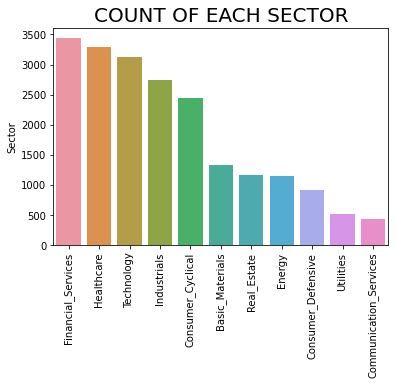

In [457]:
##Plot the sector dsitribution feature
df_sector = stock_df['Sector'].value_counts()
sns.barplot(np.arange(len(df_sector)), df_sector)
plt.xticks(np.arange(len(df_sector)), df_sector.index.values.tolist(), rotation=90)
plt.title('COUNT OF EACH SECTOR', fontsize= 20)
#plt.figure(figsize=(50,50))
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


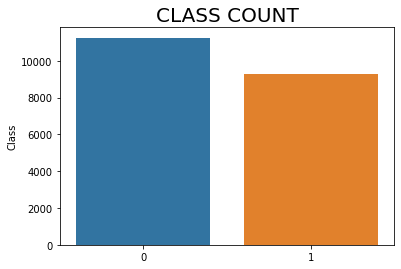

In [458]:
# Plotting distribution of class (indicating either increase or decrease in the price variance)
df_class = stock_df['Class'].value_counts()
sns.barplot(np.arange(len(df_class)), df_class)
plt.title('CLASS COUNT', fontsize=20)
plt.show()

***Finding if there is any variation in the stock during the year 2016.Checking for major peak and valleys with respect to overall sector trend.***

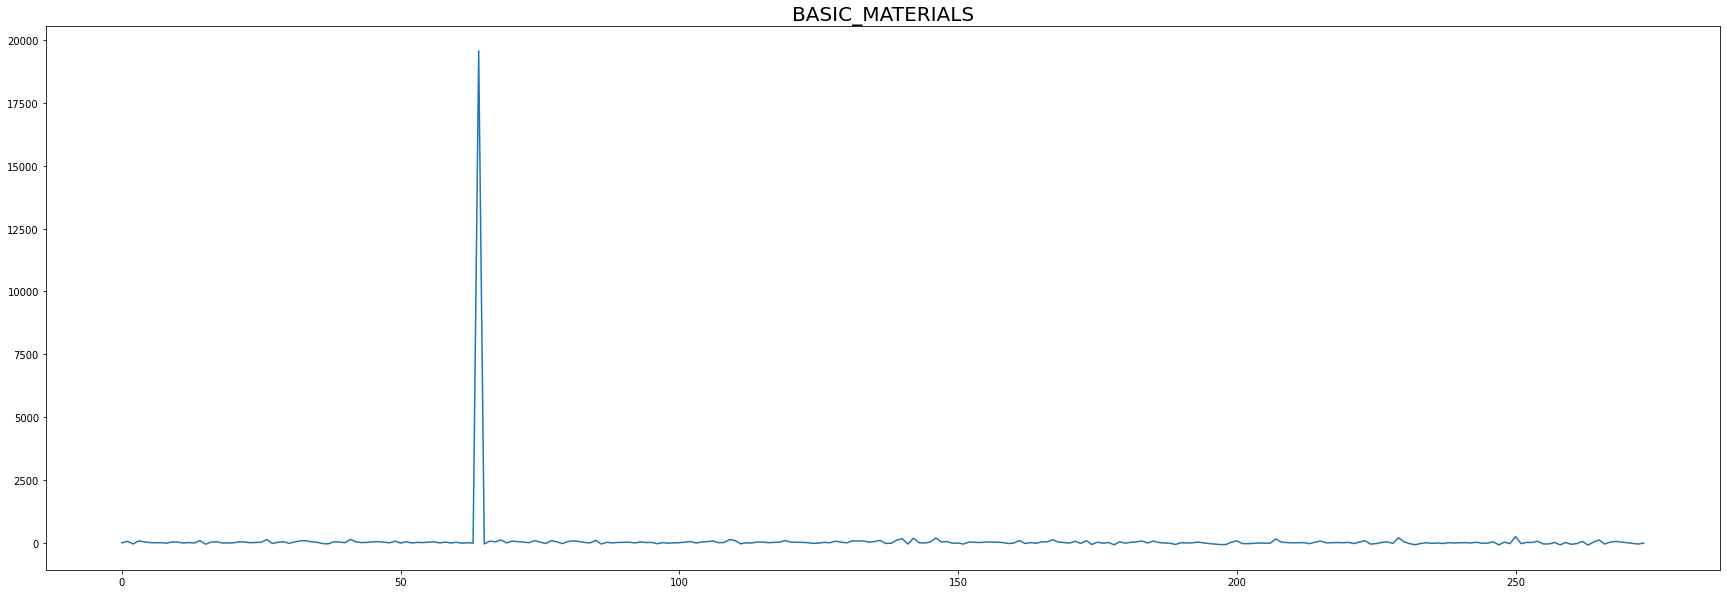

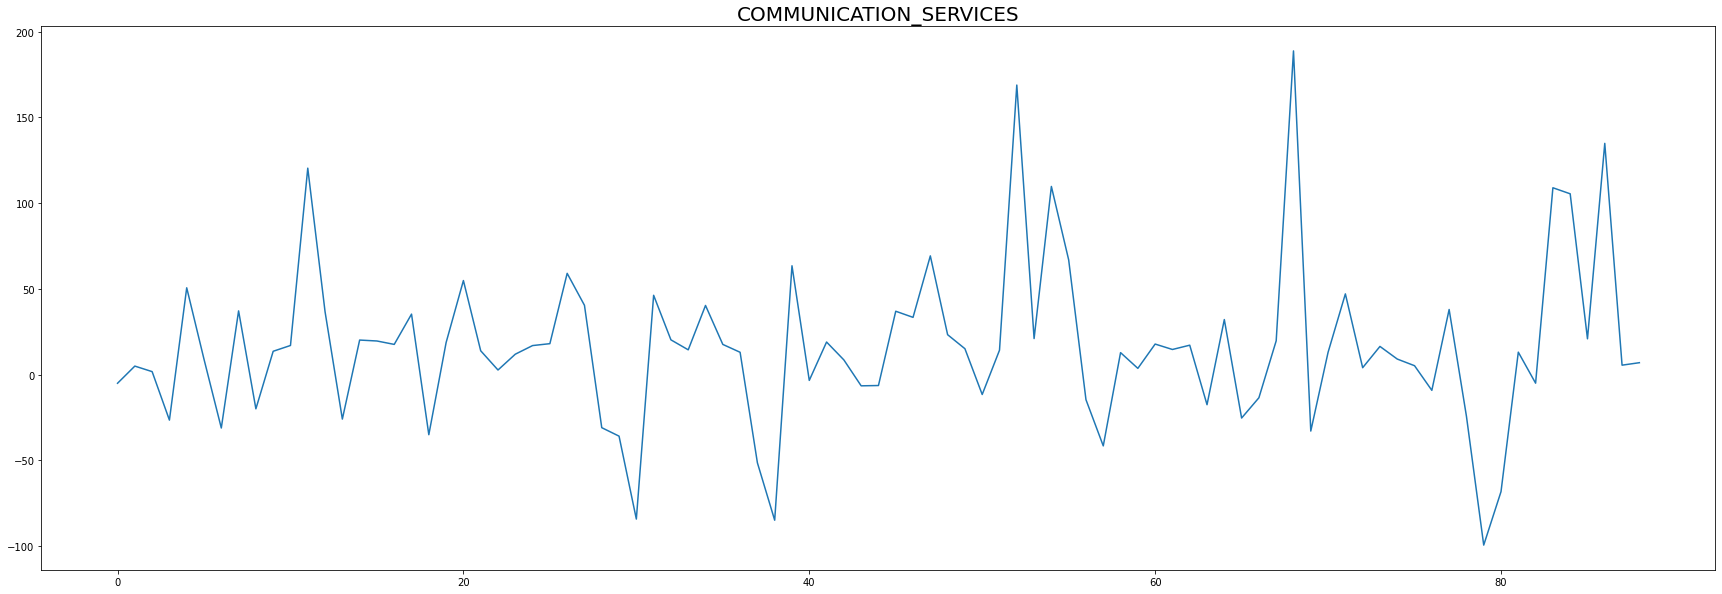

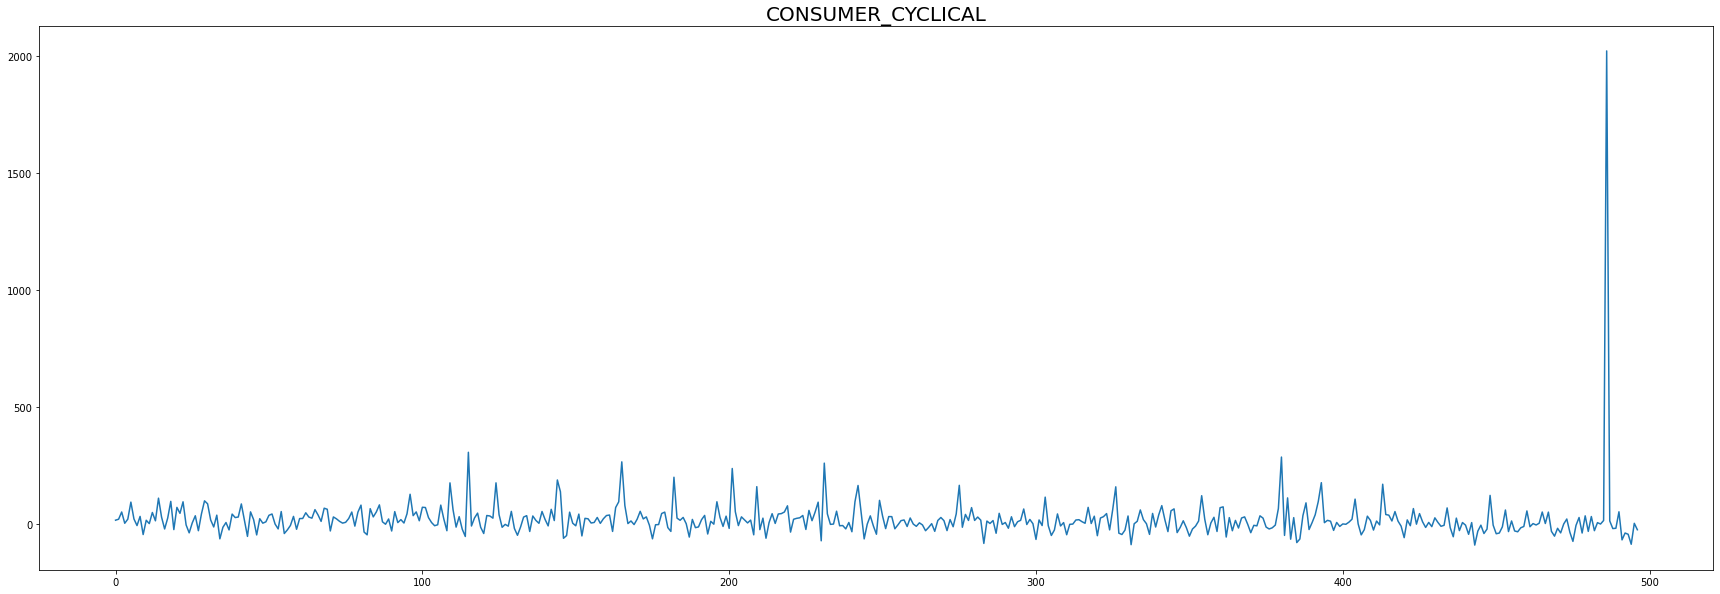

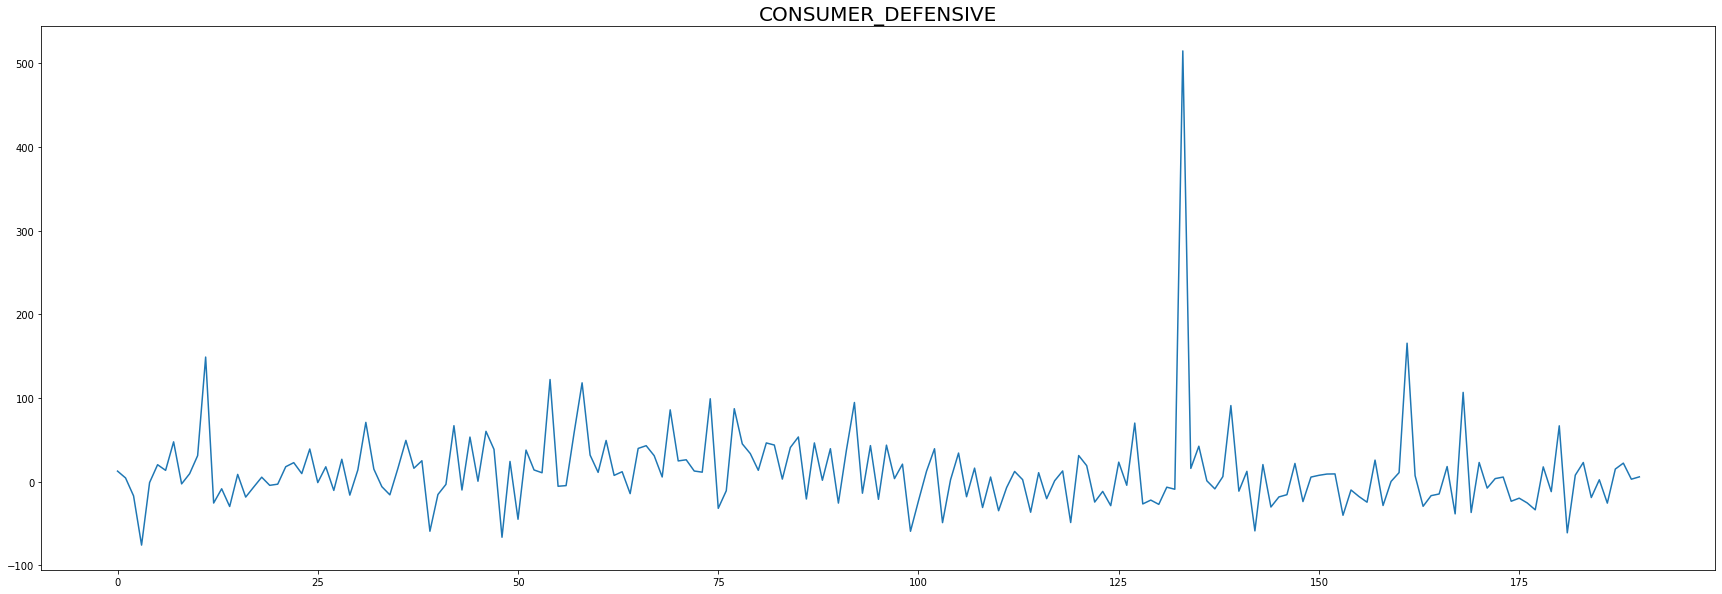

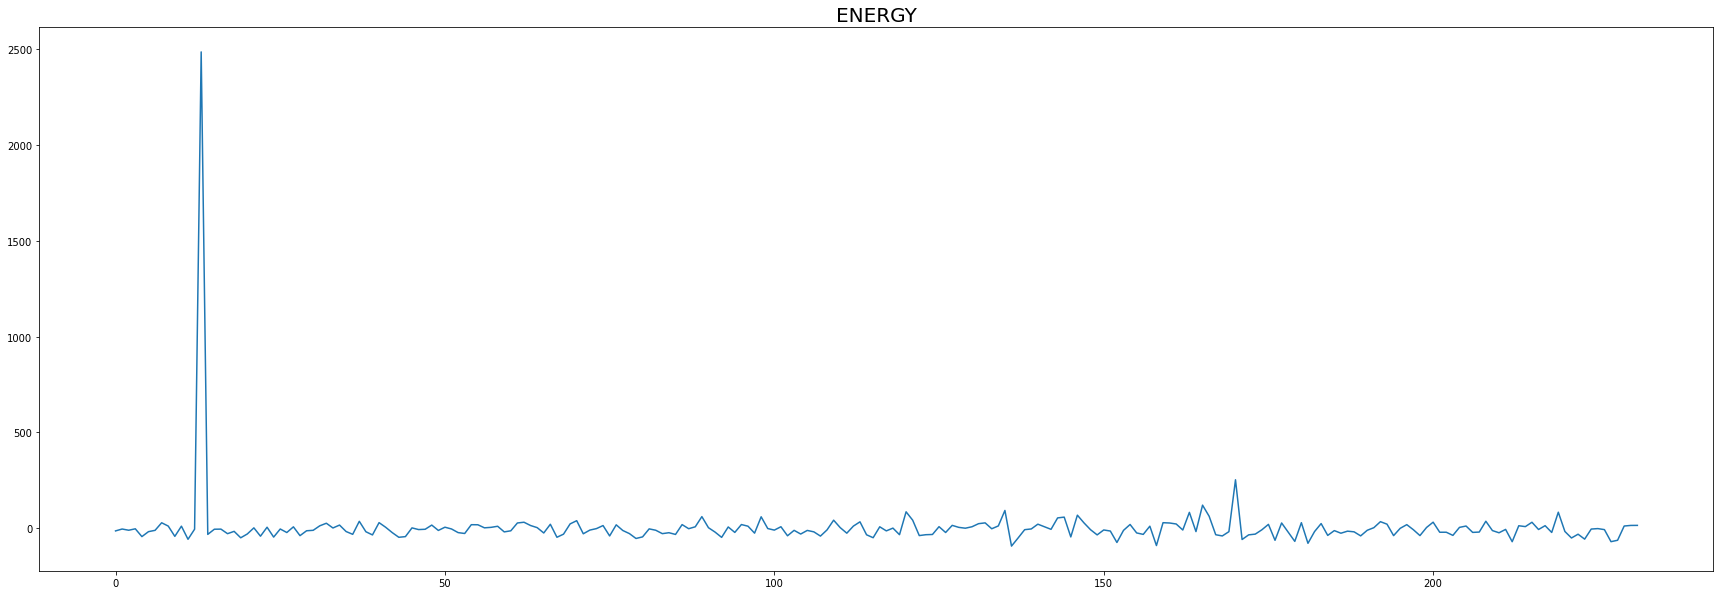

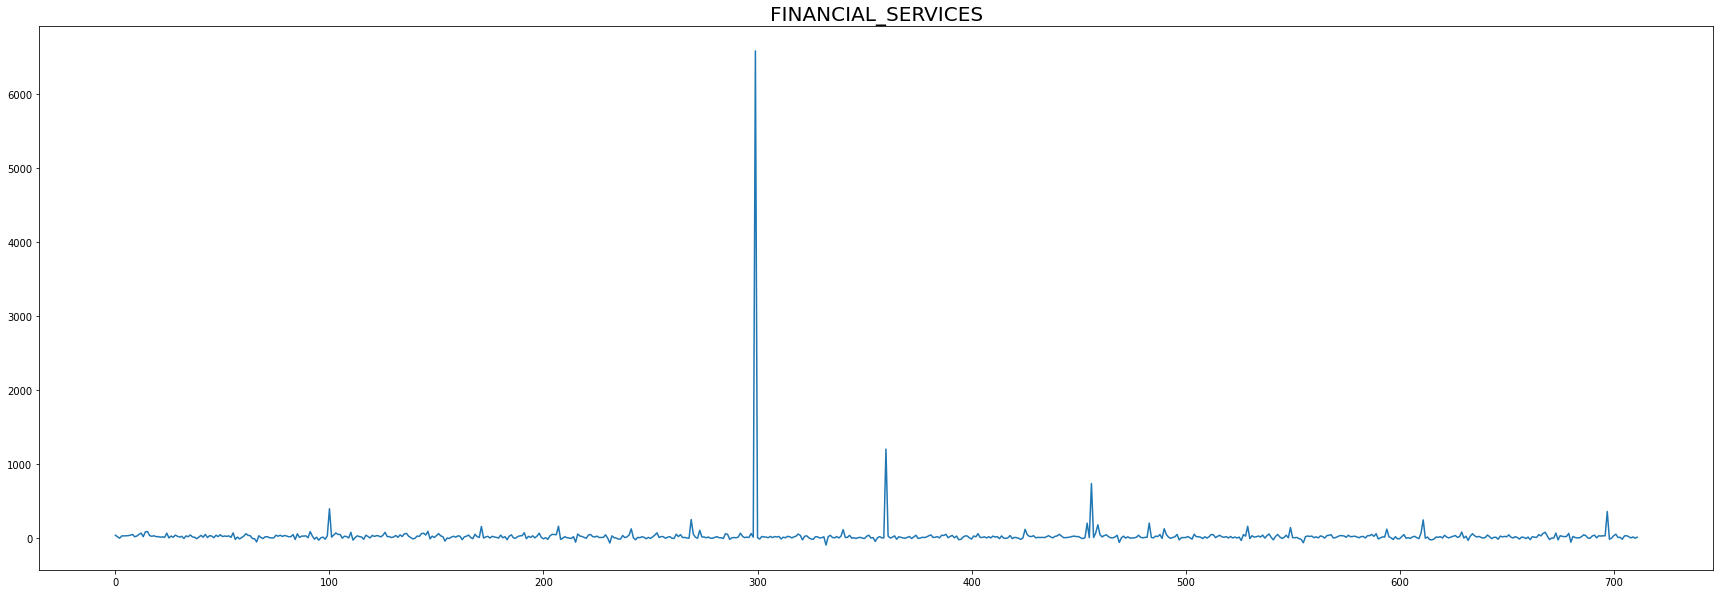

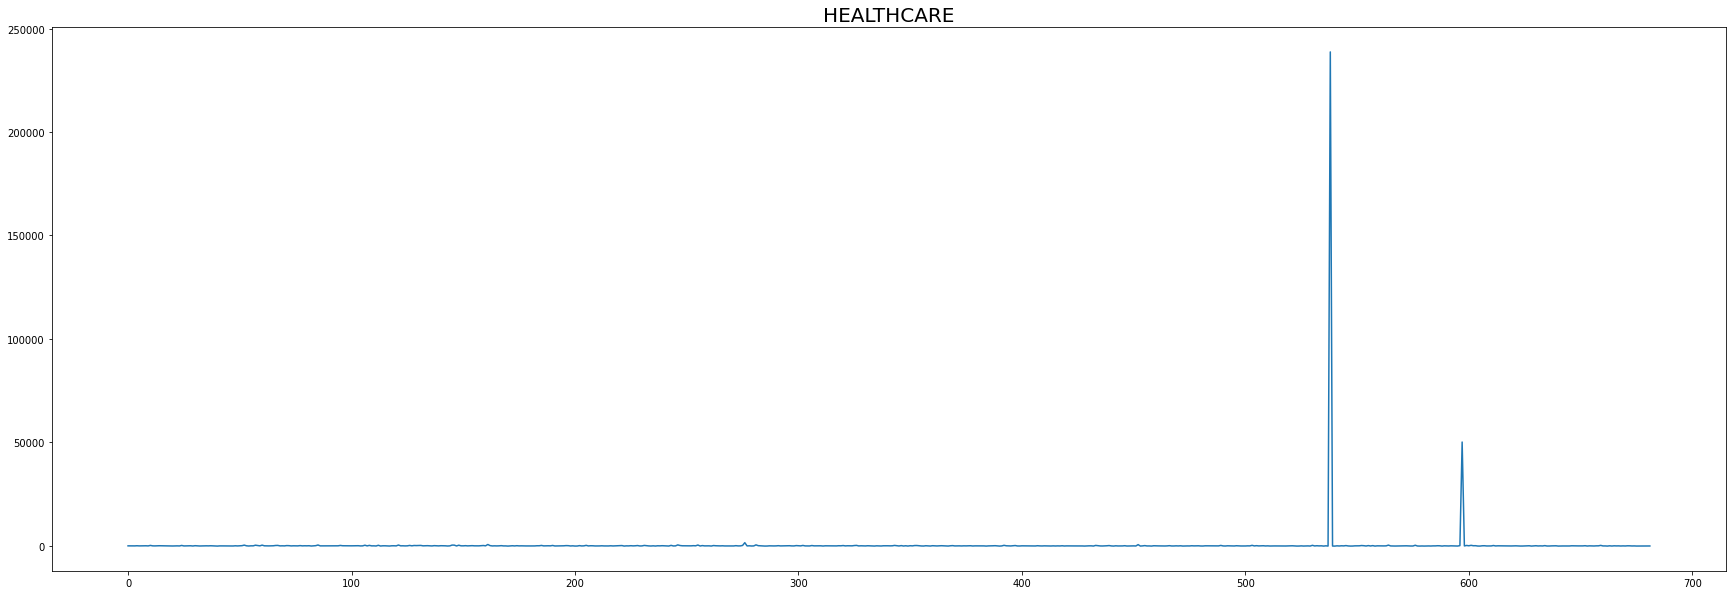

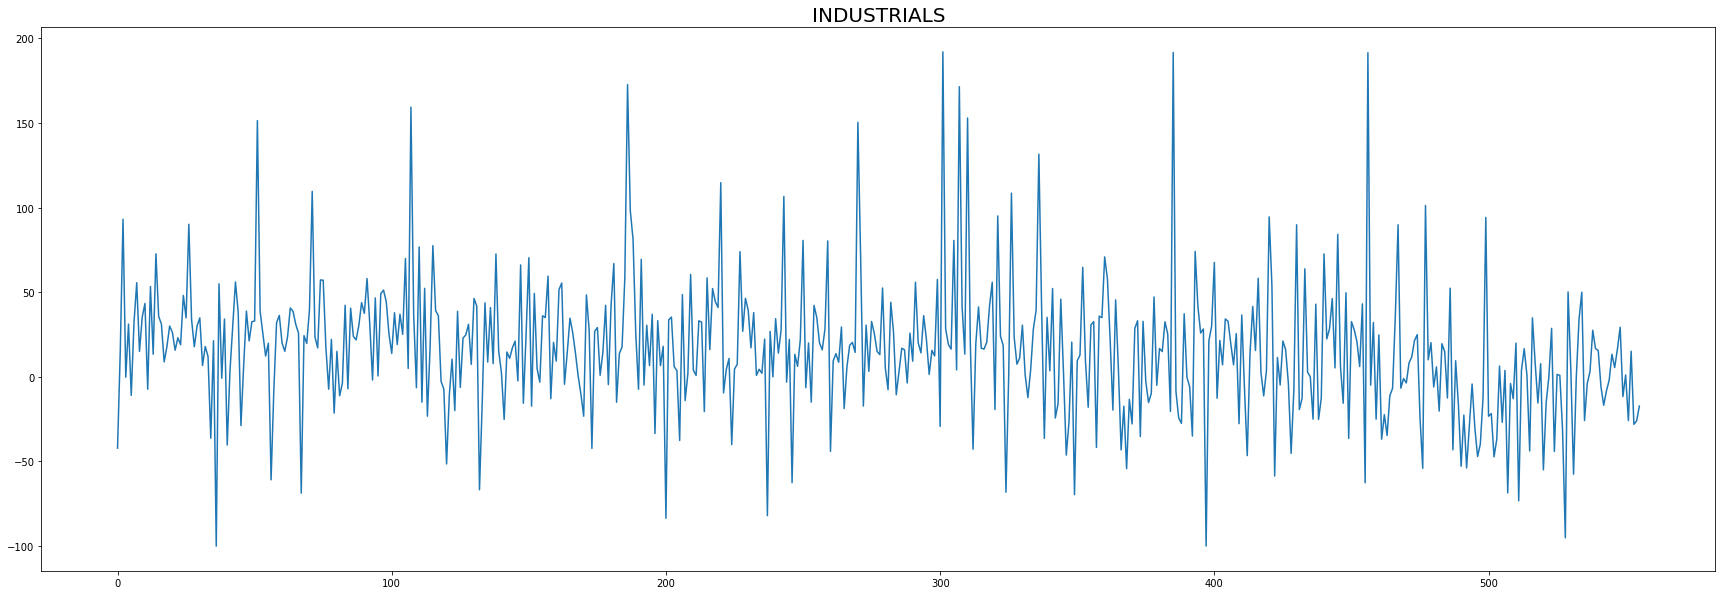

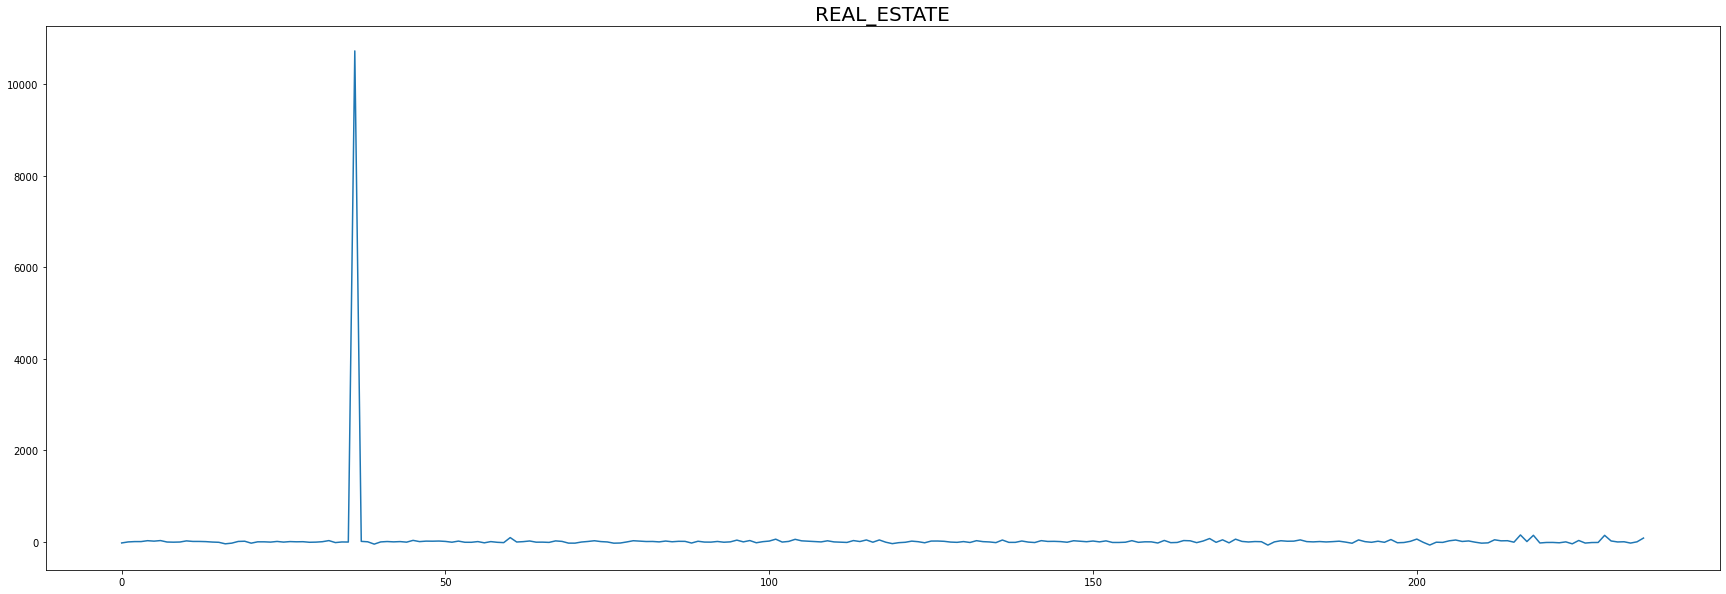

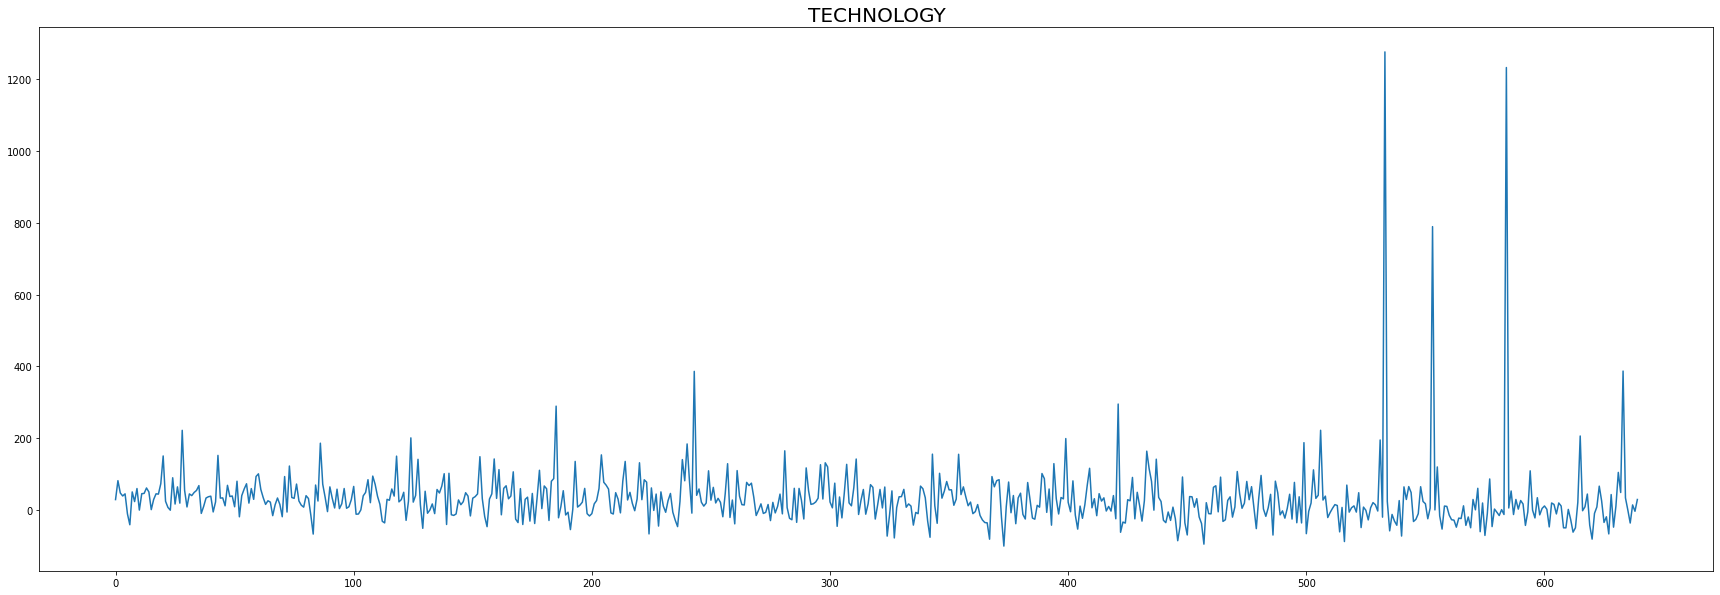

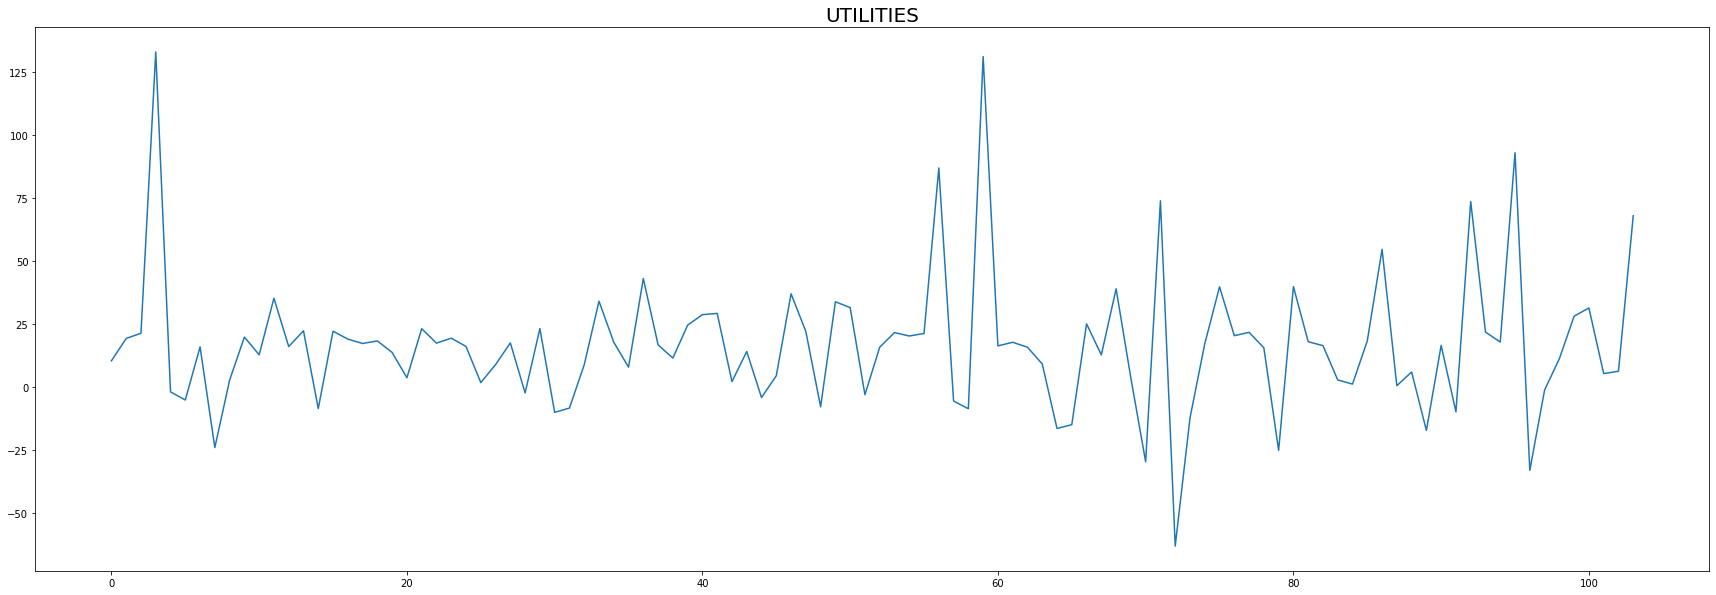

In [459]:
# Extract the columns we need in this step from the dataframe
df_to_find_trend = stock_df_3.loc[:, ['Sector', 'PRICE_VAR']]

# Get list of sectors
sector_list = df_to_find_trend['Sector'].unique()

# Plot the percent price variation for each sector
for sector in sector_list:
    
    temp = df_to_find_trend[df_to_find_trend['Sector'] == sector]

    plt.figure(figsize=(30,10))
    plt.plot(temp['PRICE_VAR'])
    plt.title(sector.upper(), fontsize=20)
    plt.show()

In [460]:
#stock_df_3